In [163]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [164]:
#create a dataframe
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head(3)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00

In [165]:
#get a look at the count for the different uniques in the dataframe
for column in df.columns:
    print(df.groupby(column)[column].agg(["count"]))

                      count
area_type                  
Built-up  Area         2418
Carpet  Area             87
Plot  Area             2025
Super built-up  Area   8790
                      count
availability               
14-Jul                    1
14-Nov                    1
15-Aug                    1
15-Dec                    1
15-Jun                    1
...                     ...
22-Mar                    3
22-May                   10
22-Nov                    2
Immediate Possession     16
Ready To Move         10581

[81 rows x 1 columns]
                      count
location                   
 Anekal                   1
 Banaswadi                1
 Basavangudi              1
 Bhoganhalli              1
 Devarabeesana Halli      6
...                     ...
t.c palya                 1
tc.palya                  4
vinayakanagar             1
white field,kadugodi      1
whitefiled                1

[1305 rows x 1 columns]
            count
size             
1 BHK         538
1 

In [166]:
#dropping unnecessary columns
df = df.drop(columns = ["area_type", "society", "balcony", "availability"], axis = 1)
df.head(3)

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00

In [167]:
#checking for null values
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [168]:
#dropping of null values
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [169]:
#modifying the size feature and dropping the initial size column

#removing of the string value in the size dataset
df["Bedrooms"] = df["size"].apply(lambda x: int(x.split(" ")[0]))
df = df.drop(columns = ["size"], axis = 1)
df.head(3)

location total_sqft  bath   price  Bedrooms
0  Electronic City Phase II       1056   2.0   39.07         2
1          Chikka Tirupathi       2600   5.0  120.00         4
2               Uttarahalli       1440   2.0   62.00         3

In [170]:
#checking for which row has no.bedroom greater than 20
df[df["Bedrooms"]>20]

location total_sqft  bath  price  Bedrooms
1718  2Electronic City Phase II       8000  27.0  230.0        27
4684                Munnekollal       2400  40.0  660.0        43

In [171]:
#creating a function to check if the value is a number or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

#applying the function and applying a negation to return the non-numerical values
df[~df["total_sqft"].apply(is_float)].head(3)

location   total_sqft  bath    price  Bedrooms
30            Yelahanka  2100 - 2850   4.0  186.000         4
122              Hebbal  3067 - 8156   4.0  477.000         4
137  8th Phase JP Nagar  1042 - 1105   2.0   54.005         2

In [172]:
#creating a function to counter the range issue
def convert_sqft_to_num(x):
    #splits the value of x into 2 depending on the placement of "-"
    tokens = x.split("-")
    #if there are two token elements means there is a range
    if len(tokens) == 2:
        #return the average of the two(midpoint)
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        #type casting of number strings
        return float(x)
    except:
        #if type casting fails return no value
        return None

#testing the function
convert_sqft_to_num("2188"), convert_sqft_to_num("2100 - 3449"), convert_sqft_to_num("34qm")        

(2188.0, 2774.5, None)

In [173]:
#applying the function to the column
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df.head(3)

location  total_sqft  bath   price  Bedrooms
0  Electronic City Phase II      1056.0   2.0   39.07         2
1          Chikka Tirupathi      2600.0   5.0  120.00         4
2               Uttarahalli      1440.0   2.0   62.00         3

In [174]:
#seeing if it worked
df["total_sqft"][30]

2475.0

In [175]:
#creating a copy of the dataframe and a new column of price per square feet
df2 = df.copy()
df2["price_per_sqft"] = df2["price"] * 100000/ df["total_sqft"]
df2.head(3)

location  total_sqft  bath   price  Bedrooms  \
0  Electronic City Phase II      1056.0   2.0   39.07         2   
1          Chikka Tirupathi      2600.0   5.0  120.00         4   
2               Uttarahalli      1440.0   2.0   62.00         3   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556

In [176]:
#seeing the number of unique values
len(df2.location.unique())

1304

In [177]:
#seeing the count of each location to determine a threshhold
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [178]:
#from the location_stats sub-dataframe creating a new sub-dataframe for location less than ten
location_less_than_ten = location_stats[location_stats<=10]
len(location_less_than_ten)

1052

In [179]:
#recalibrating the location feature values using the threshhold
df2.location = df2.location.apply(lambda x: "other" if x in location_less_than_ten else x)
len(df2.location.unique())

242

In [180]:
df3 = df2.copy()
df3.shape

(13246, 6)

In [181]:
df3 = df3[~(df3["total_sqft"]/df3["Bedrooms"]<300)]
df3.shape

(12502, 6)

In [182]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [183]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m - st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out    

df3 = remove_price_per_sqft_outliers(df3)
df3.shape

(10241, 6)

In [184]:
df3.head(3)

location  total_sqft  bath  price  Bedrooms  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0         4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0         3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0         3    12533.333333

C:\Users\nyasa\AppData\Local\Temp\ipykernel_10664\4221890151.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (12, 6))


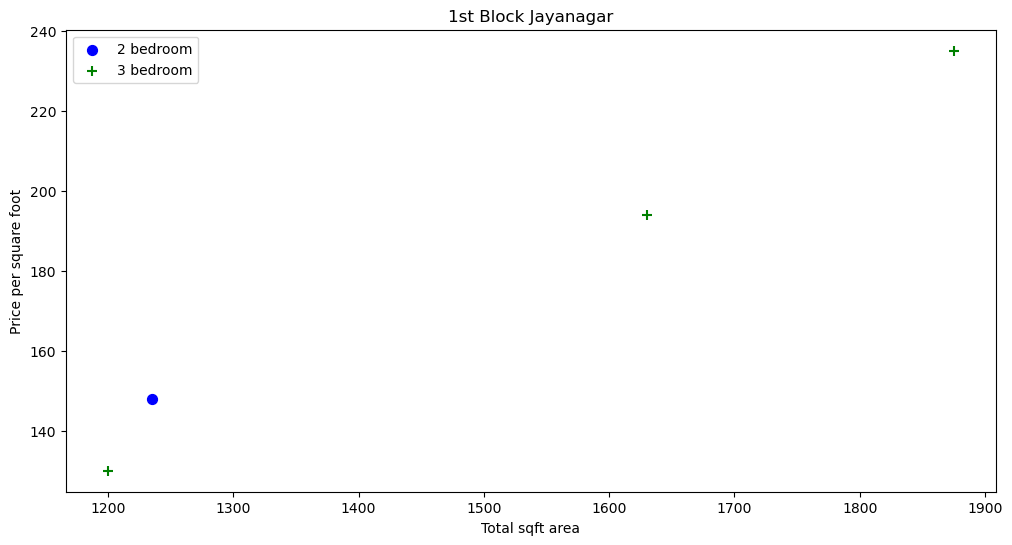

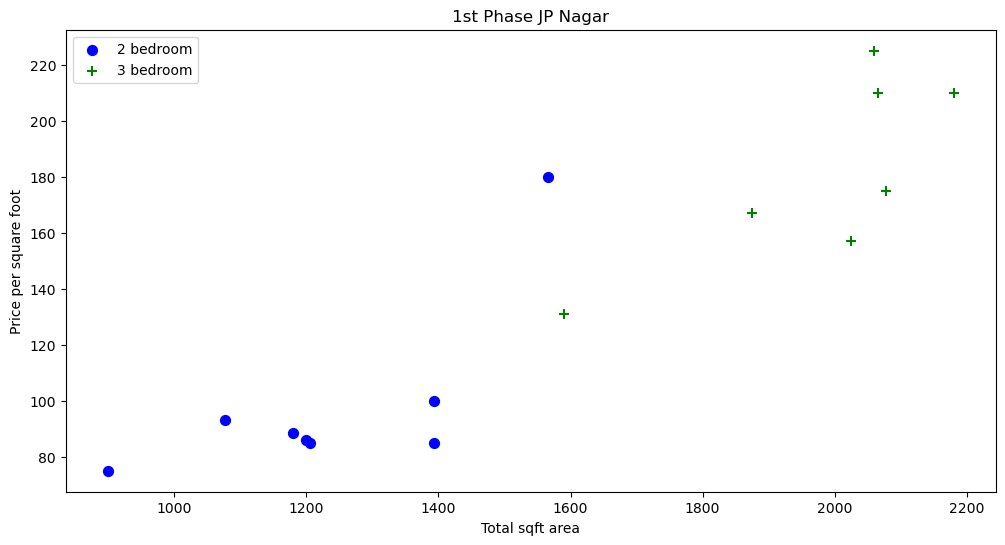

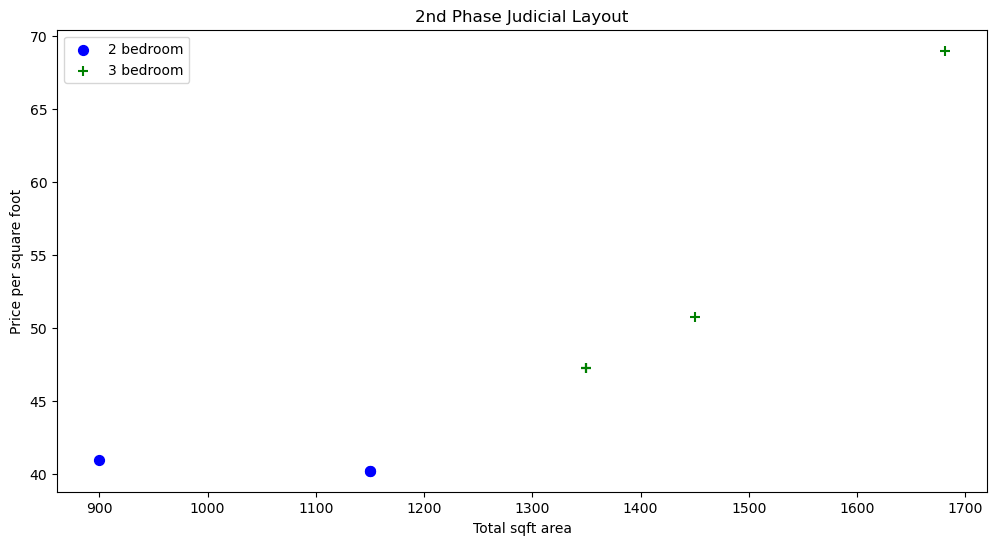

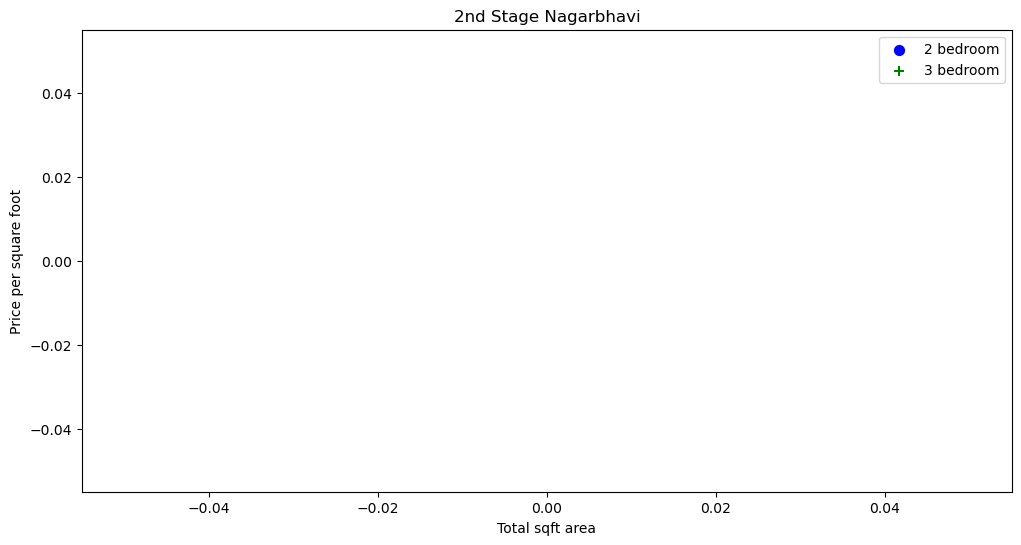

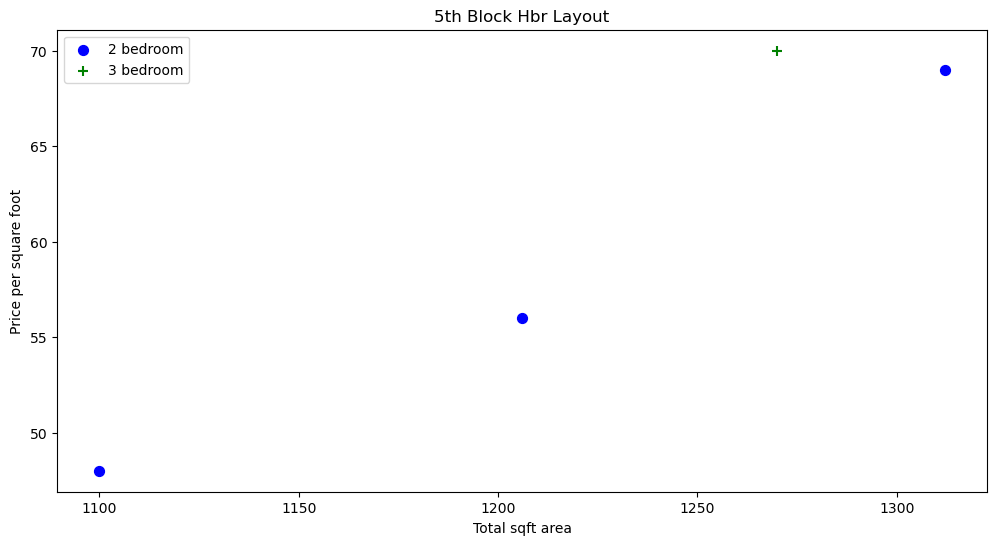

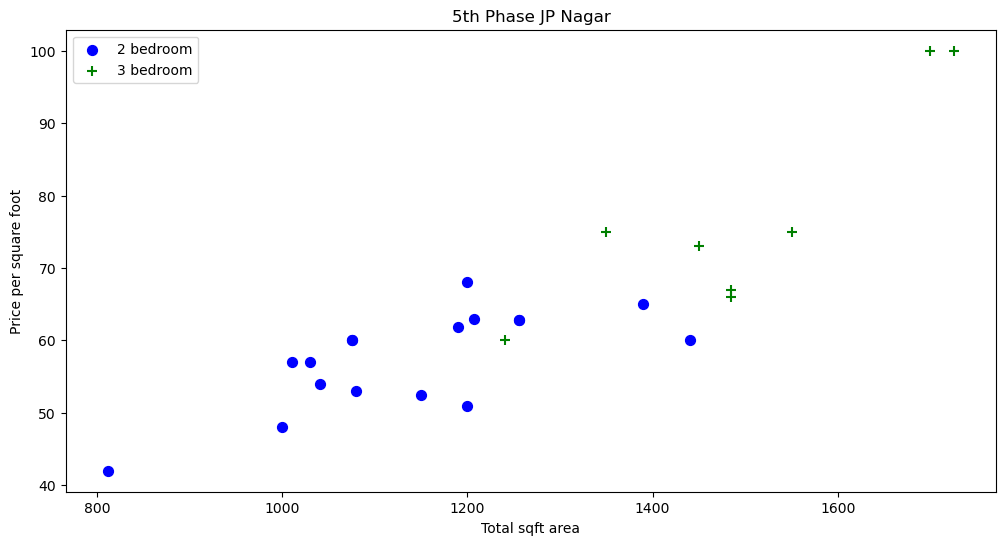

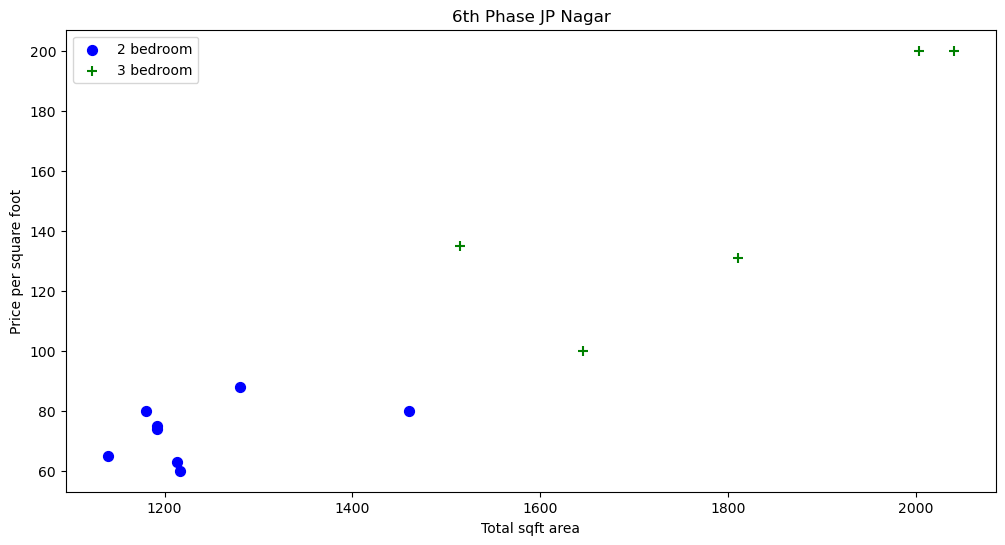

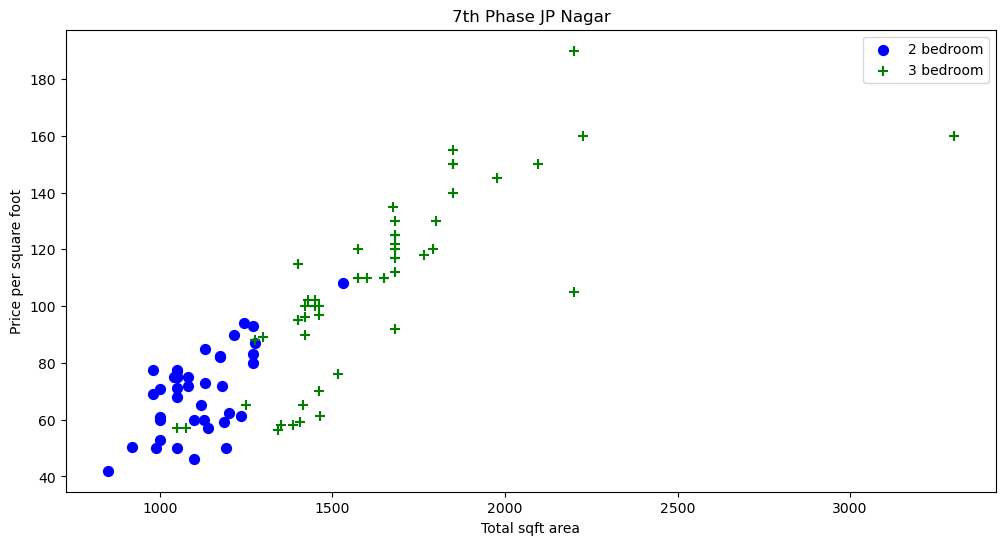

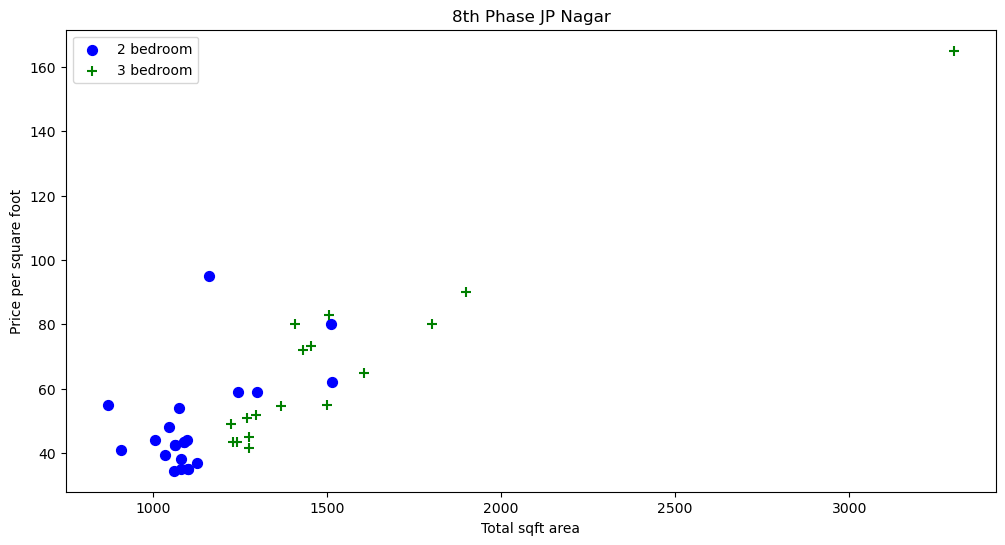

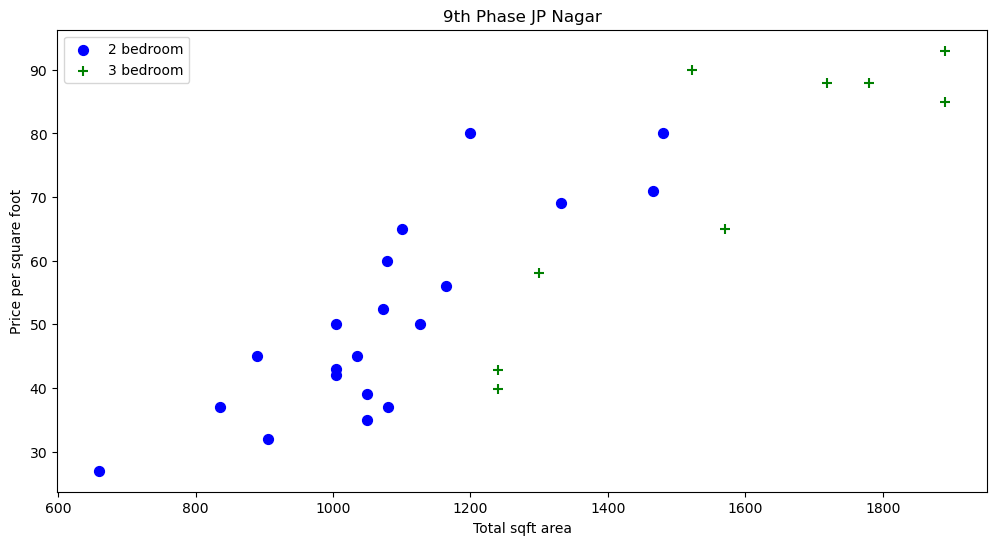

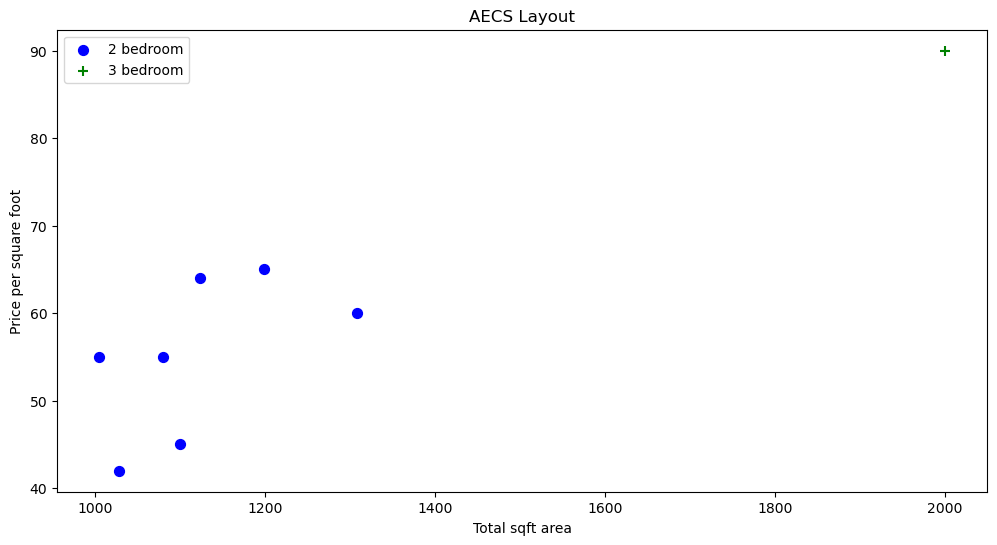

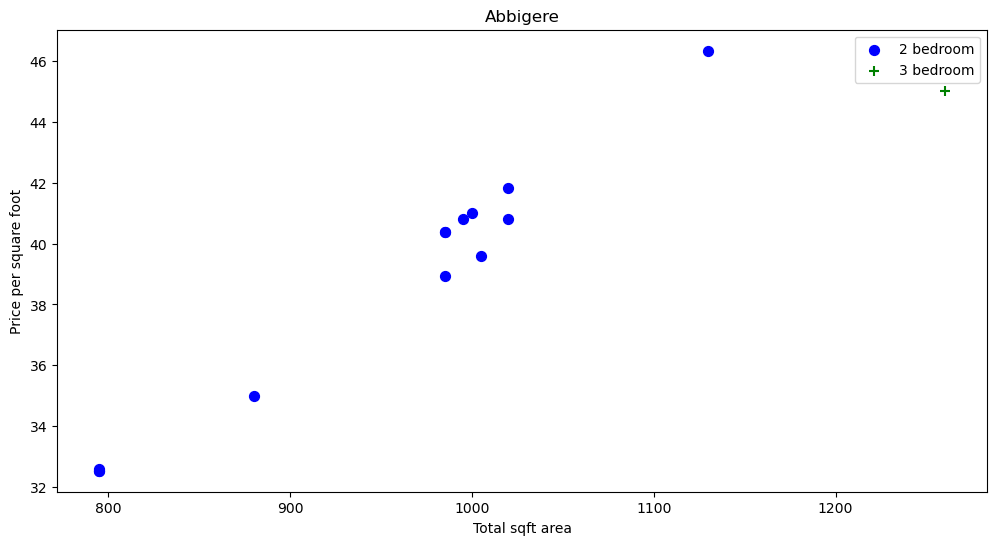

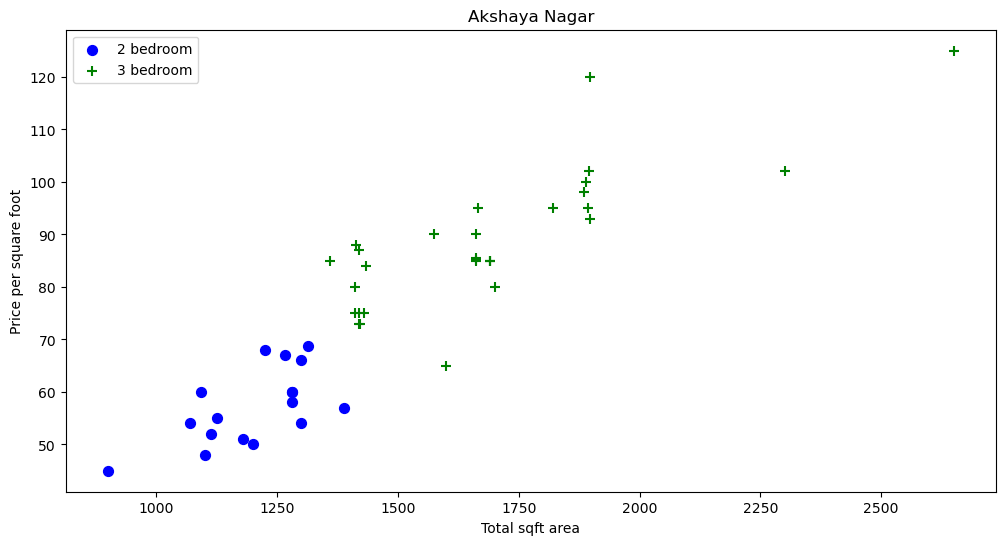

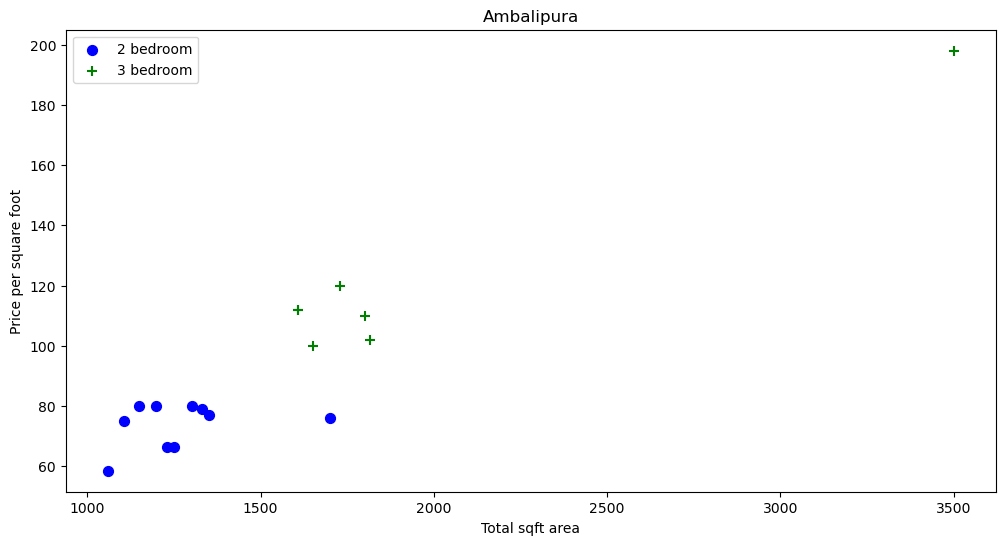

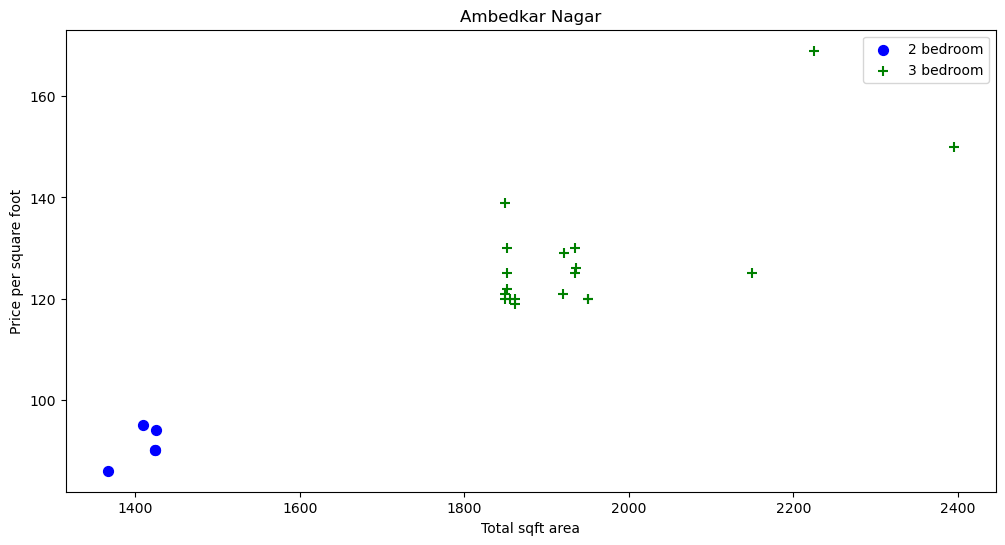

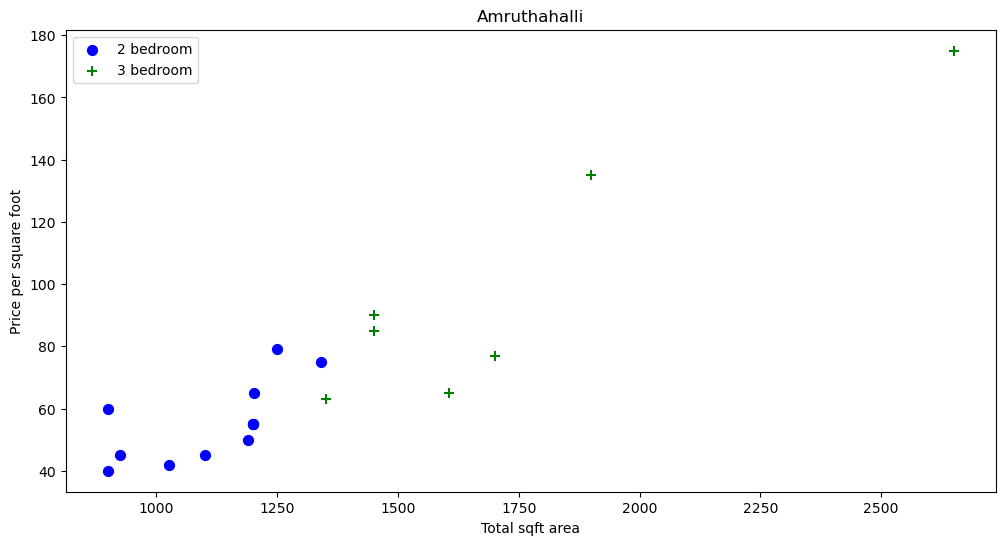

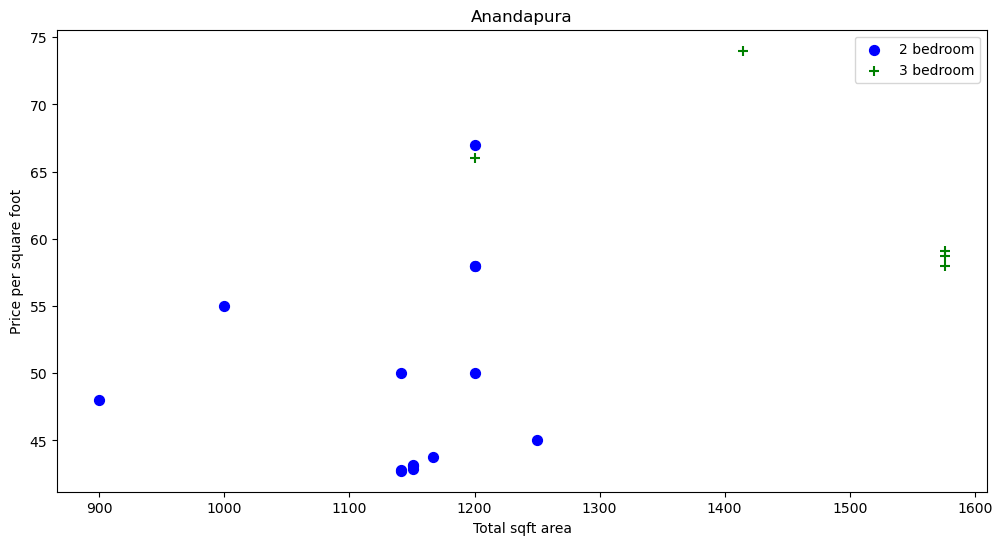

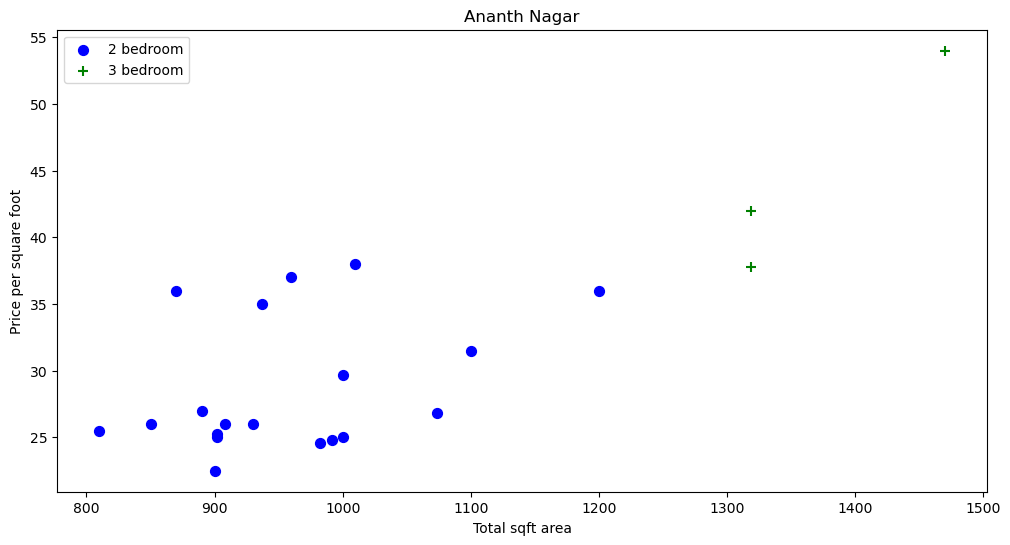

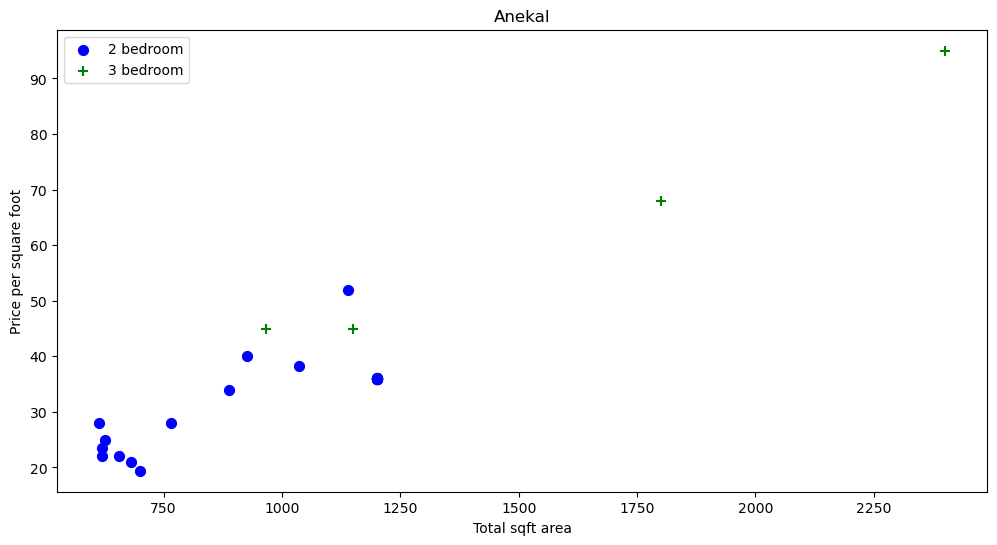

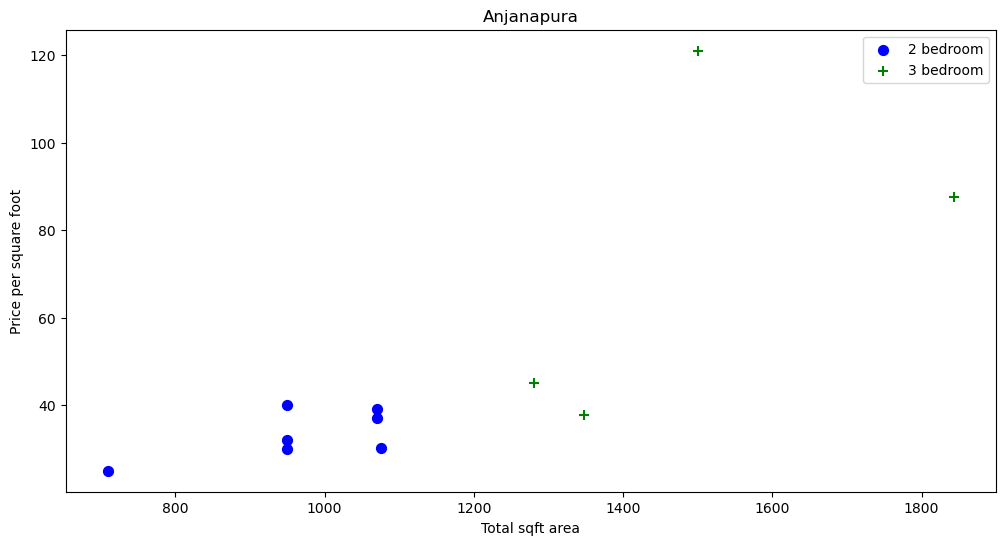

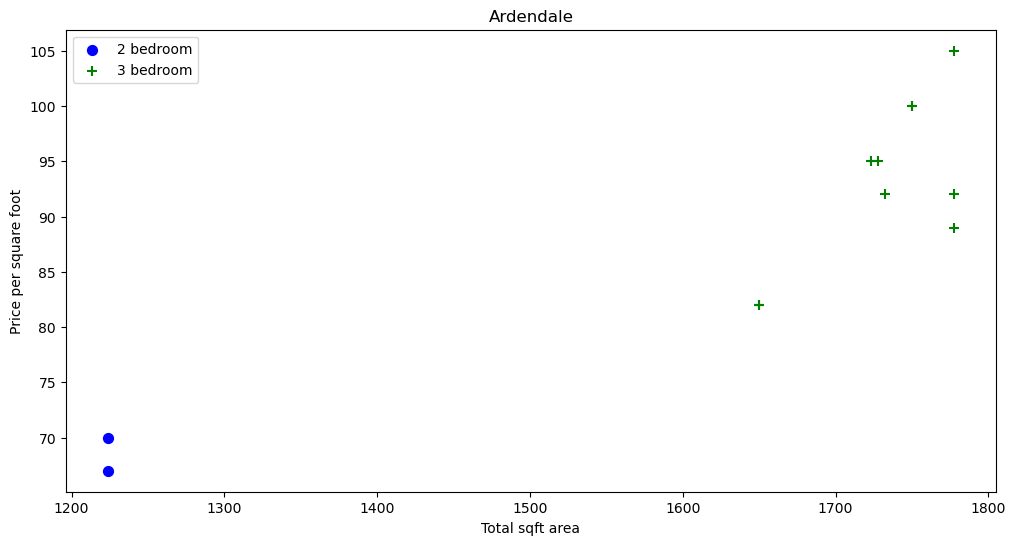

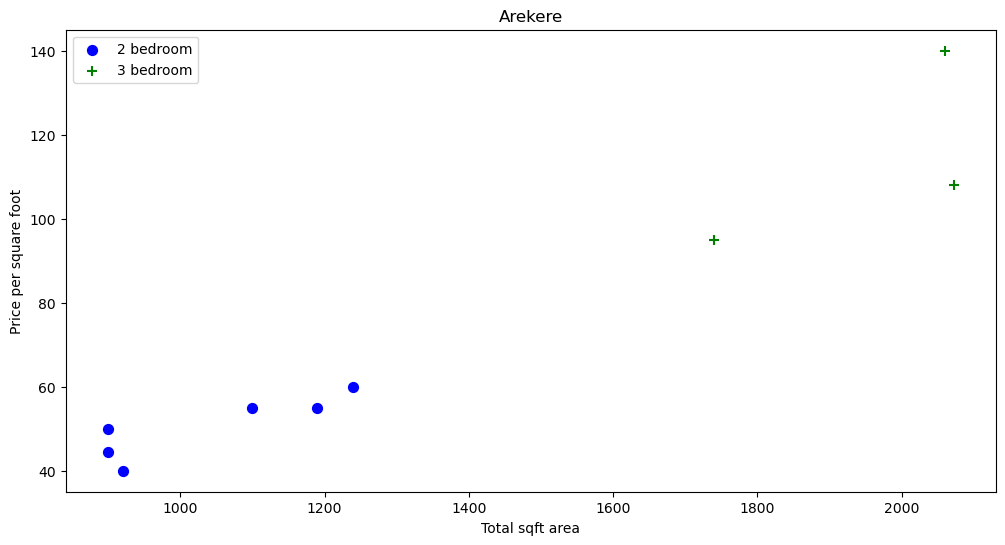

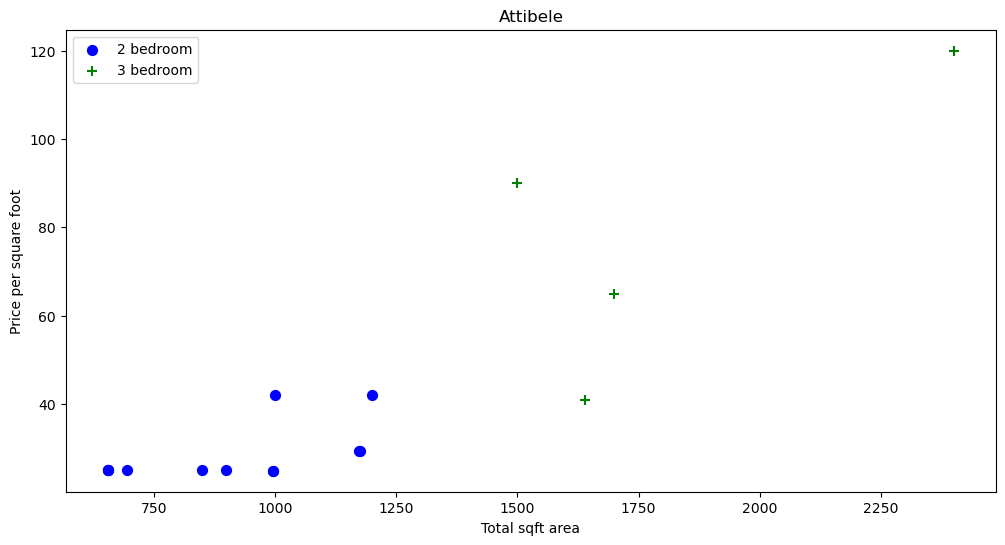

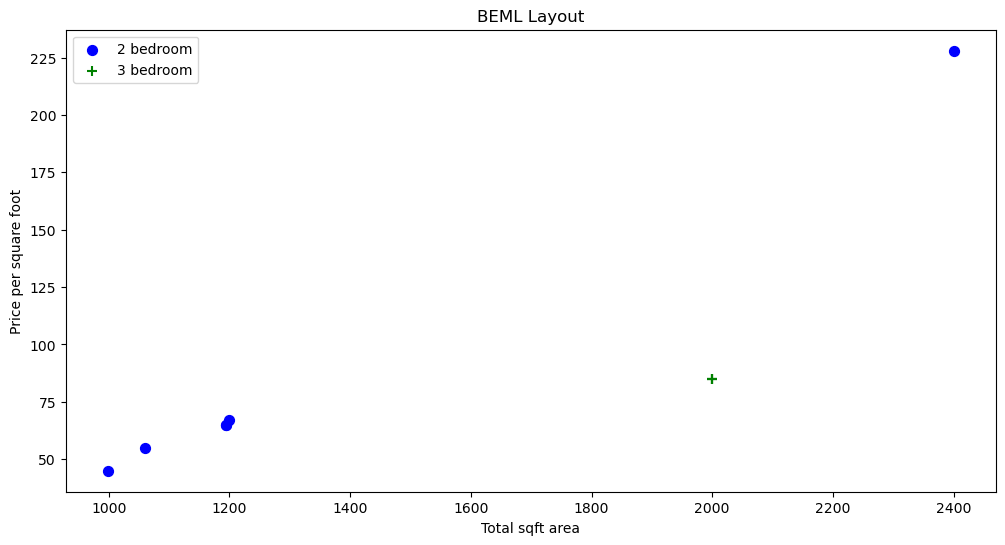

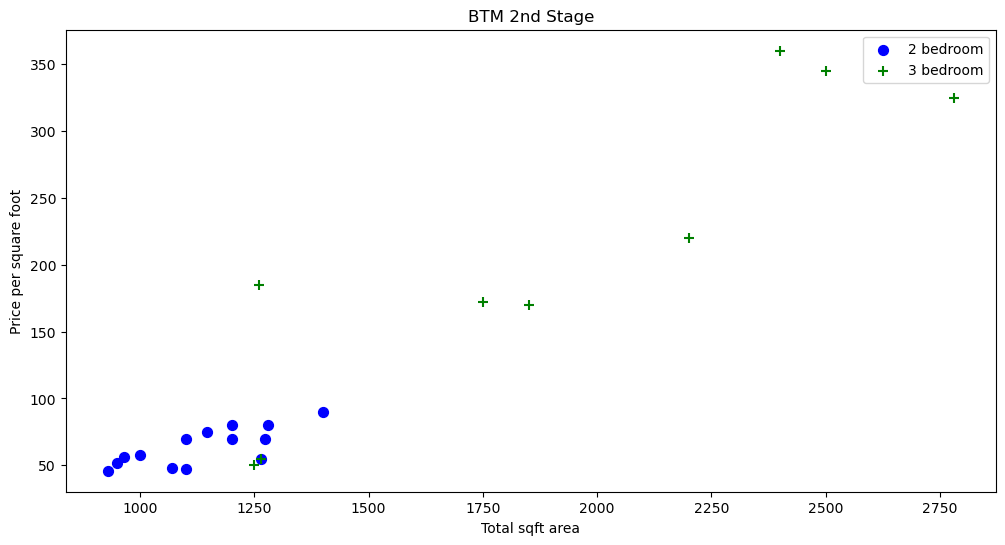

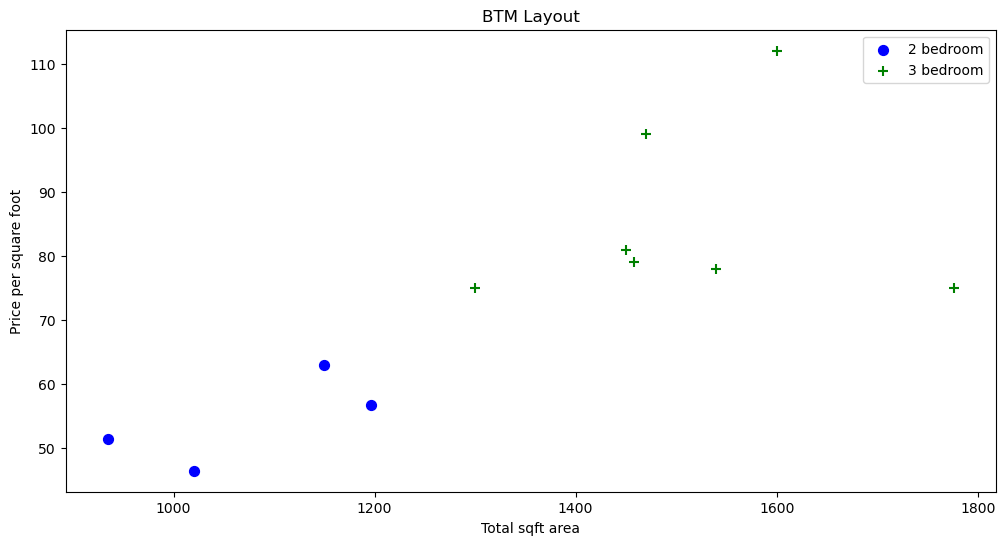

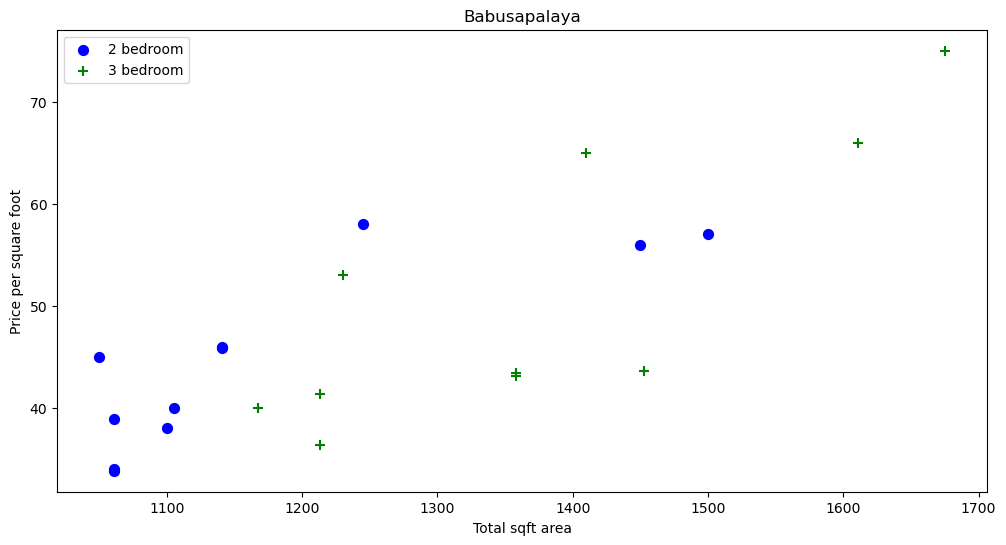

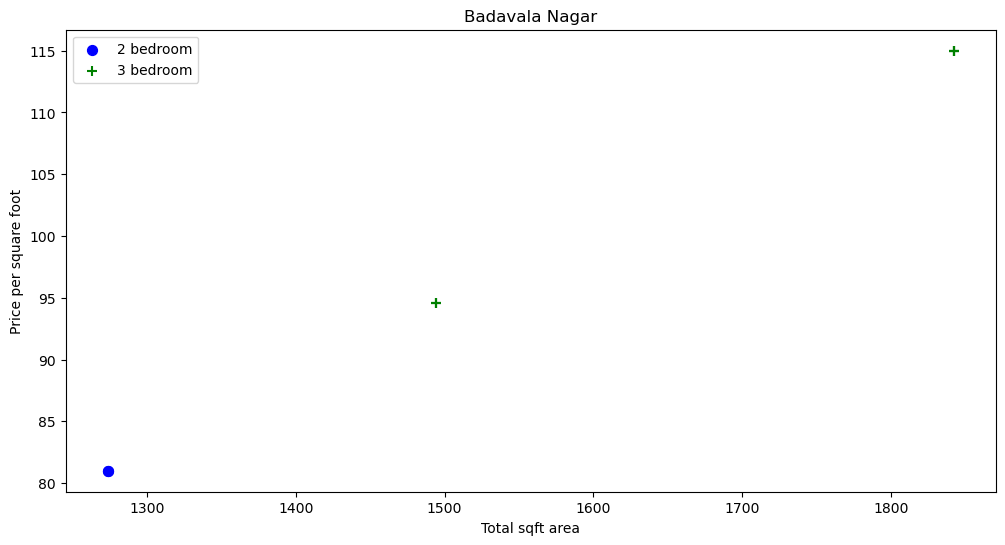

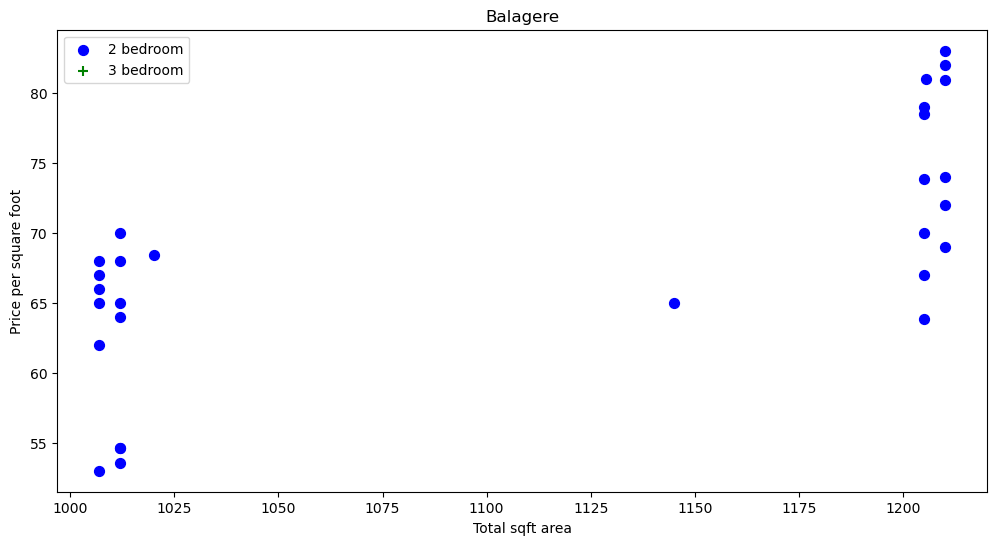

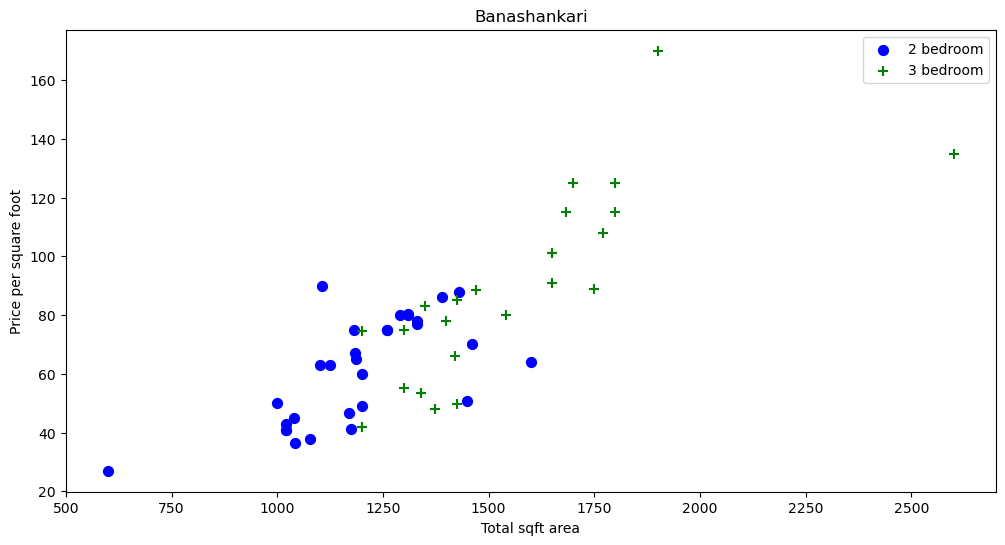

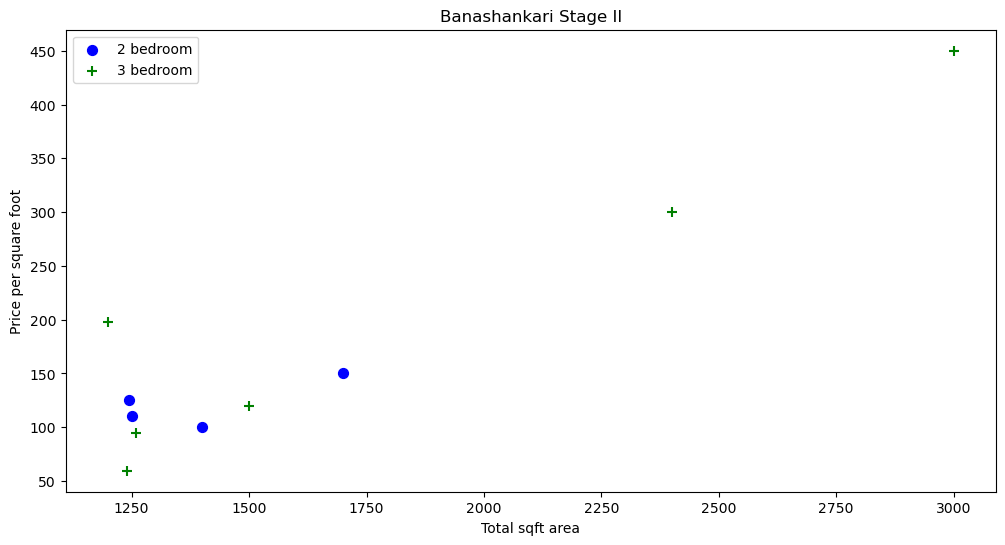

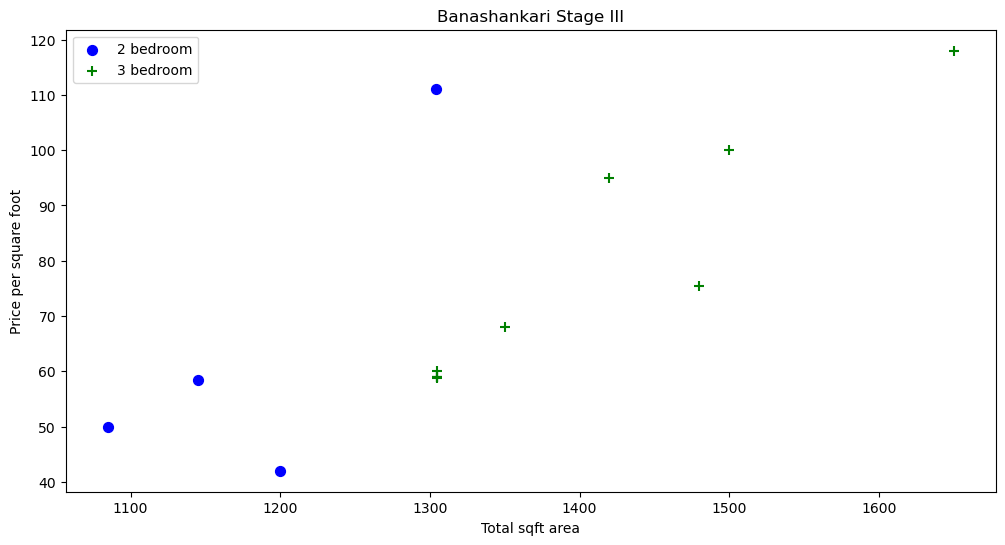

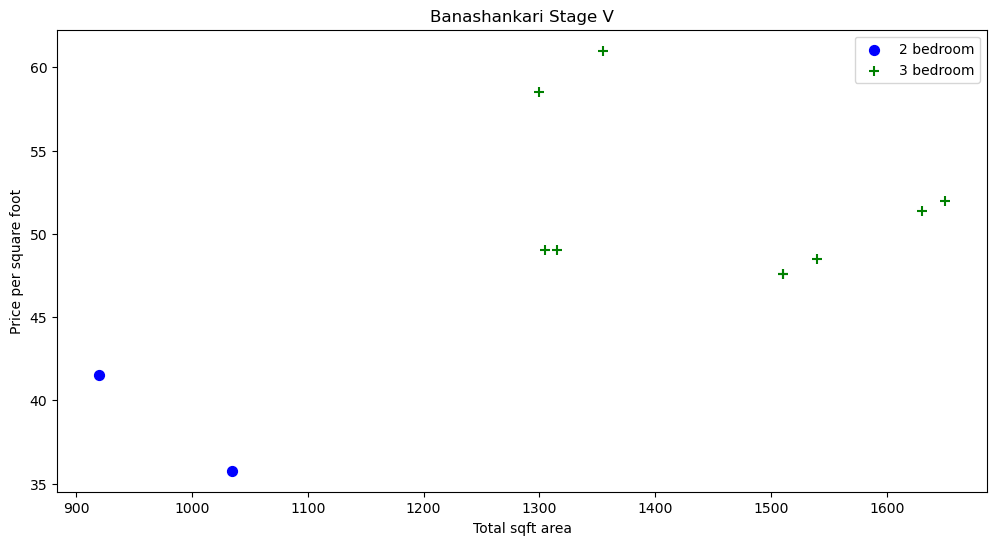

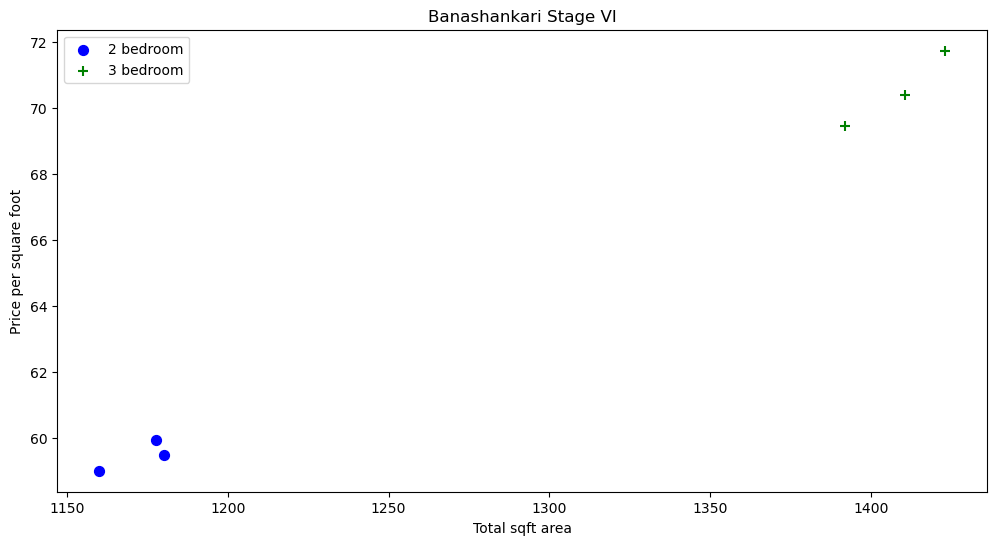

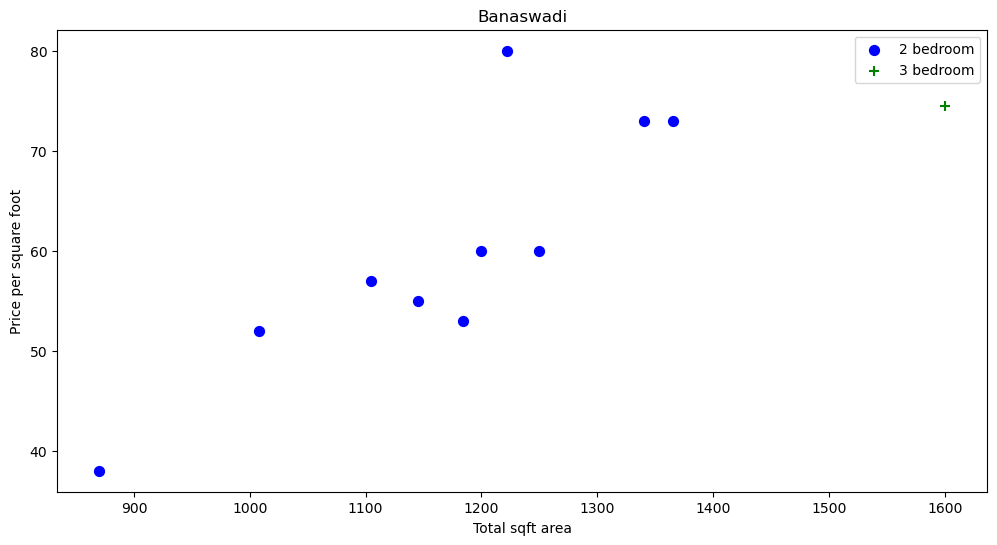

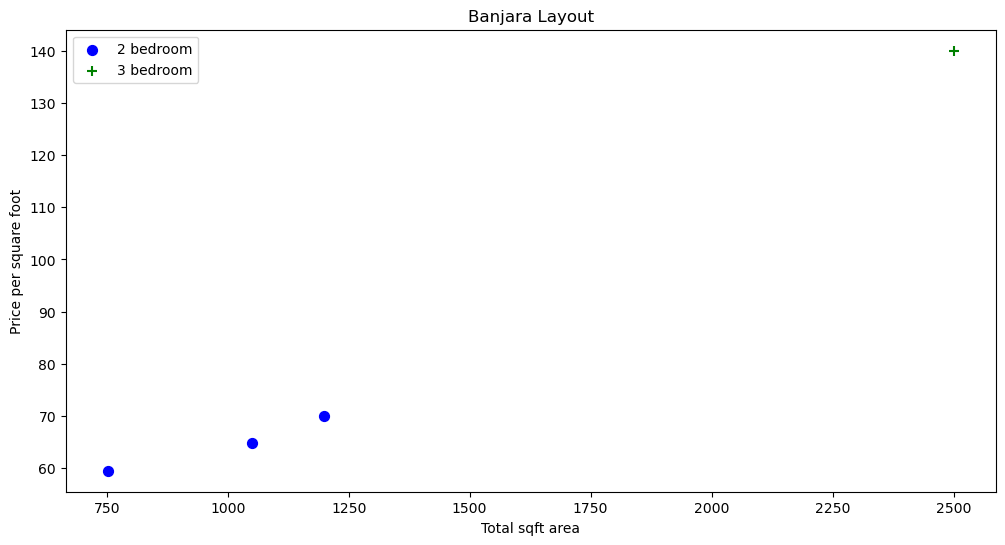

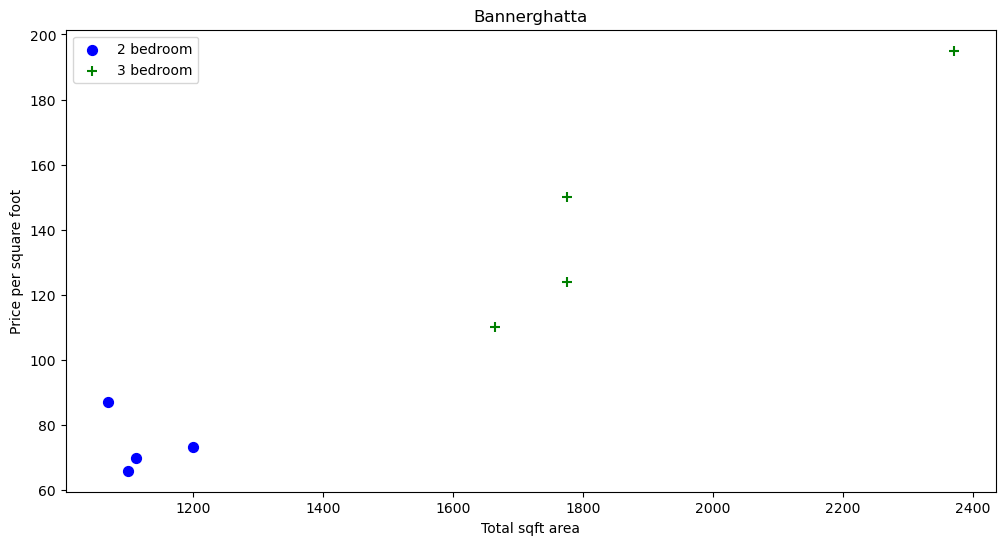

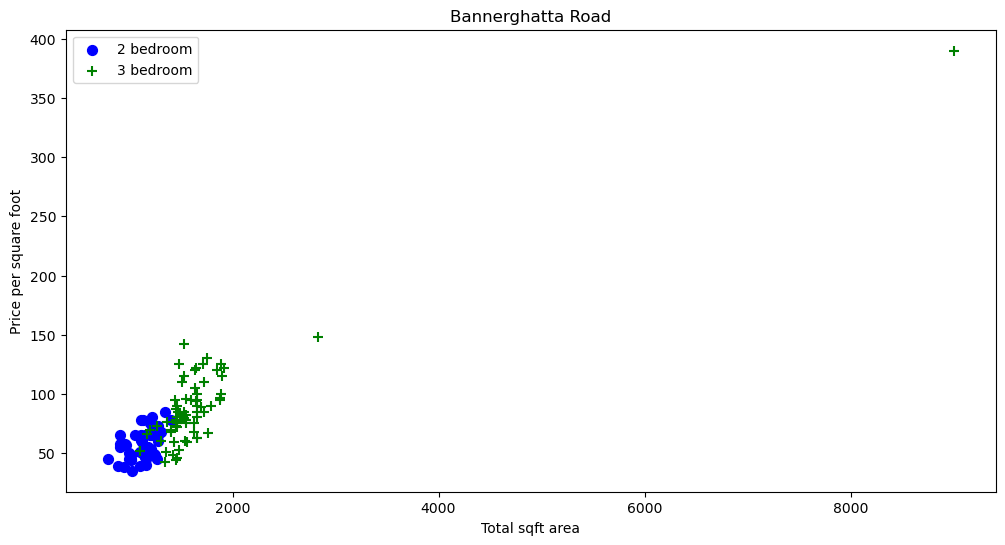

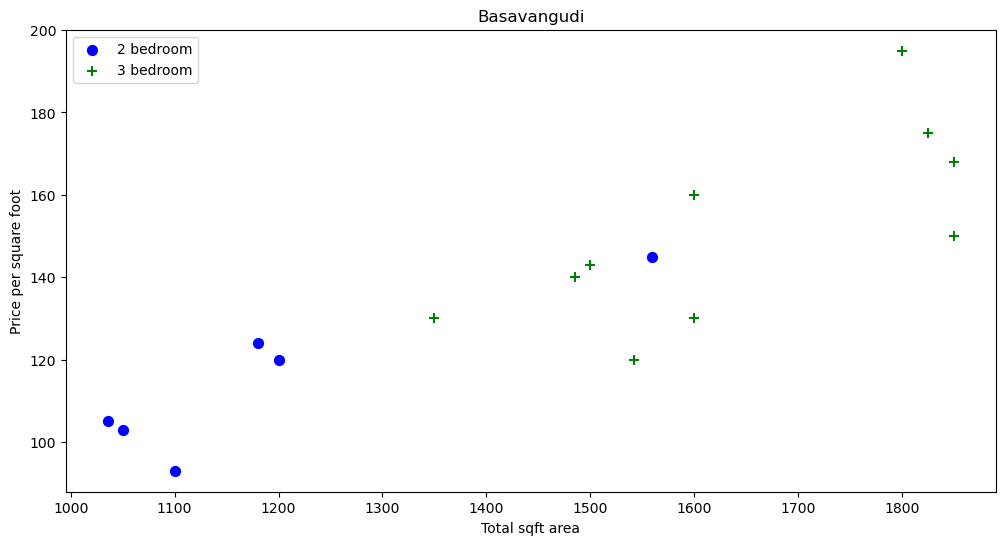

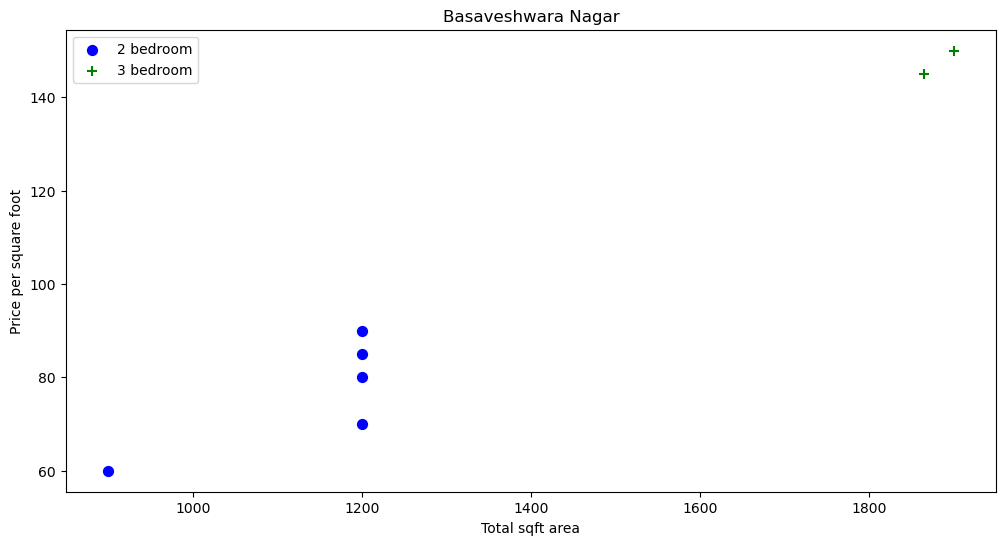

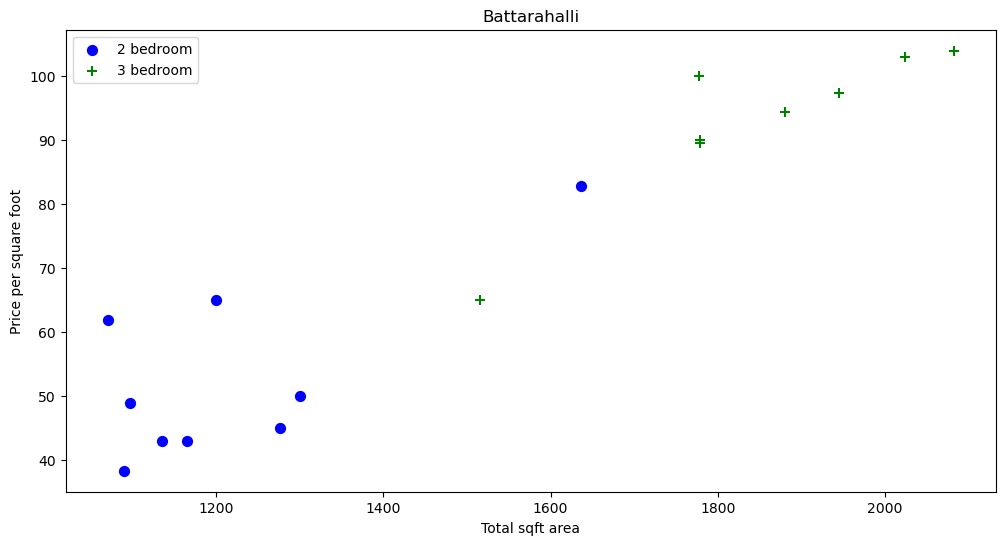

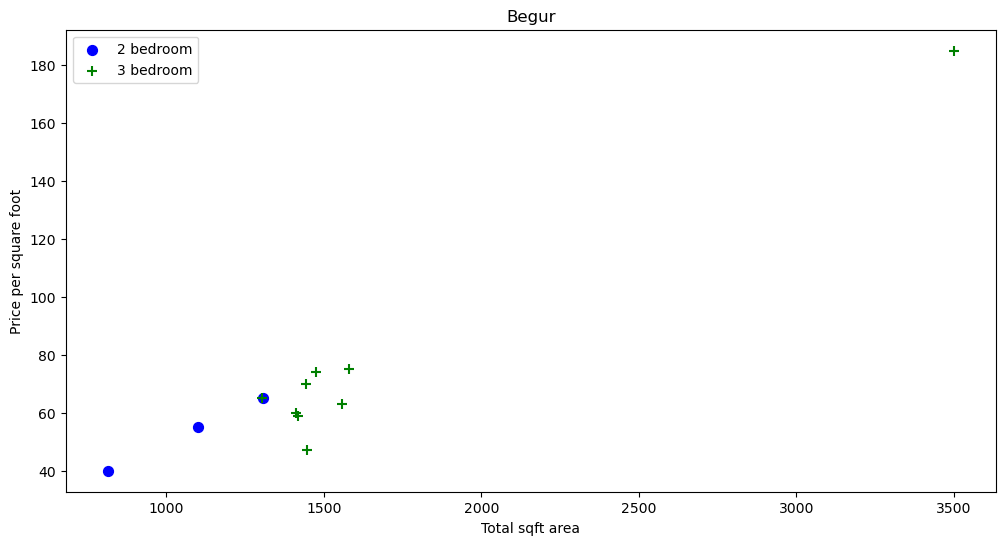

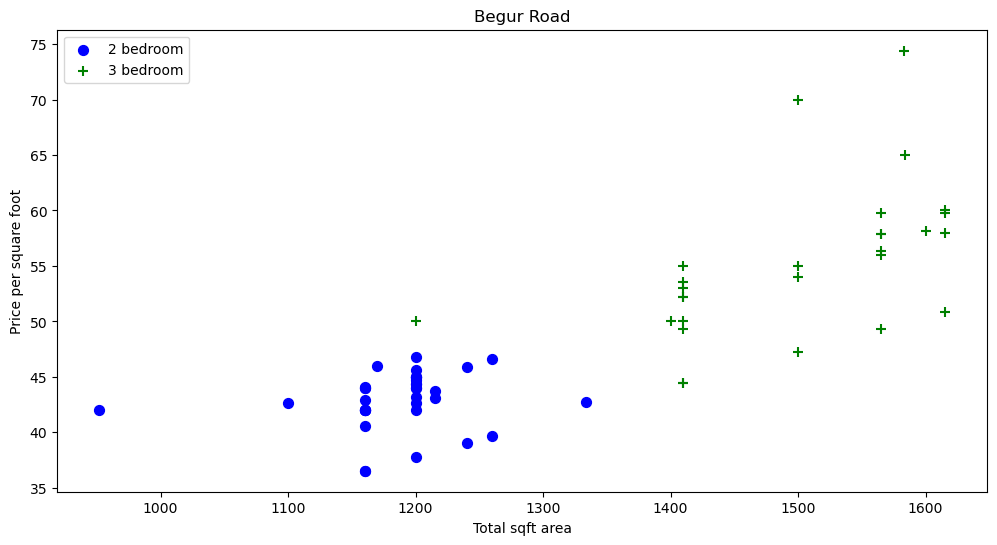

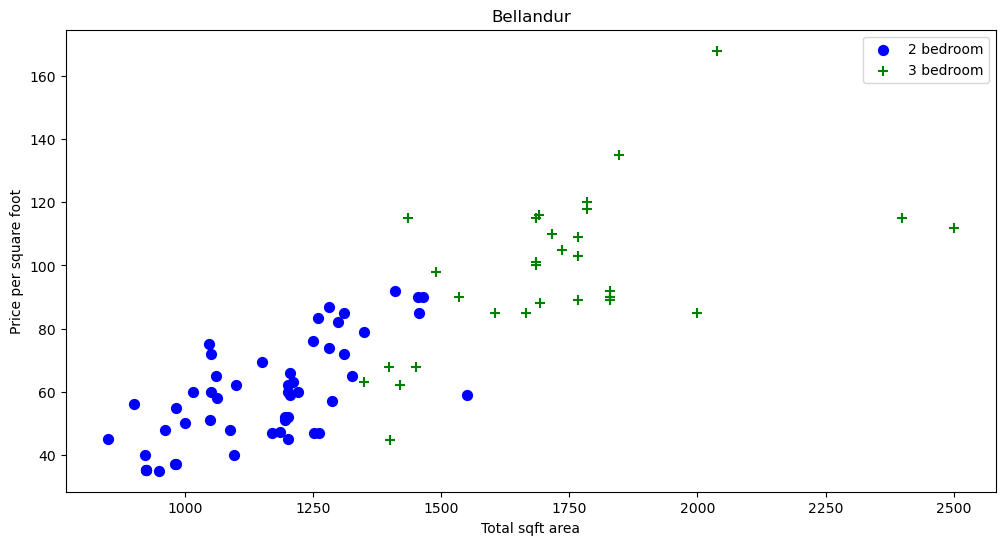

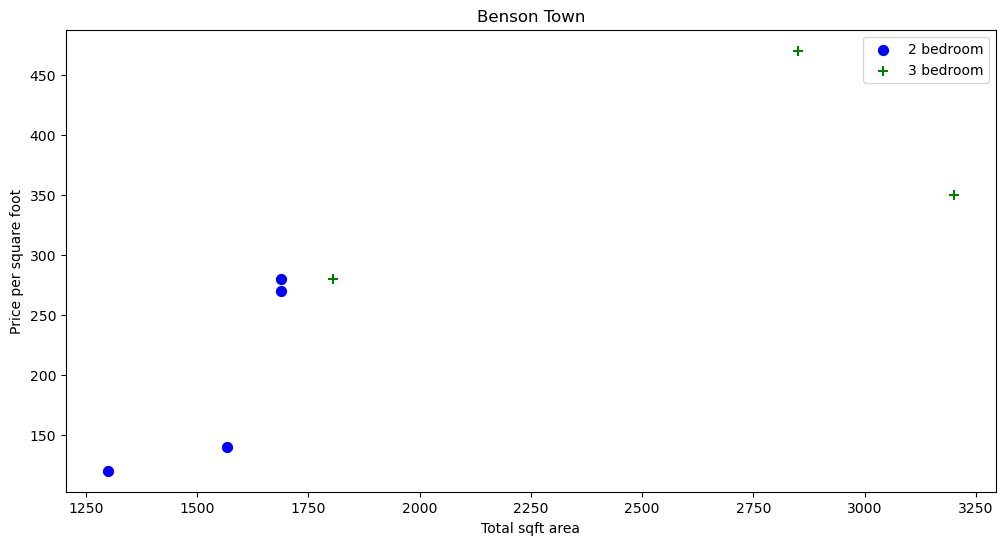

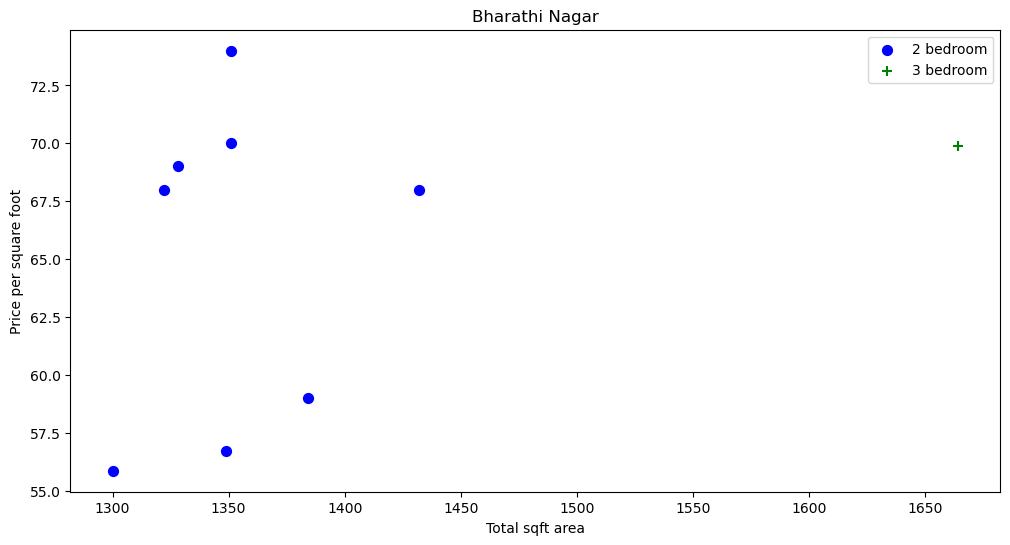

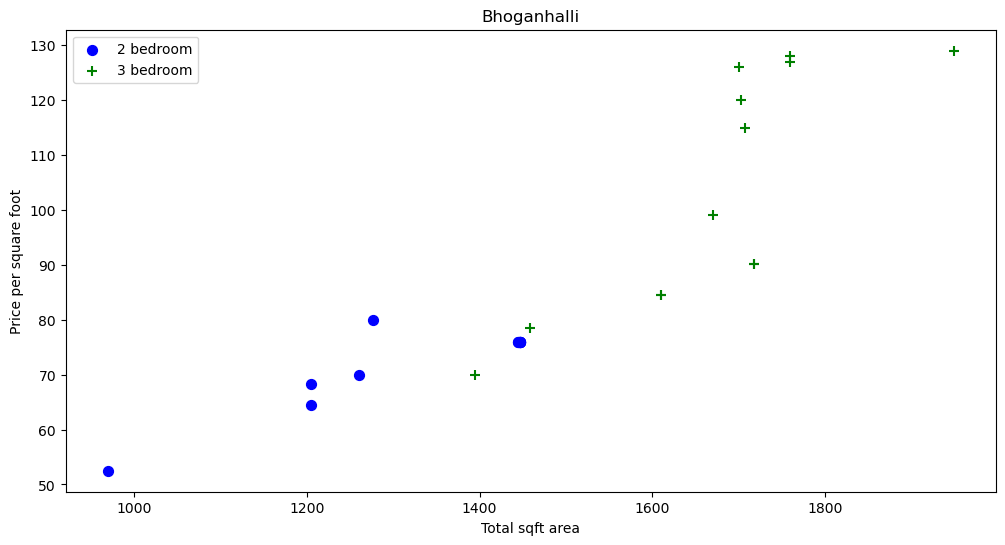

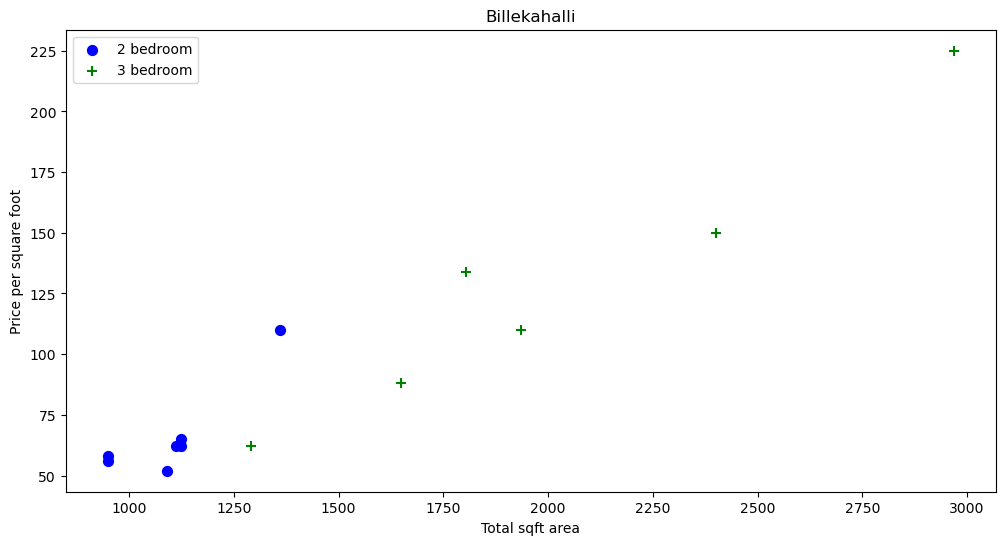

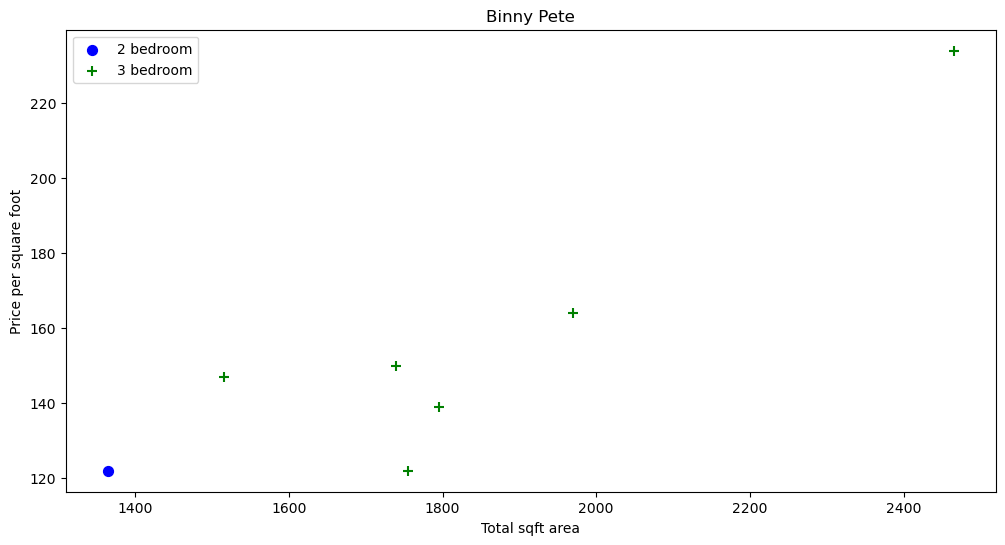

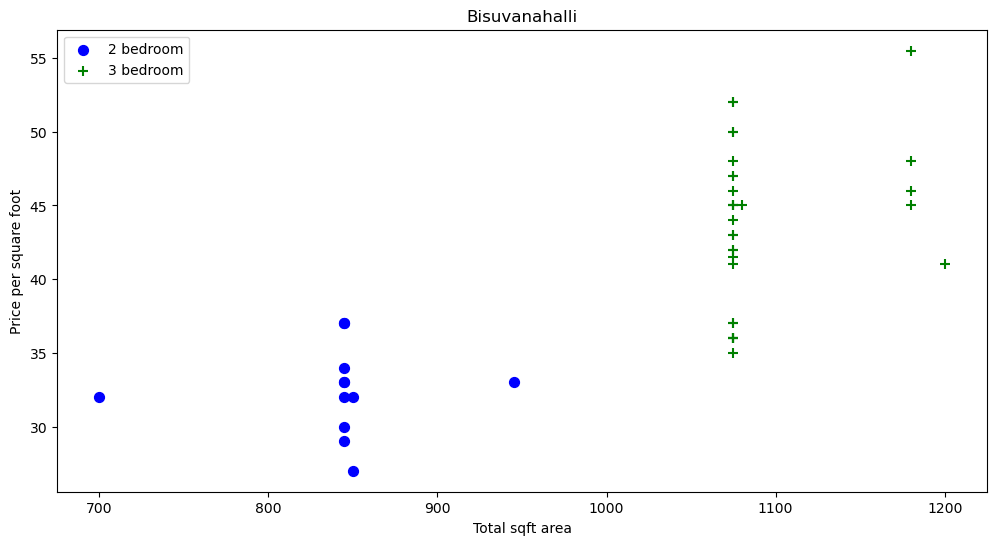

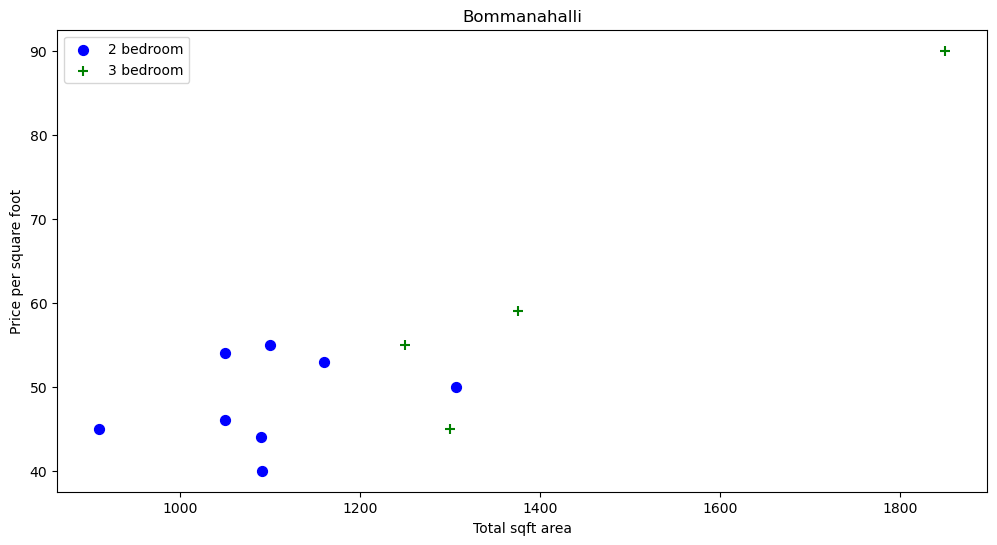

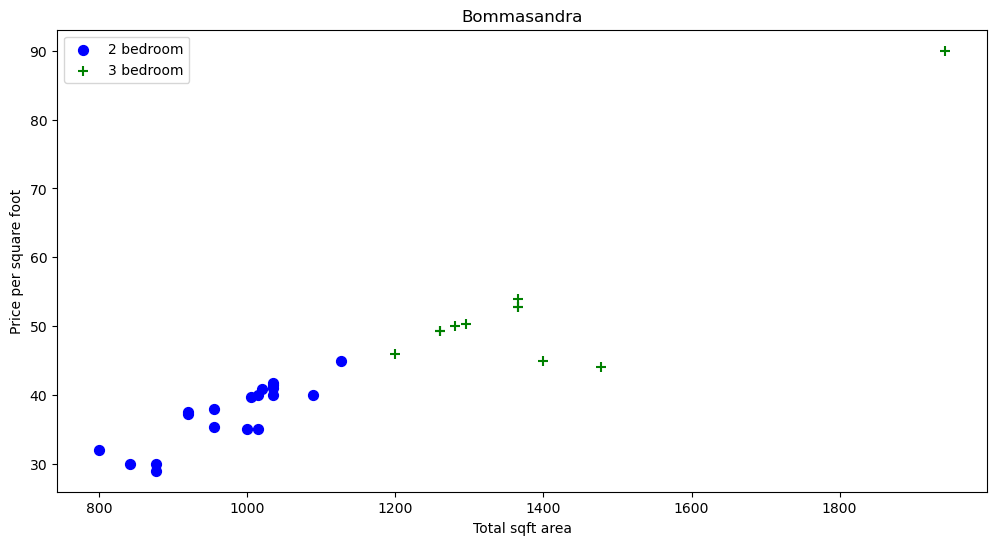

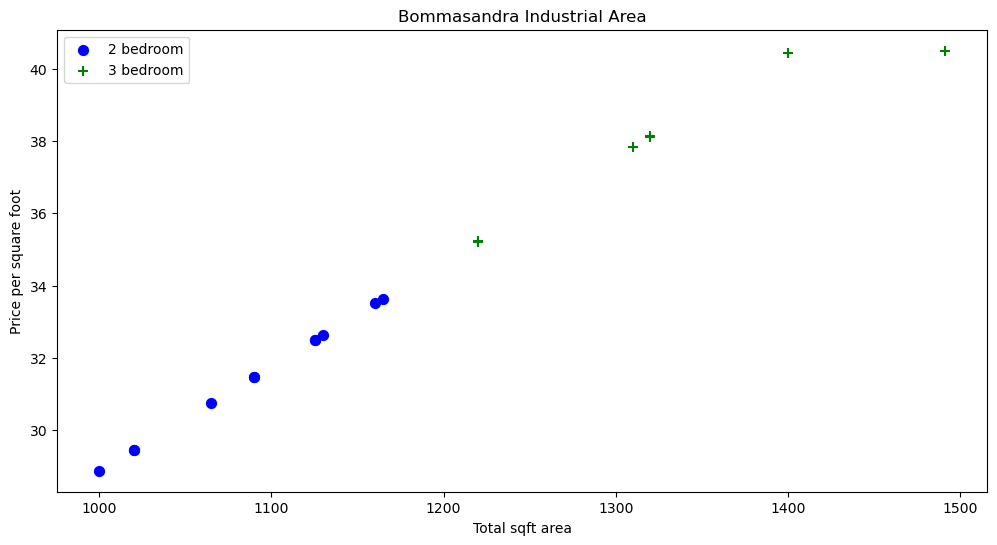

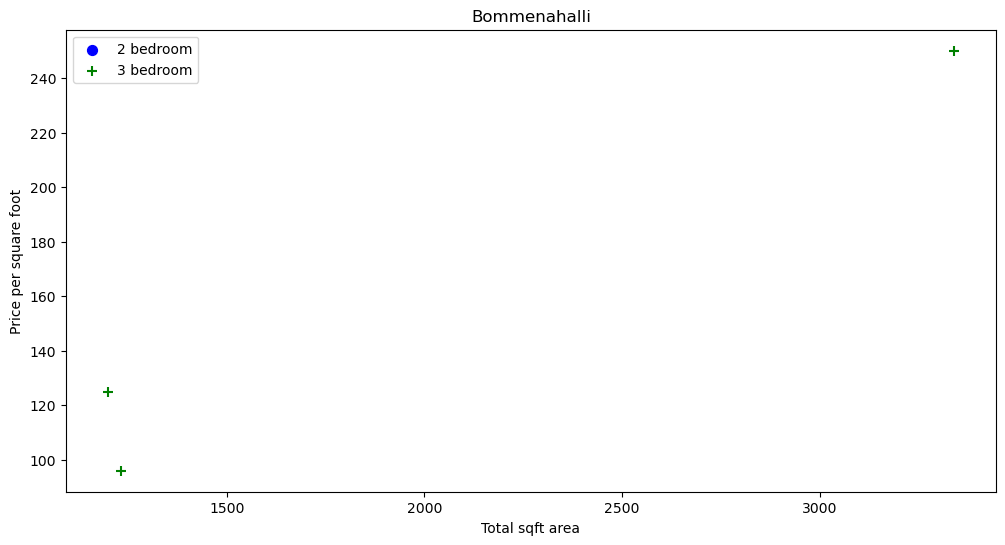

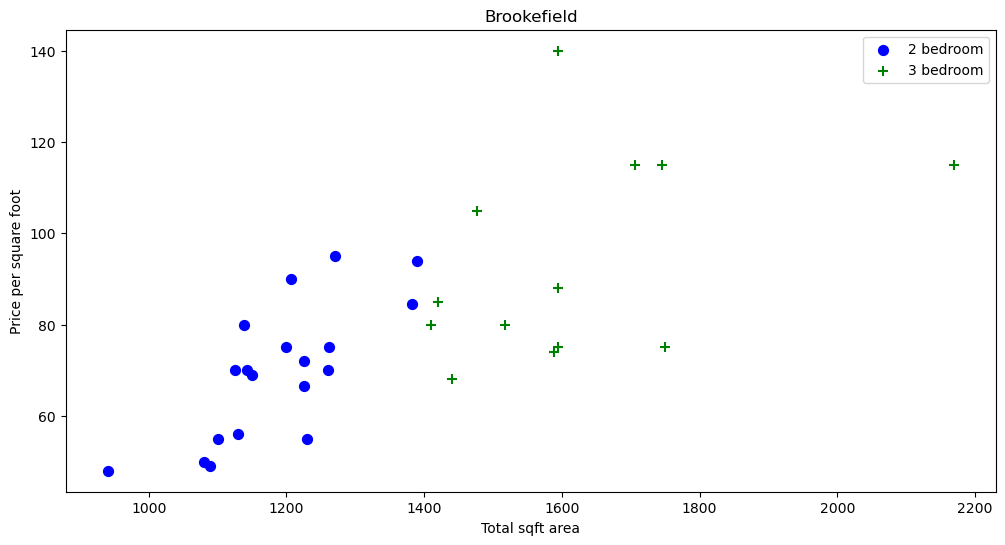

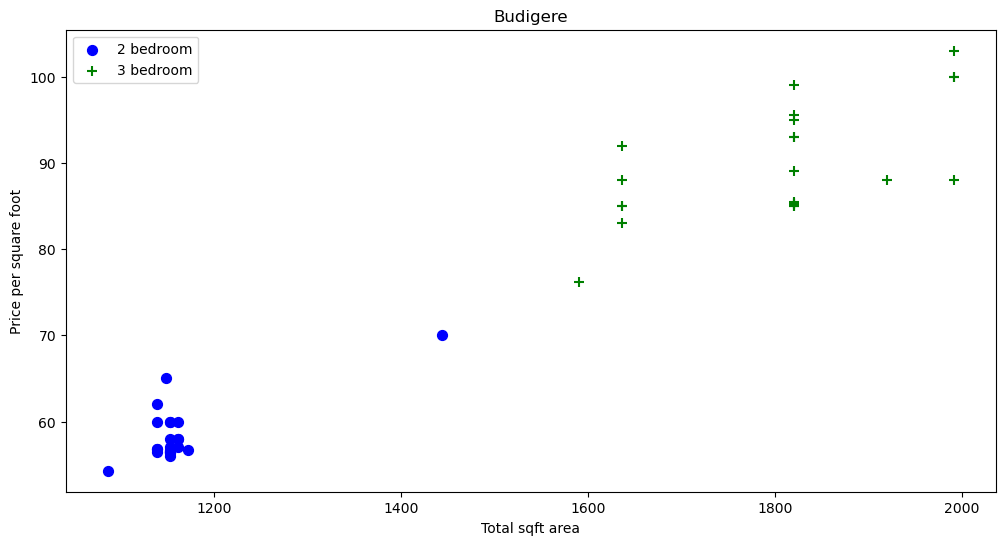

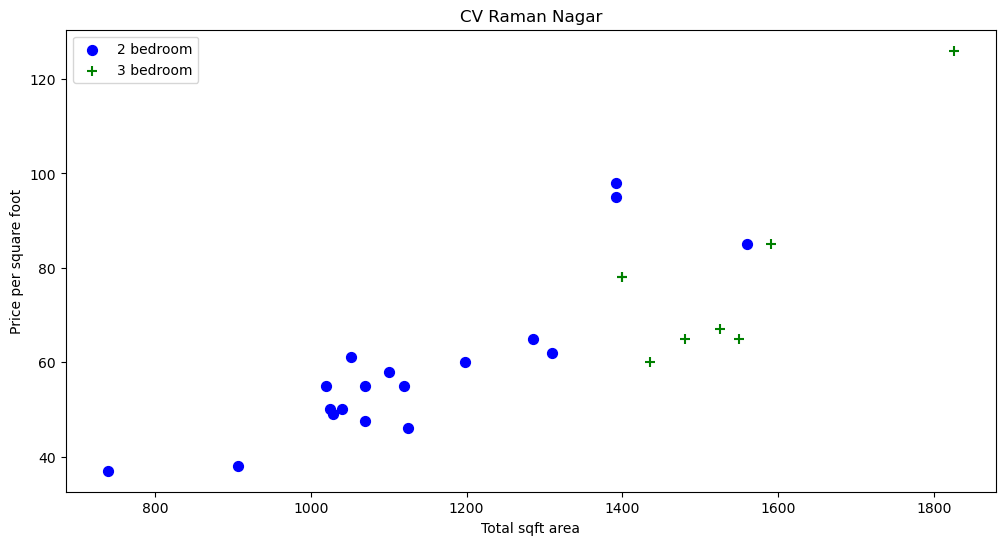

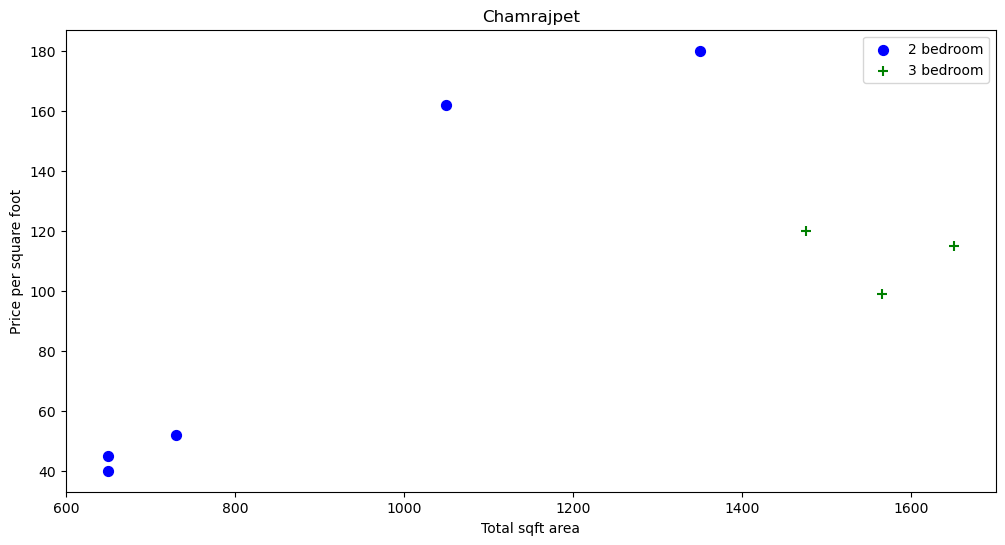

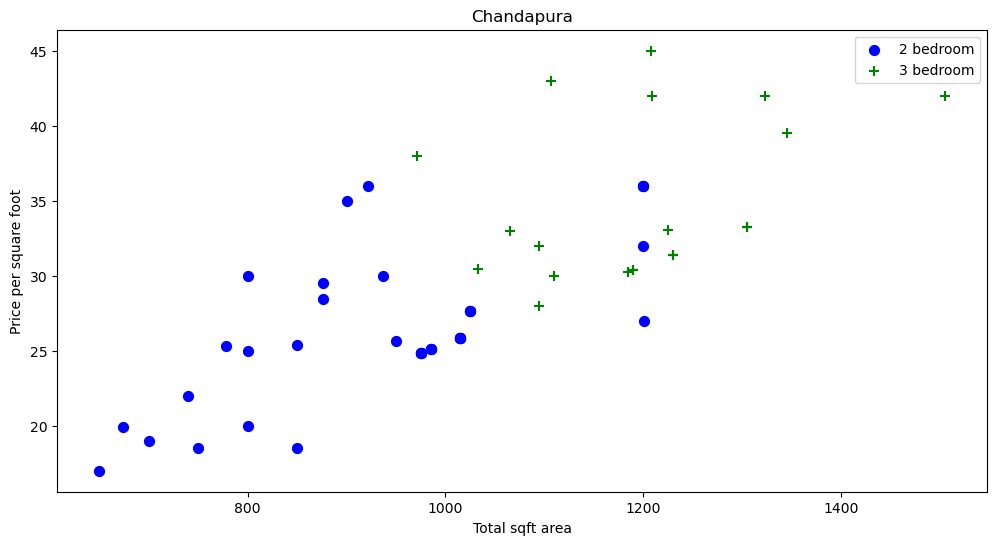

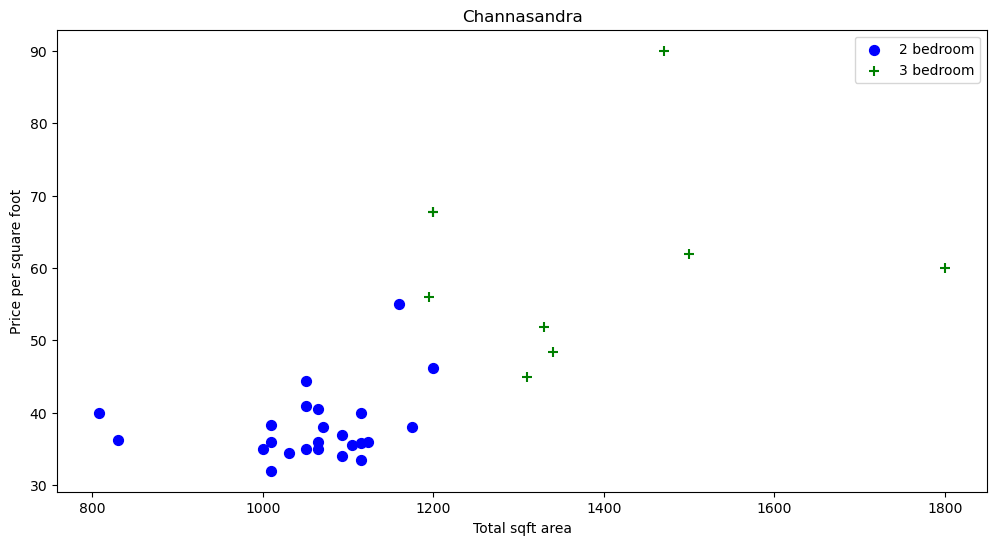

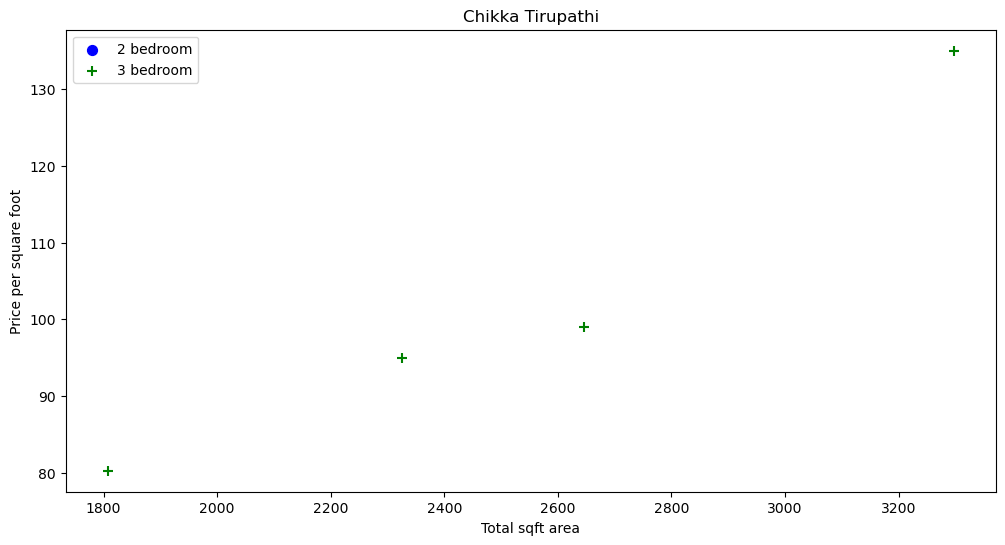

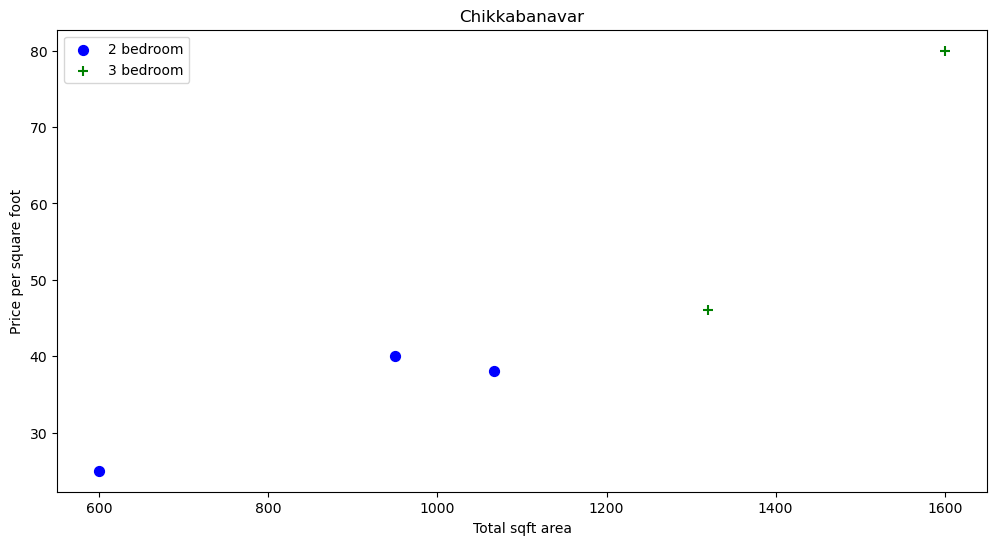

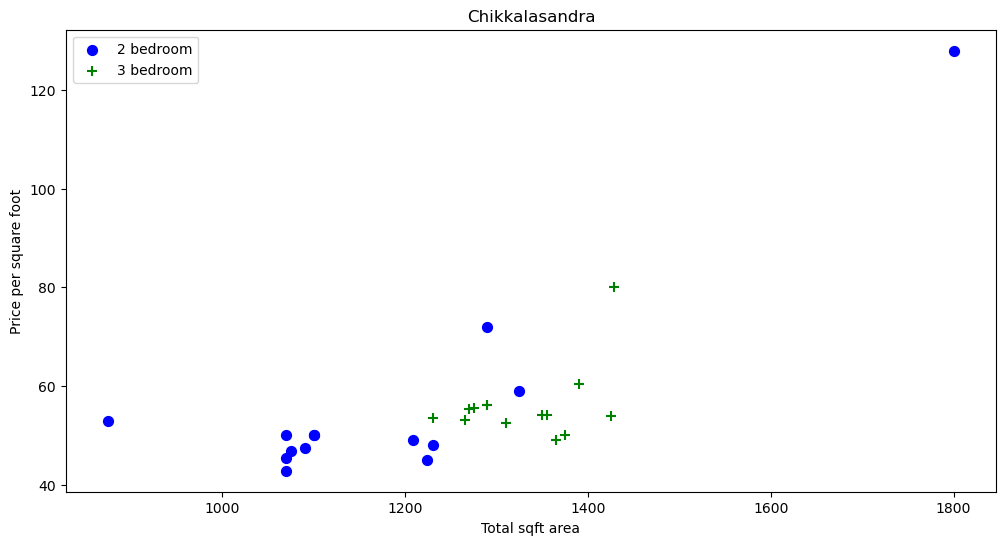

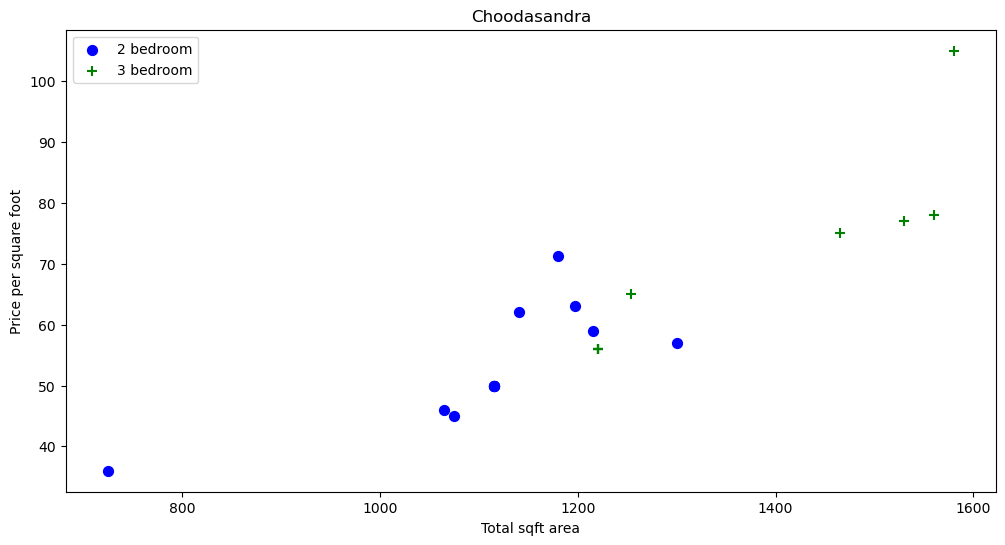

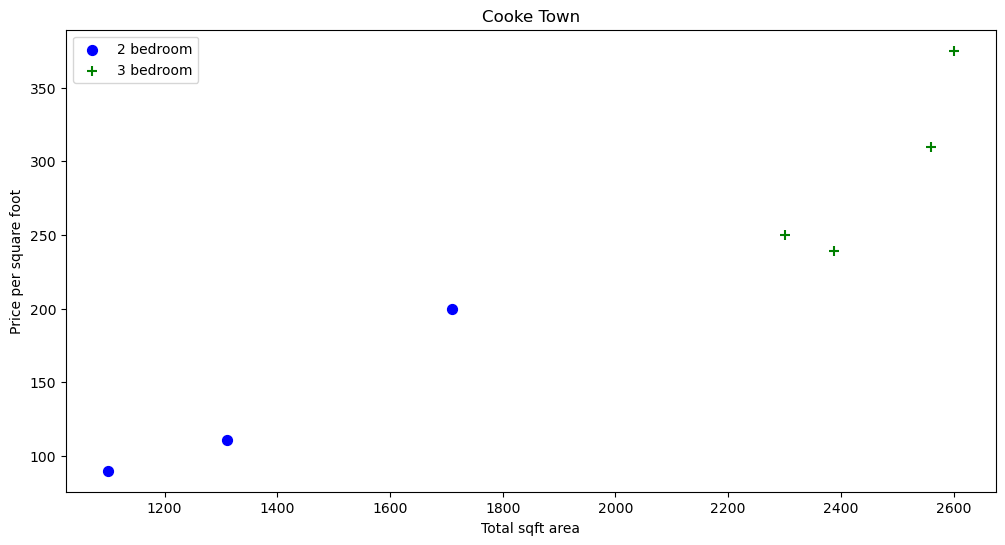

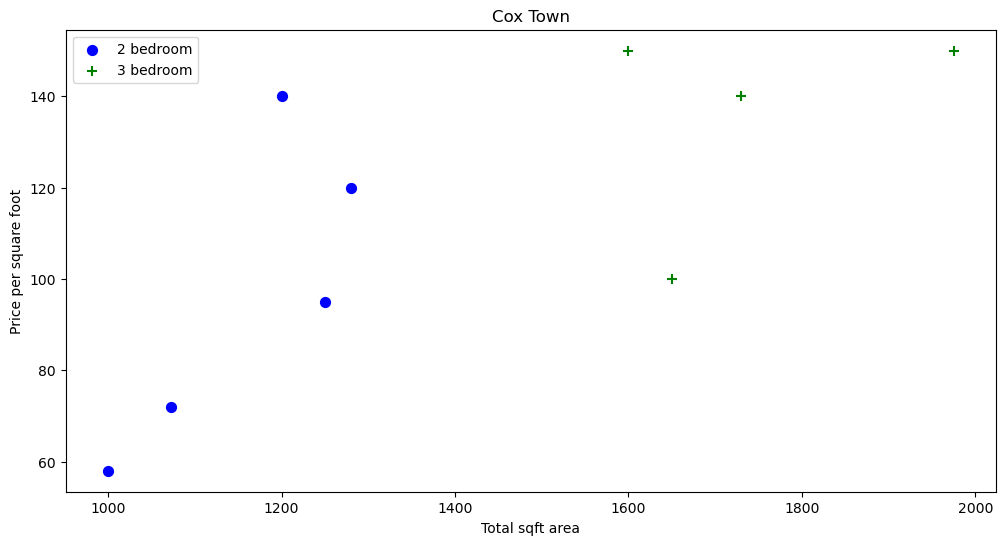

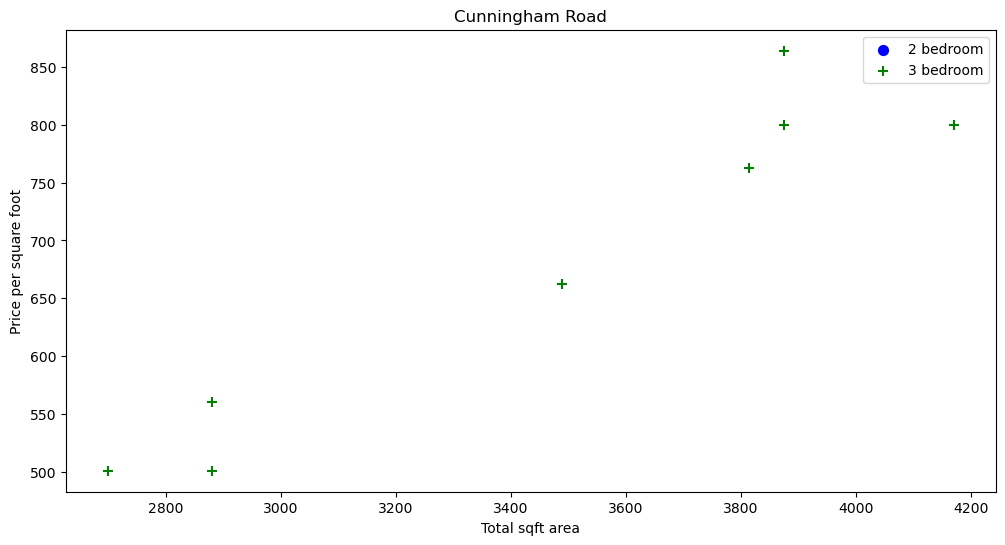

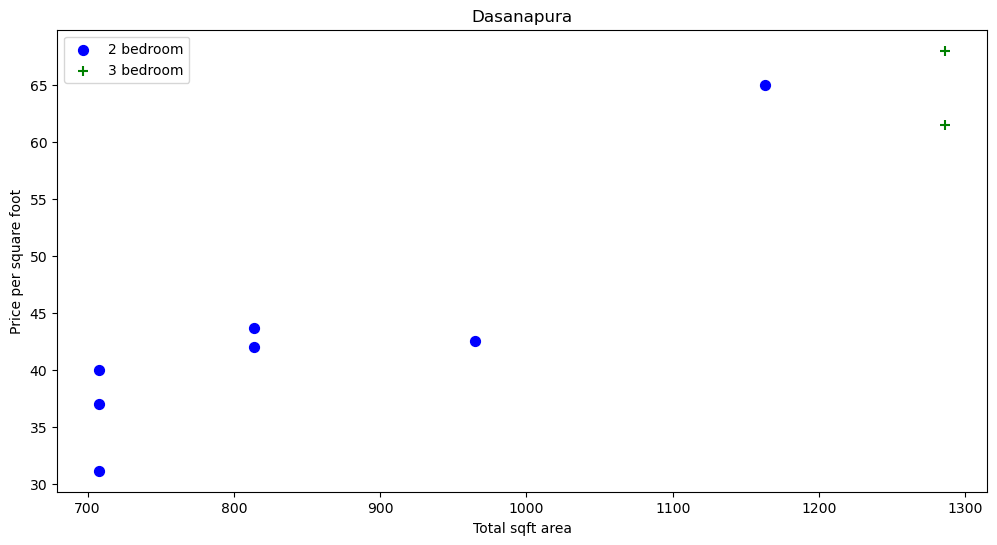

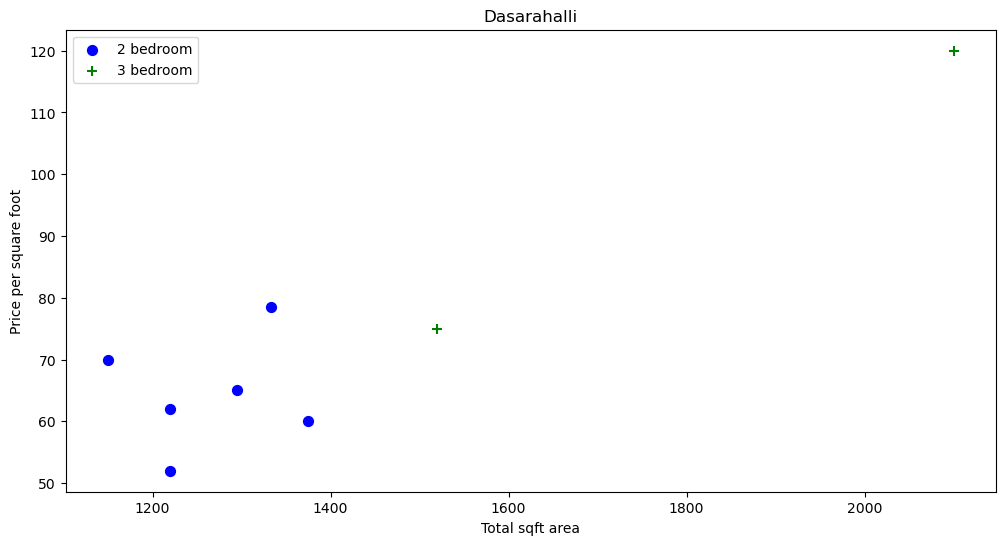

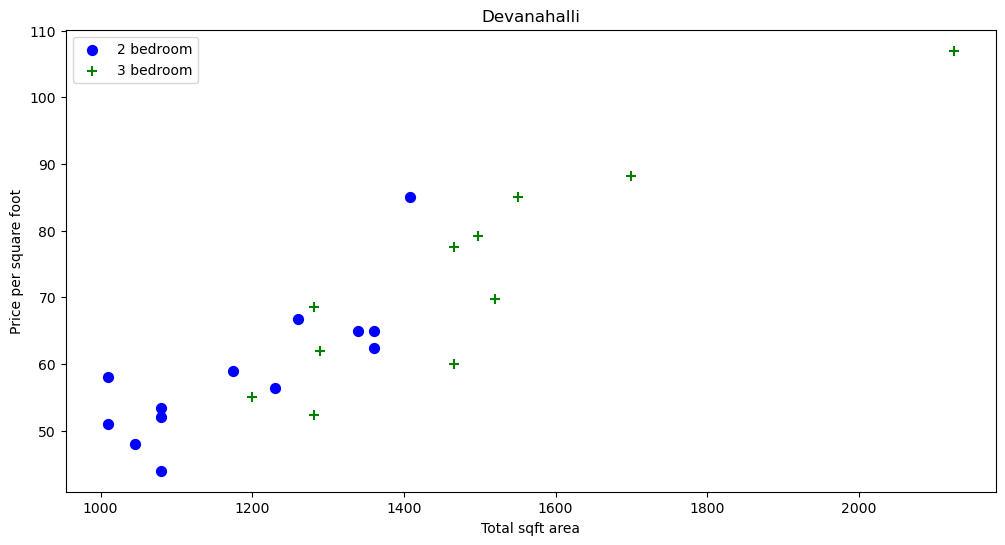

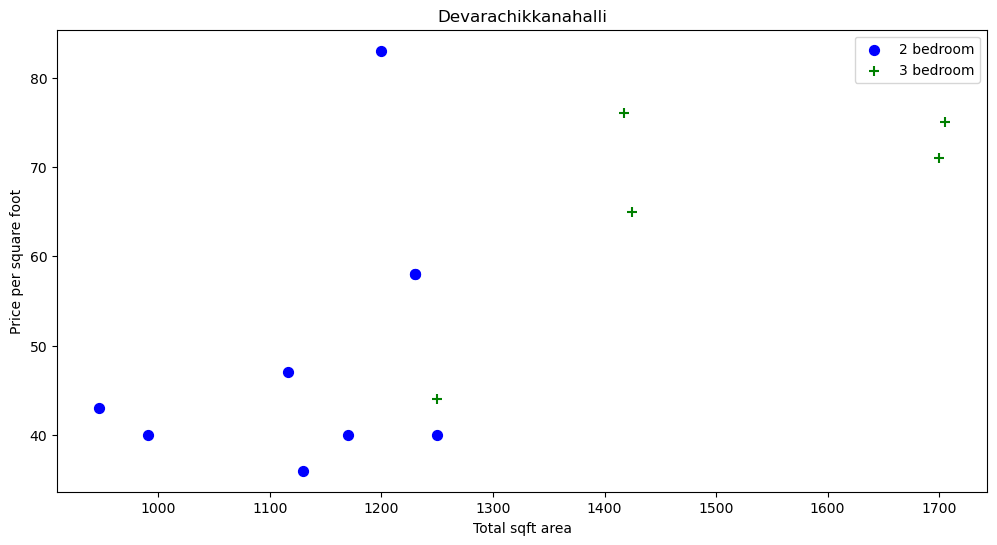

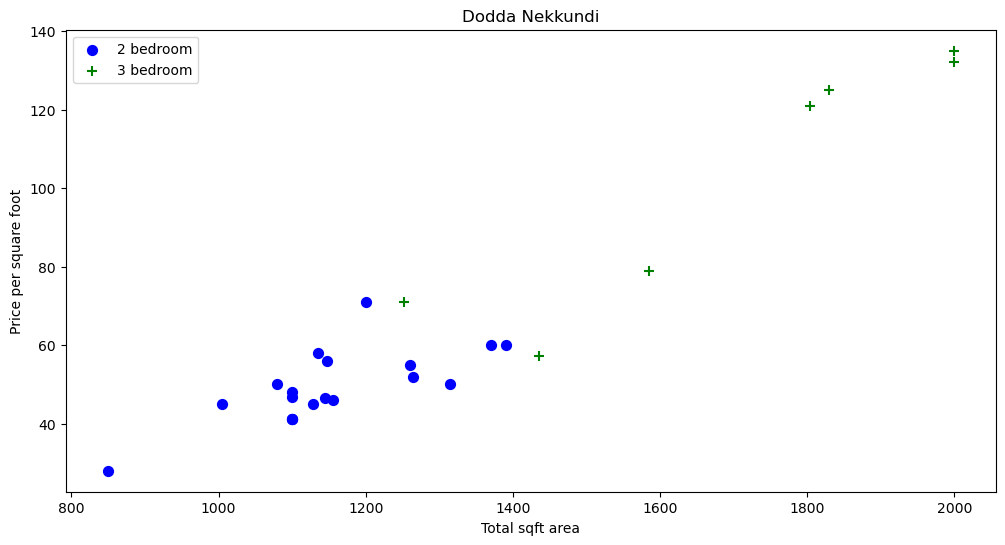

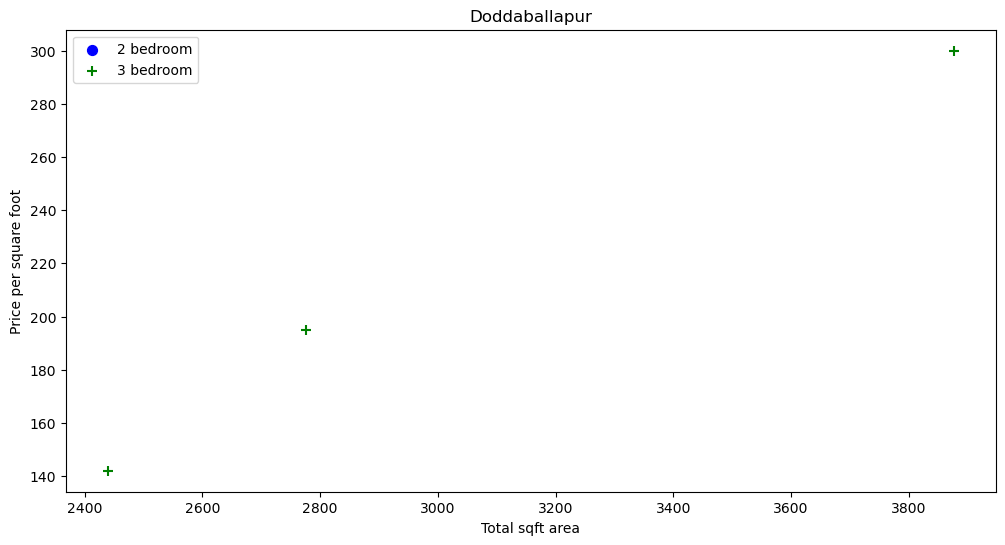

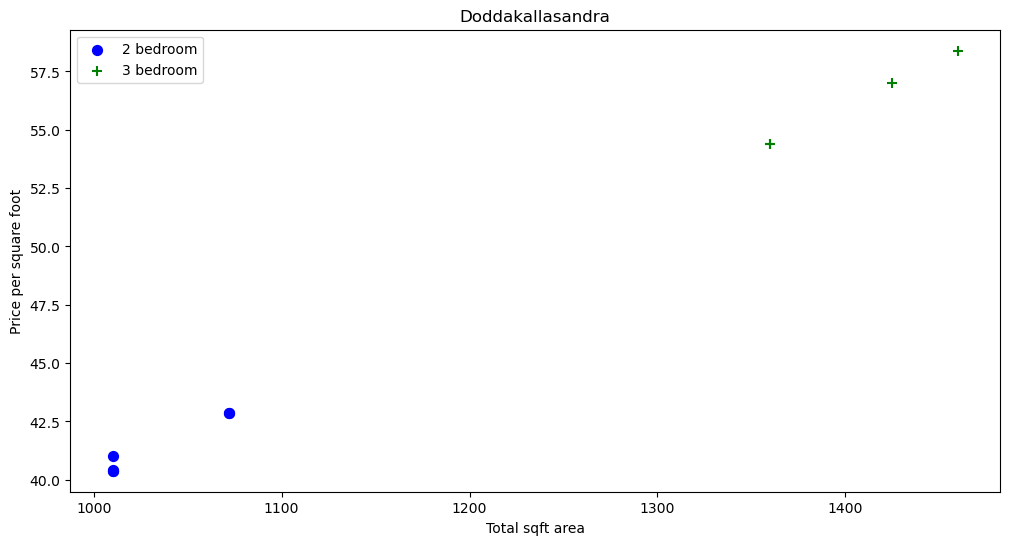

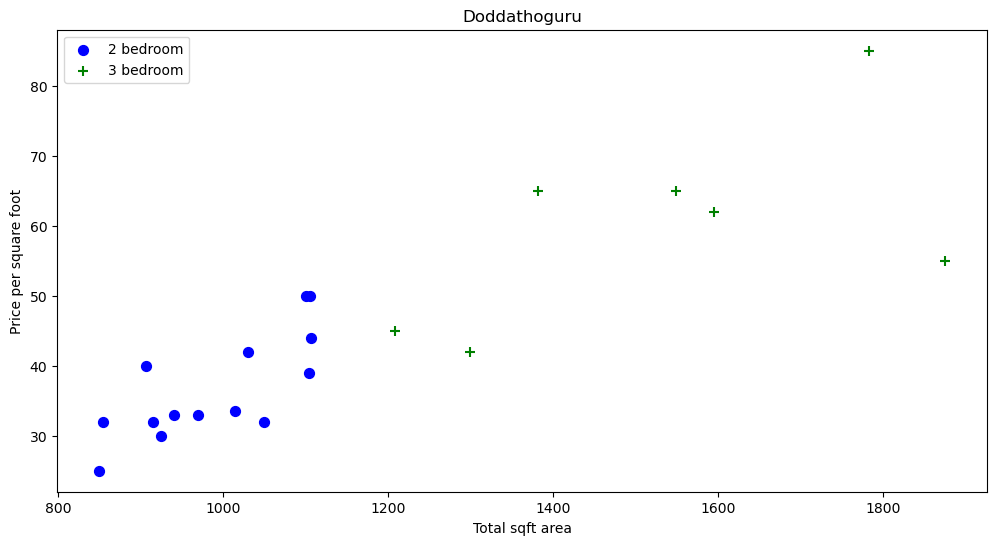

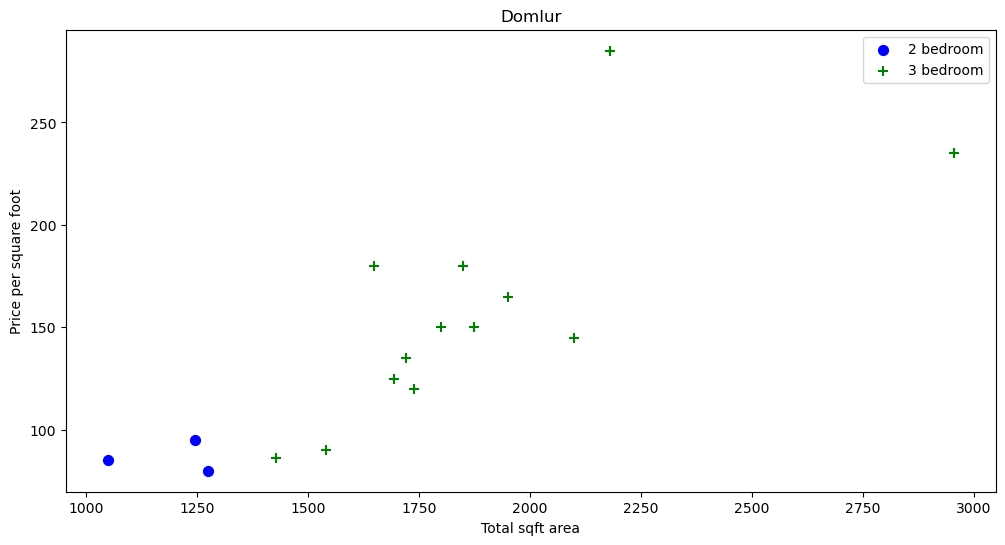

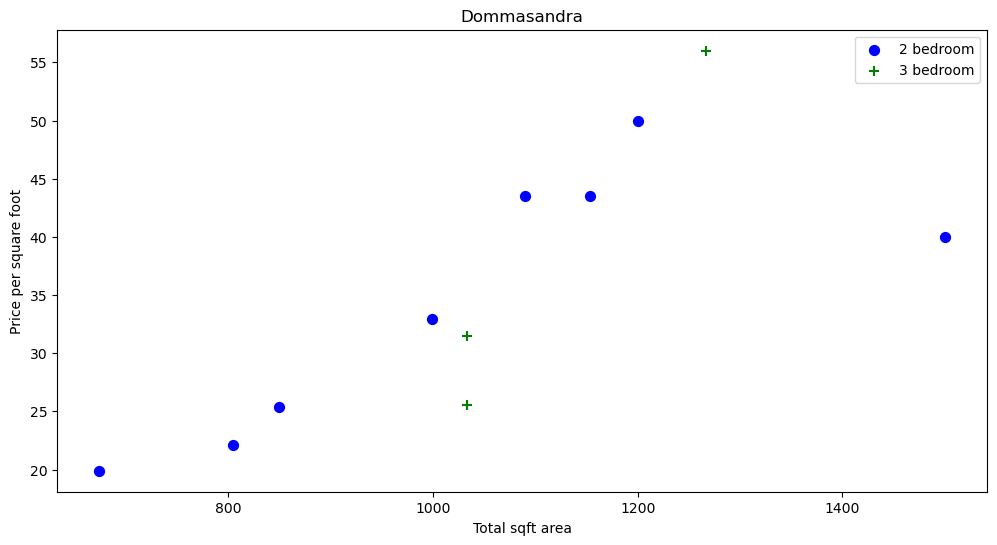

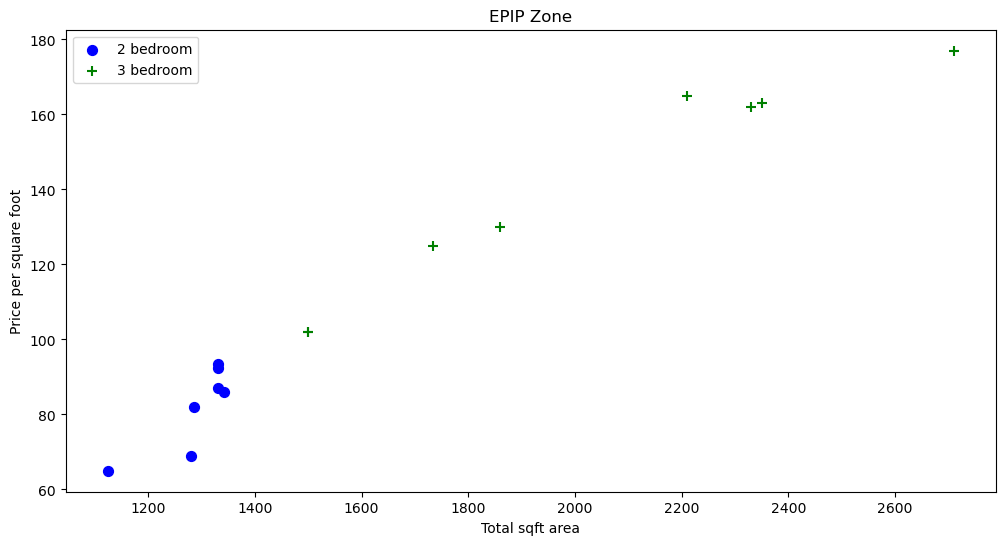

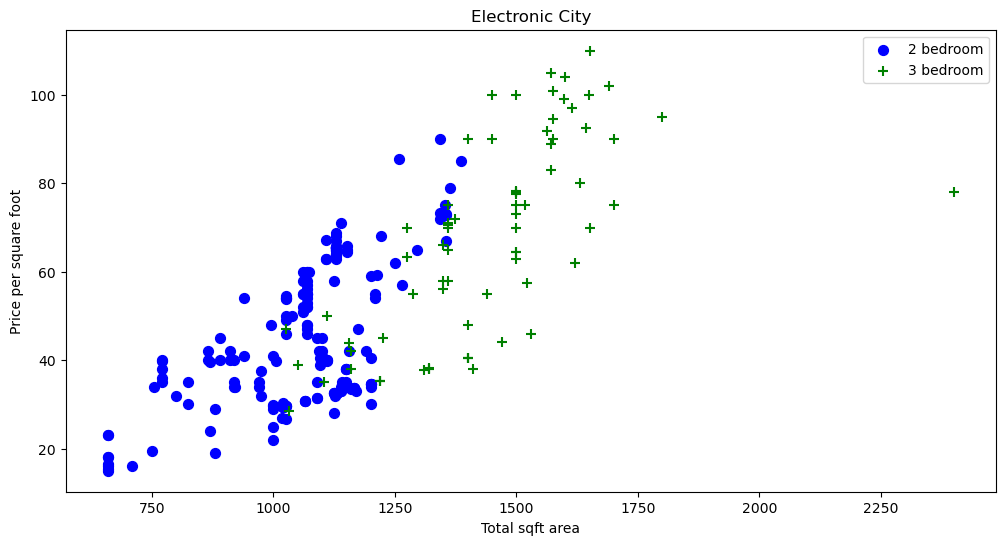

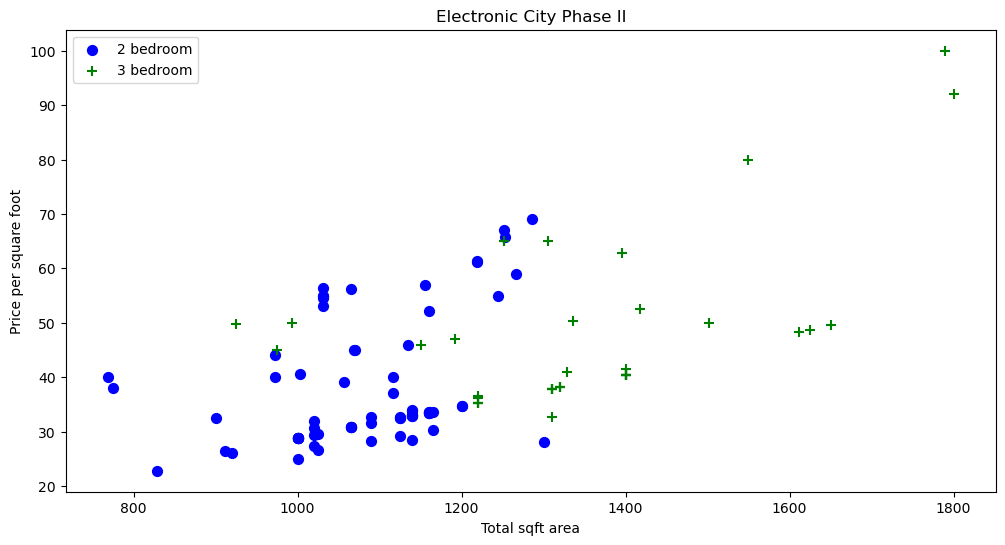

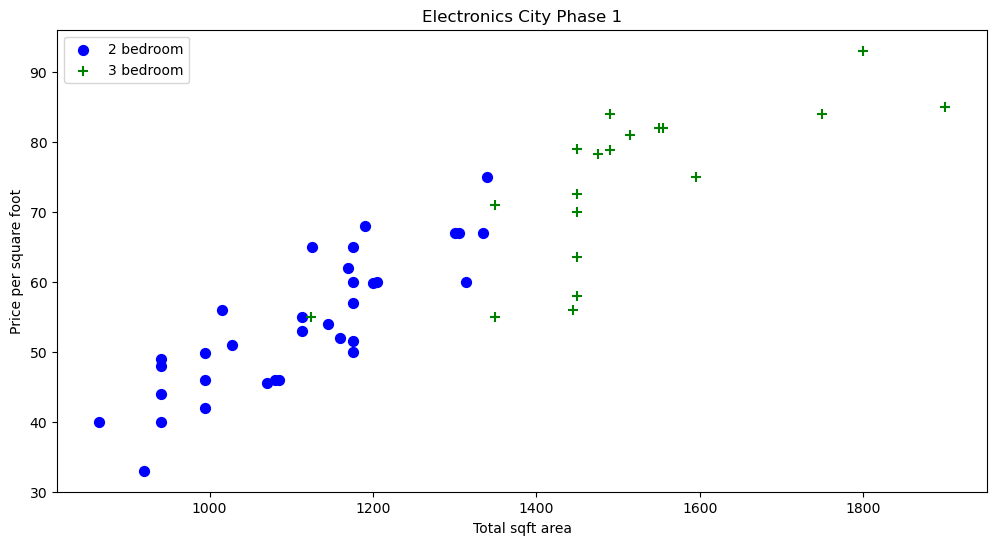

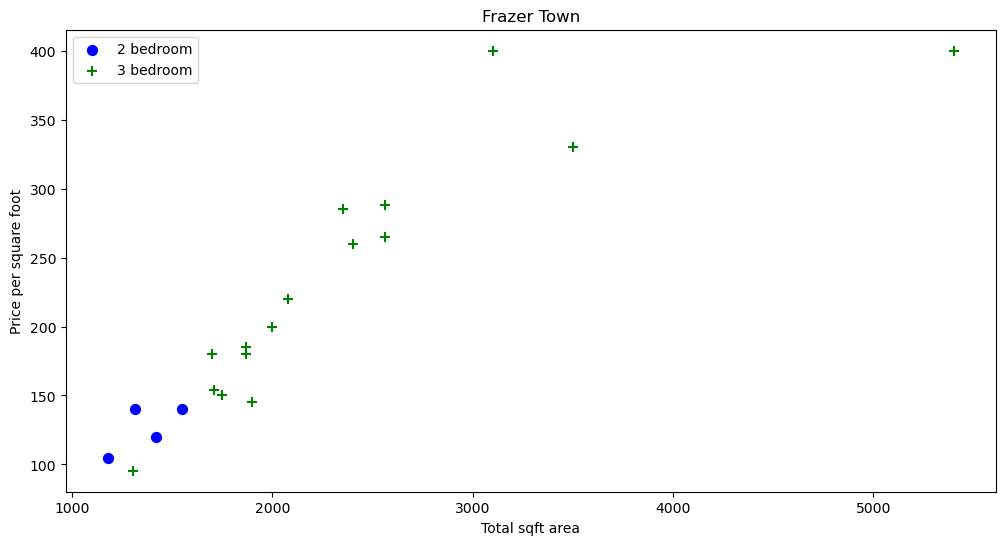

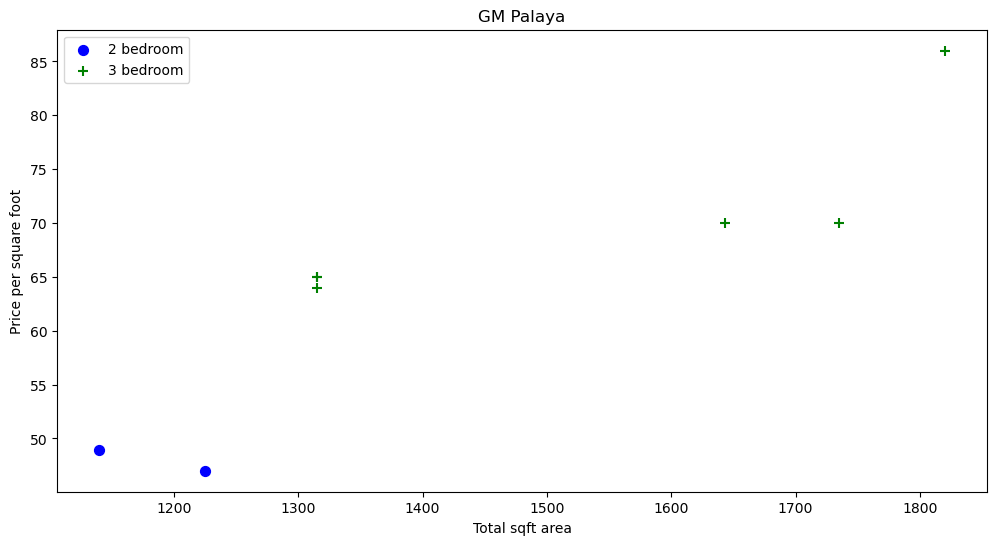

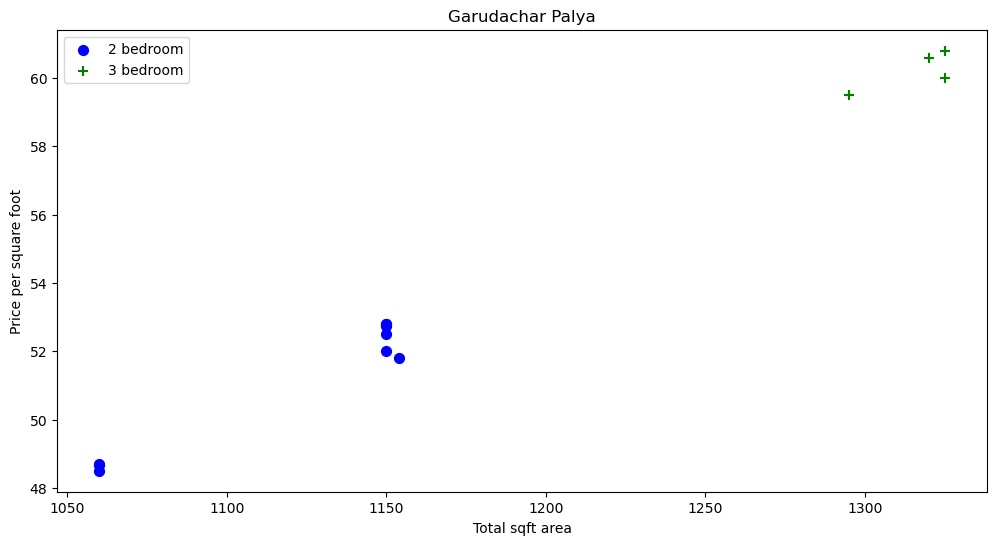

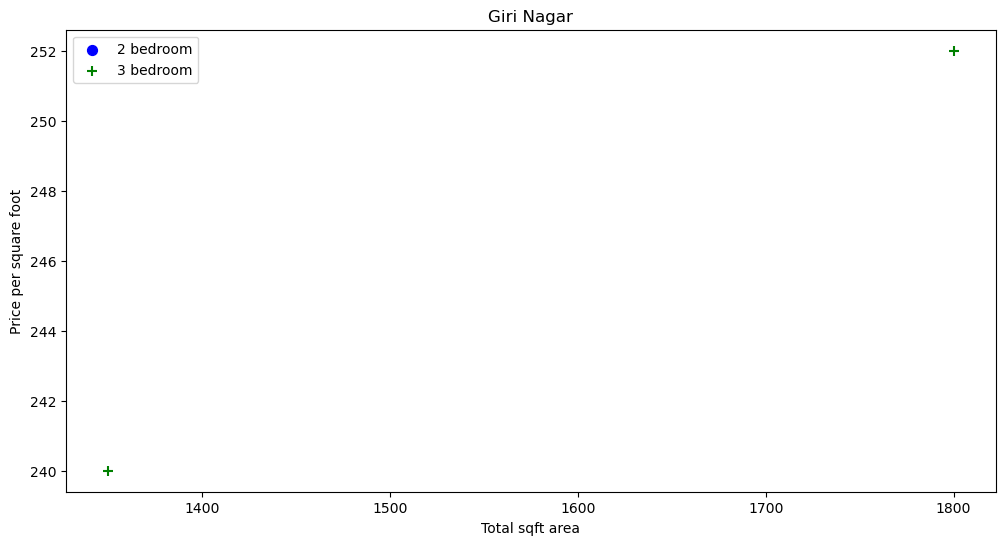

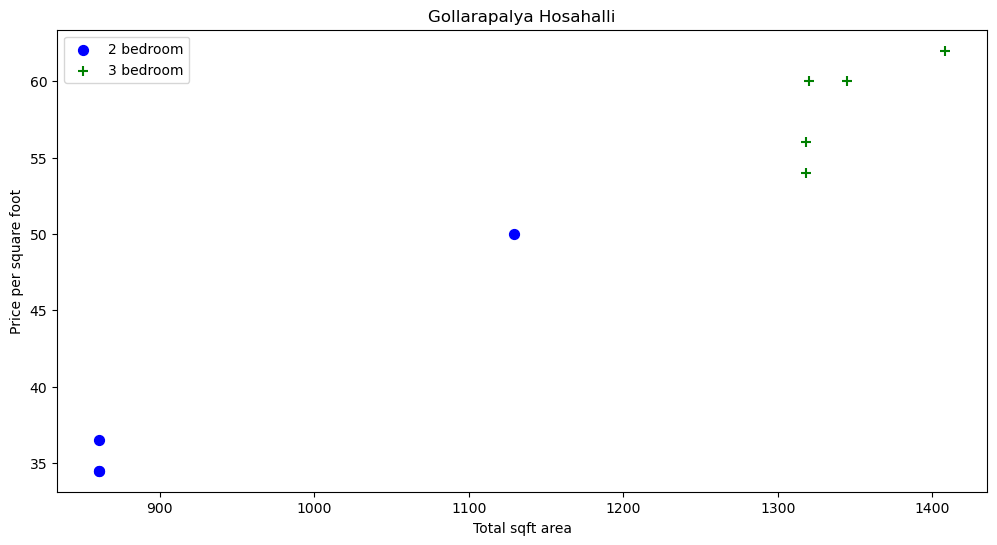

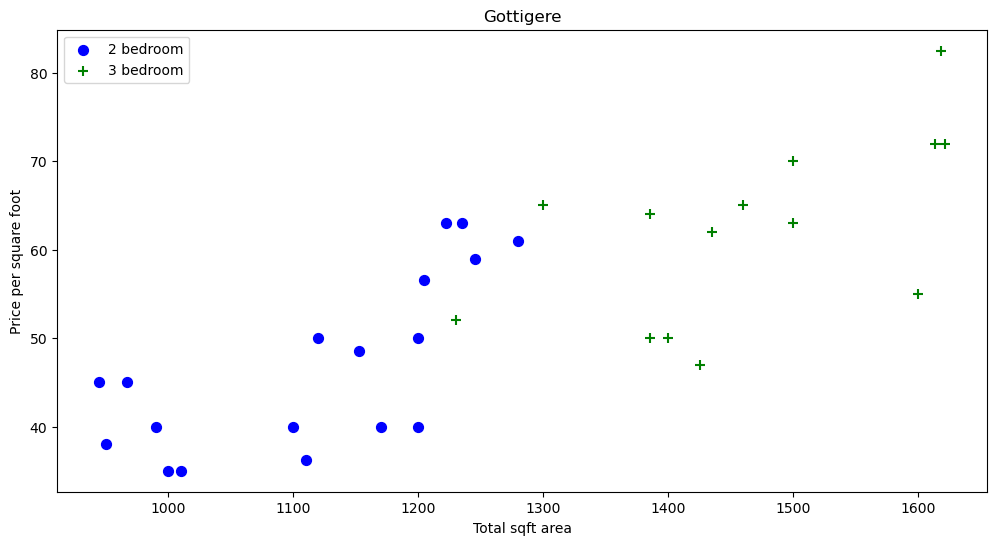

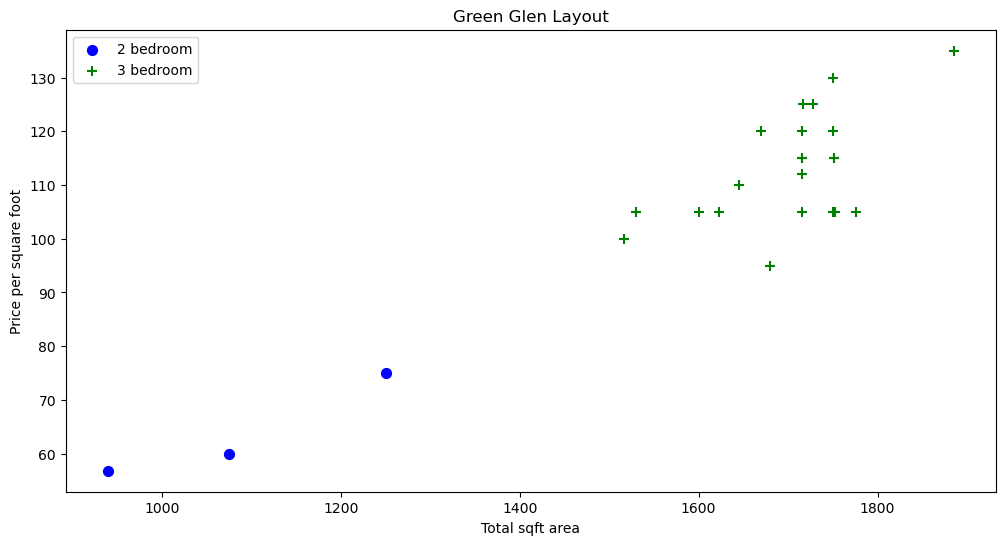

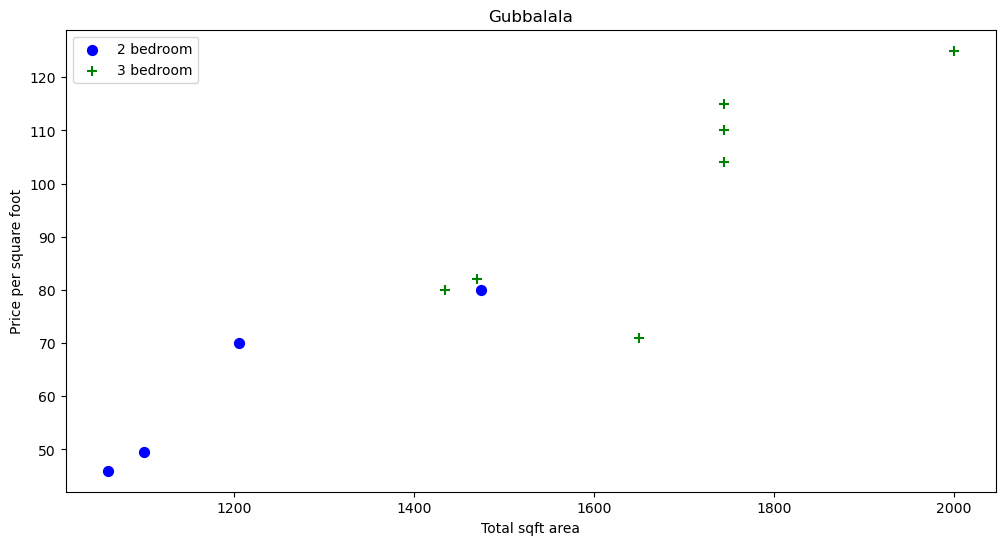

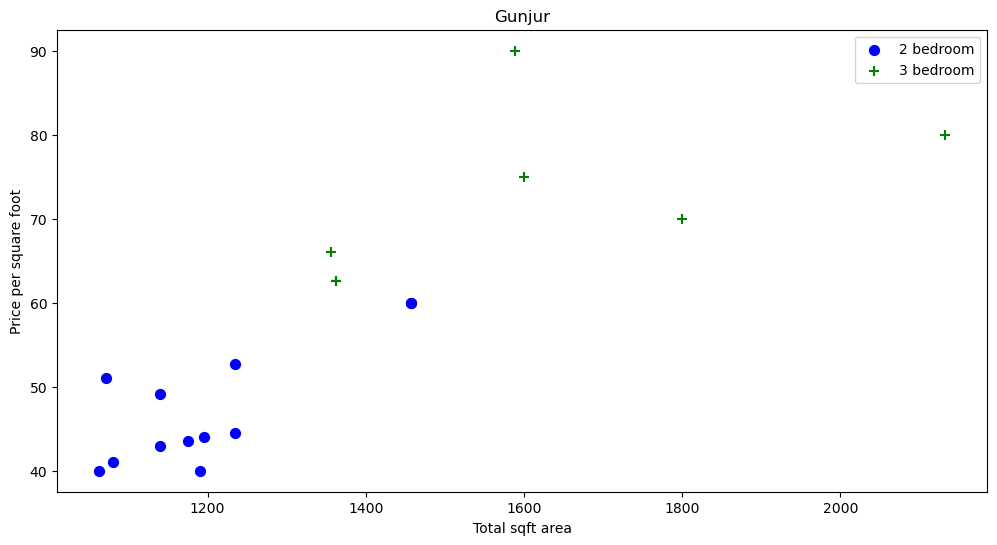

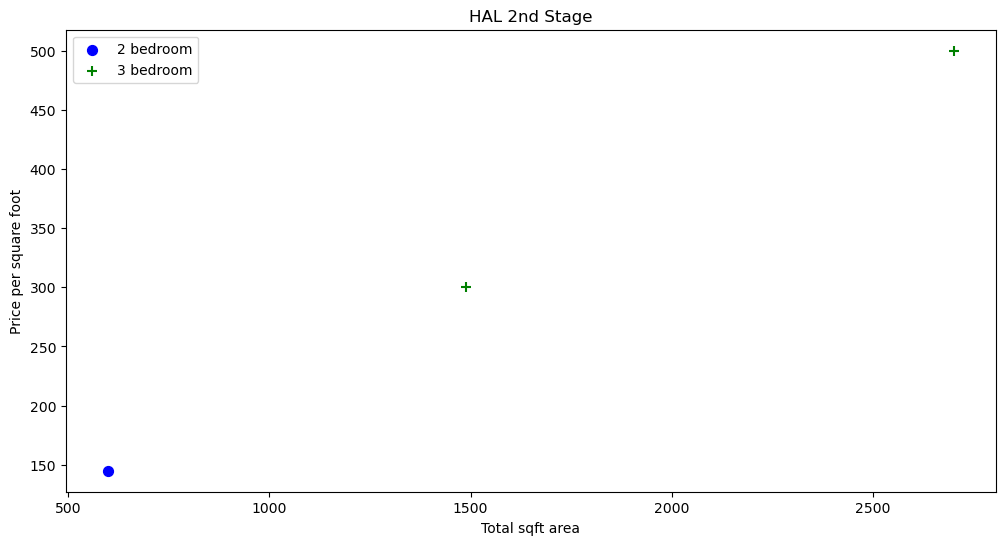

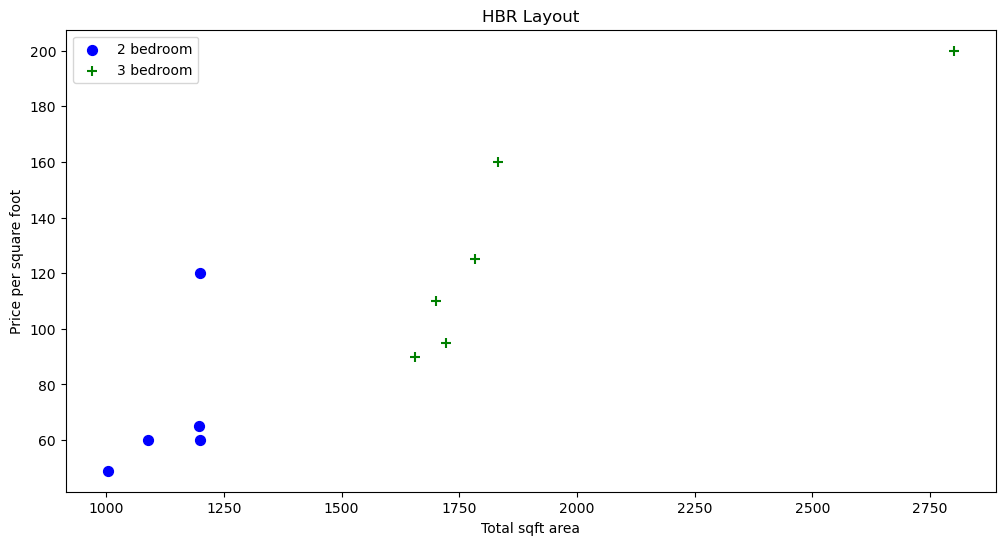

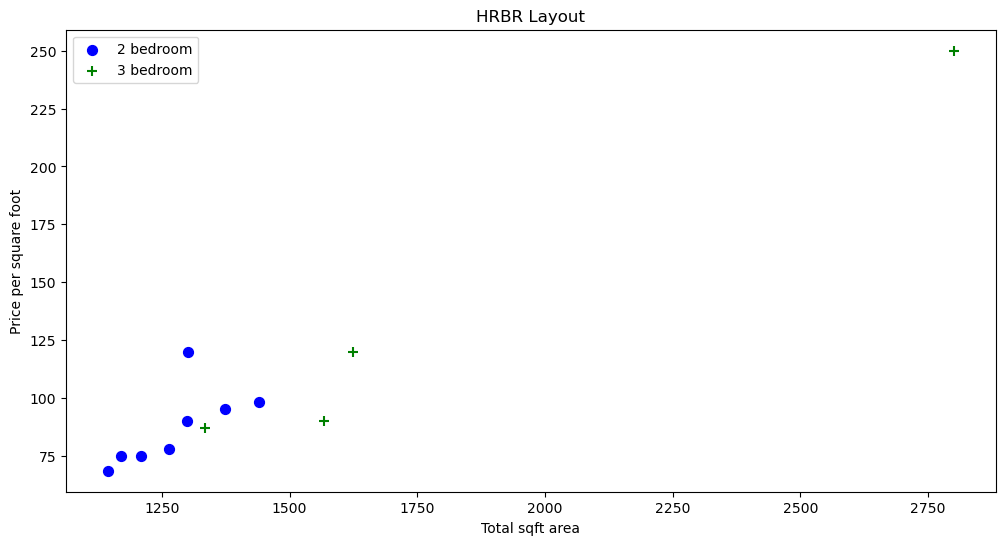

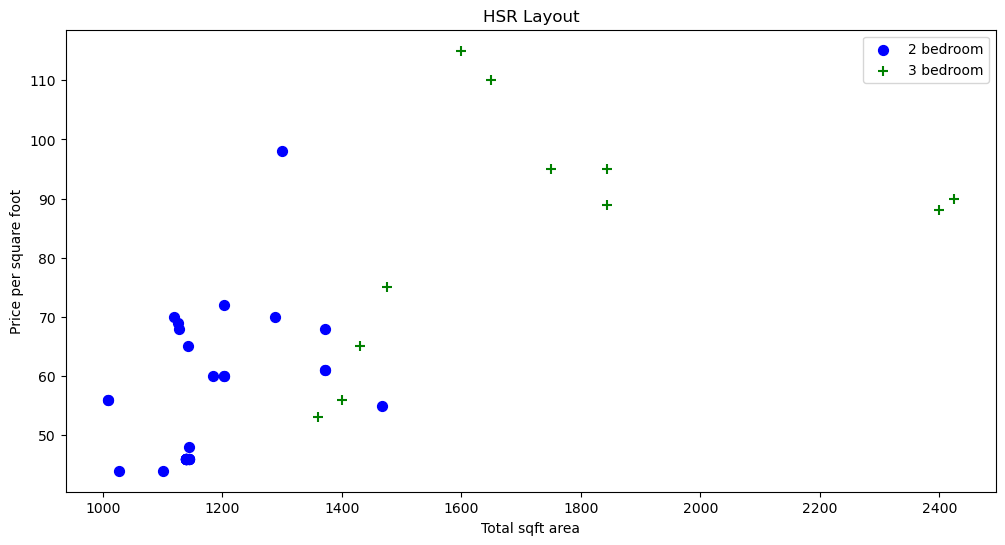

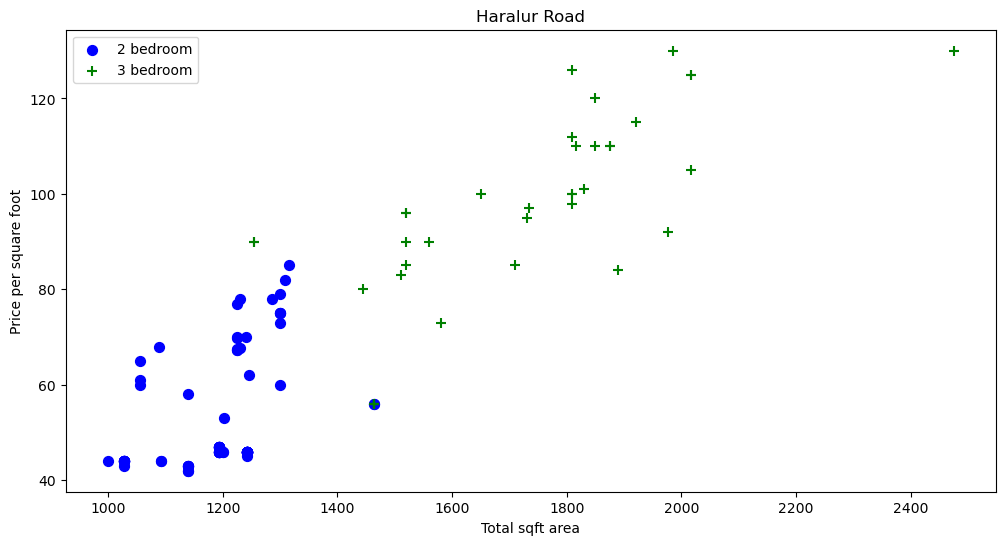

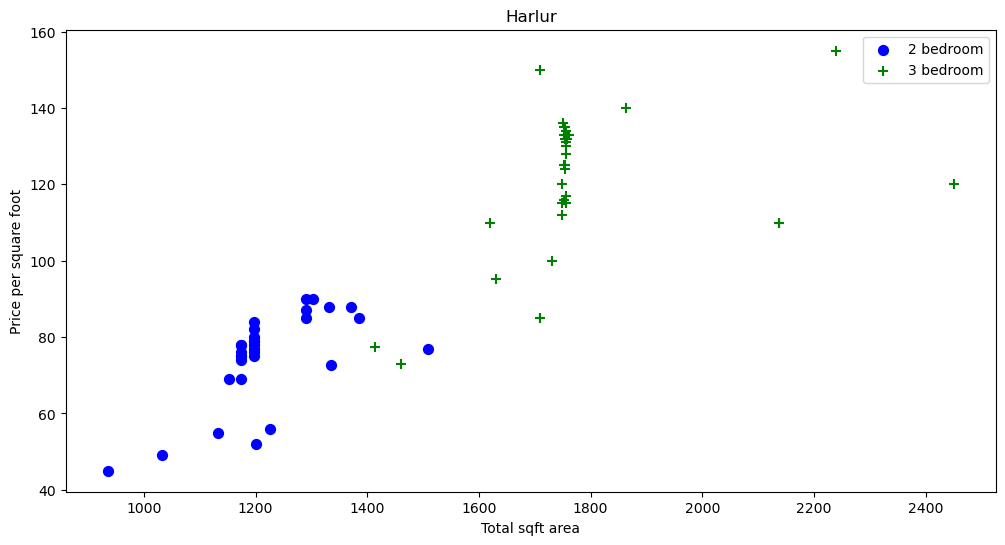

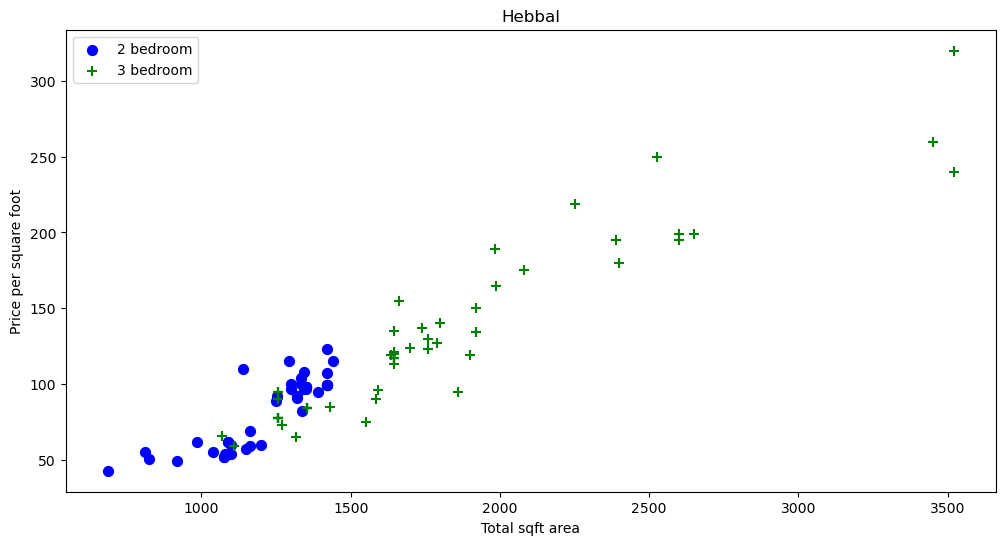

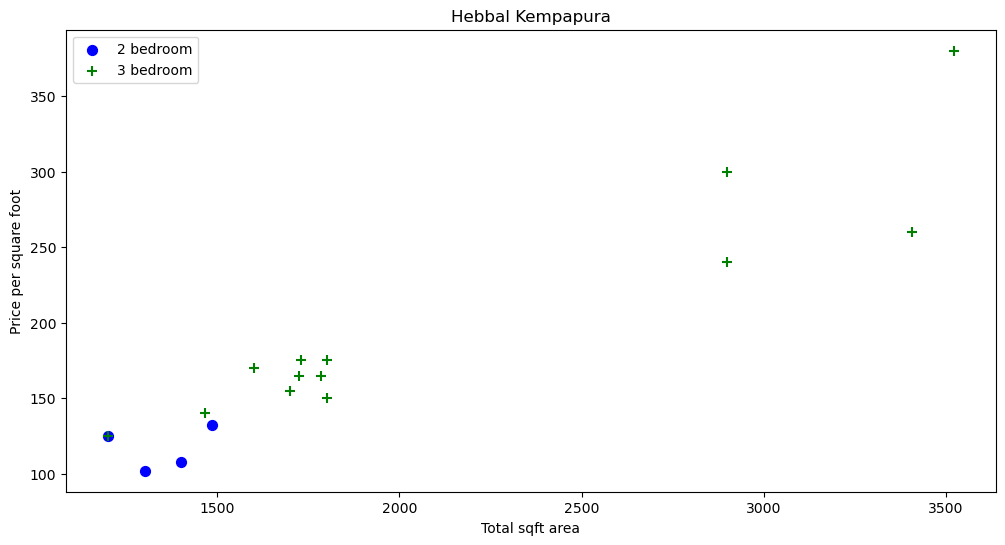

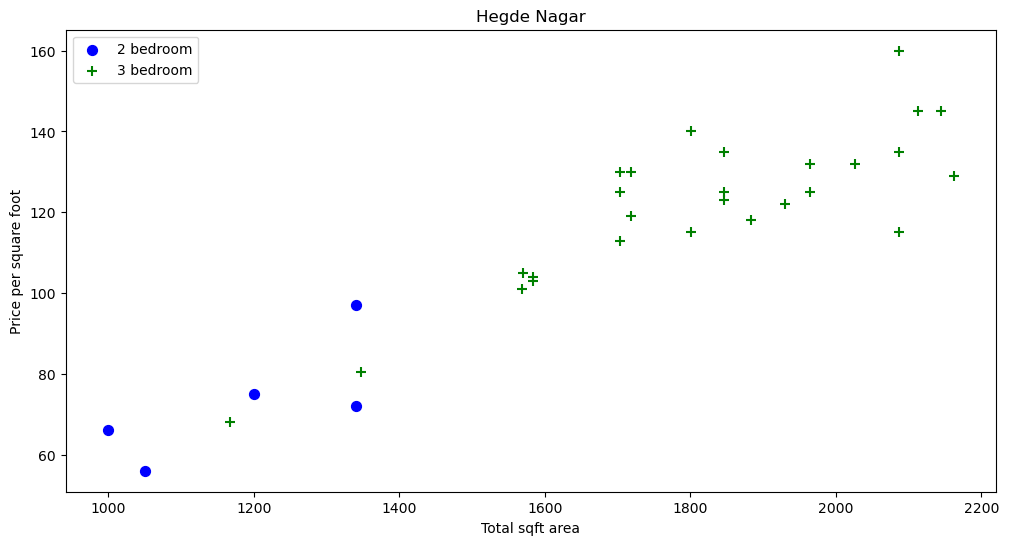

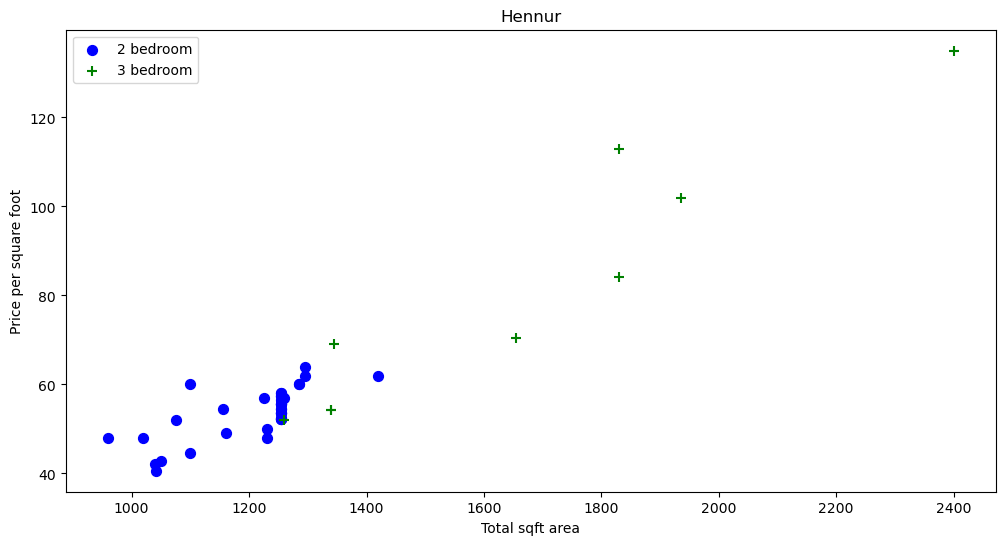

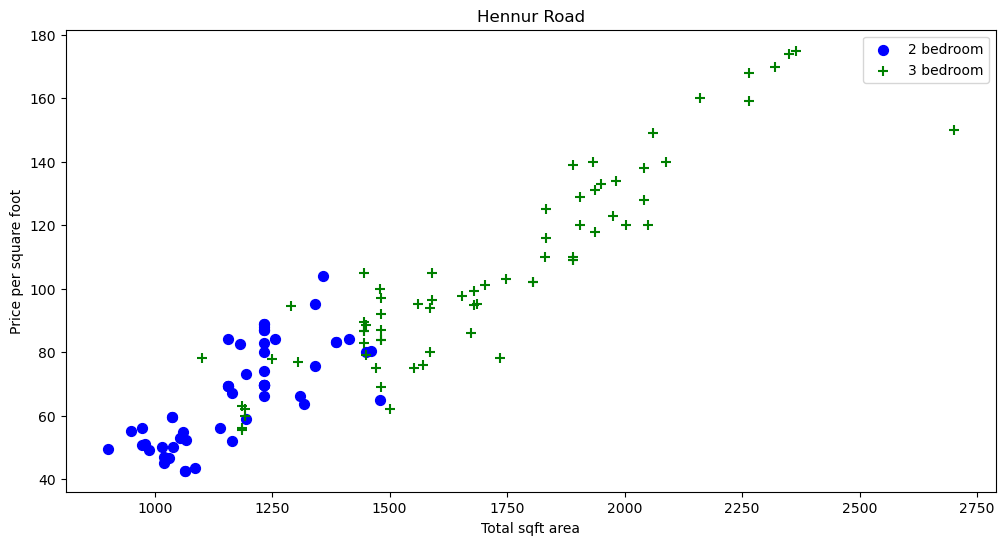

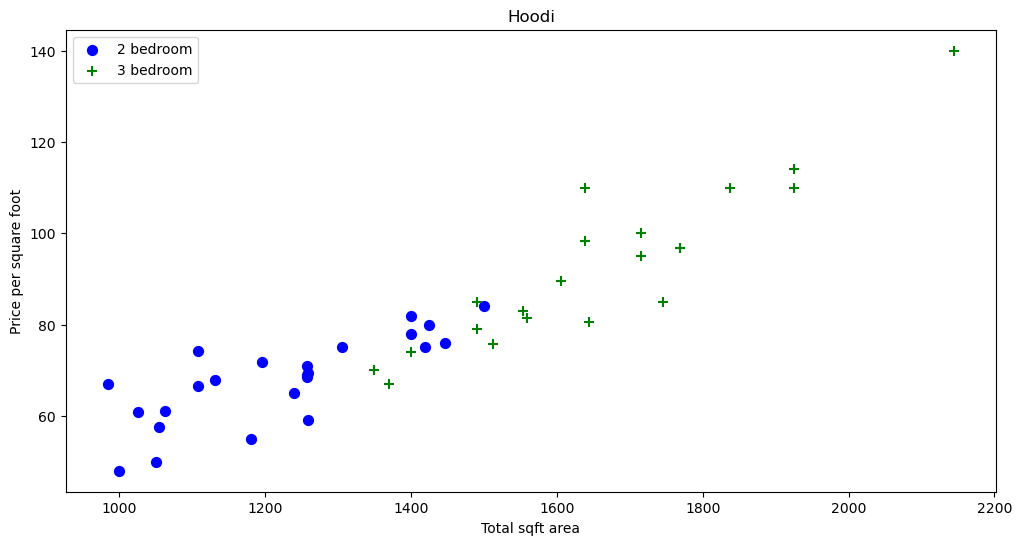

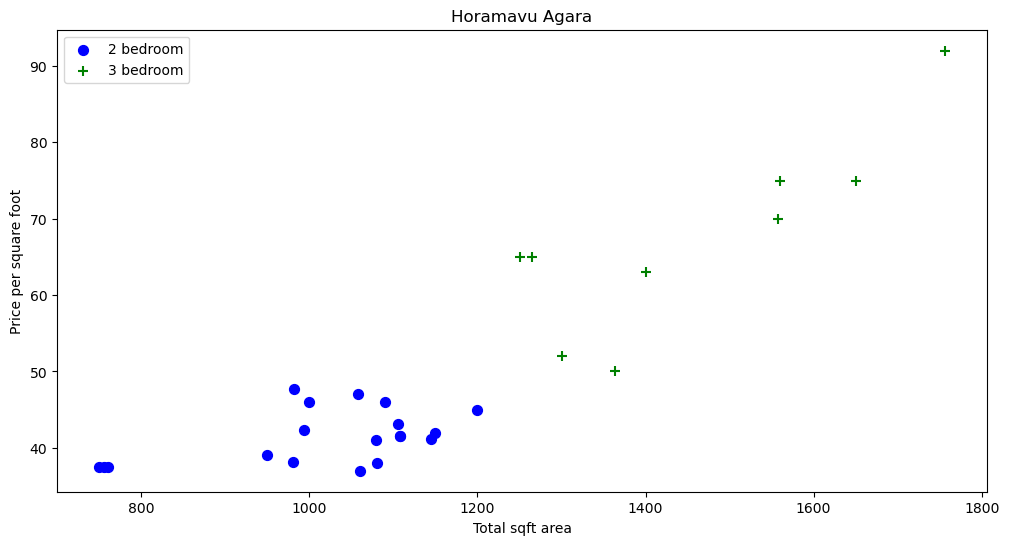

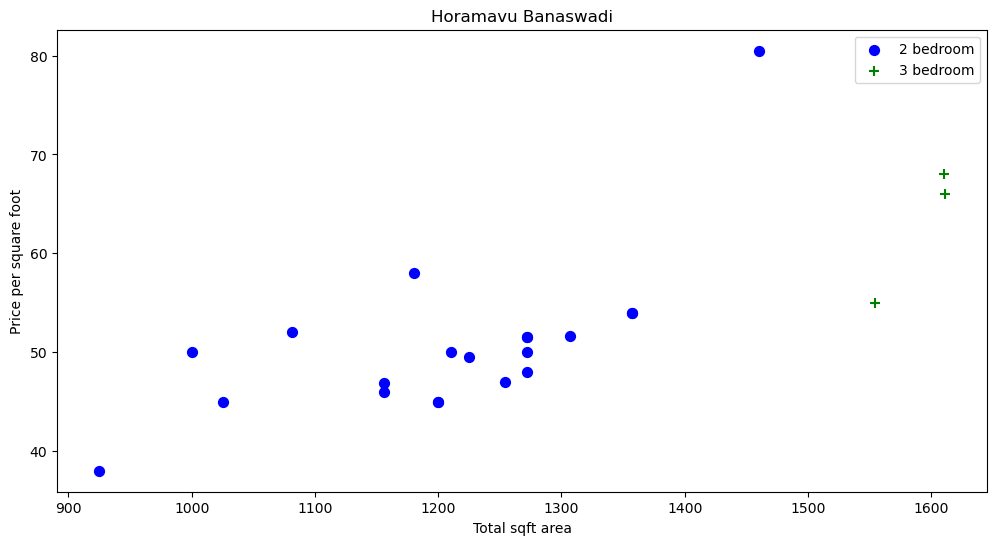

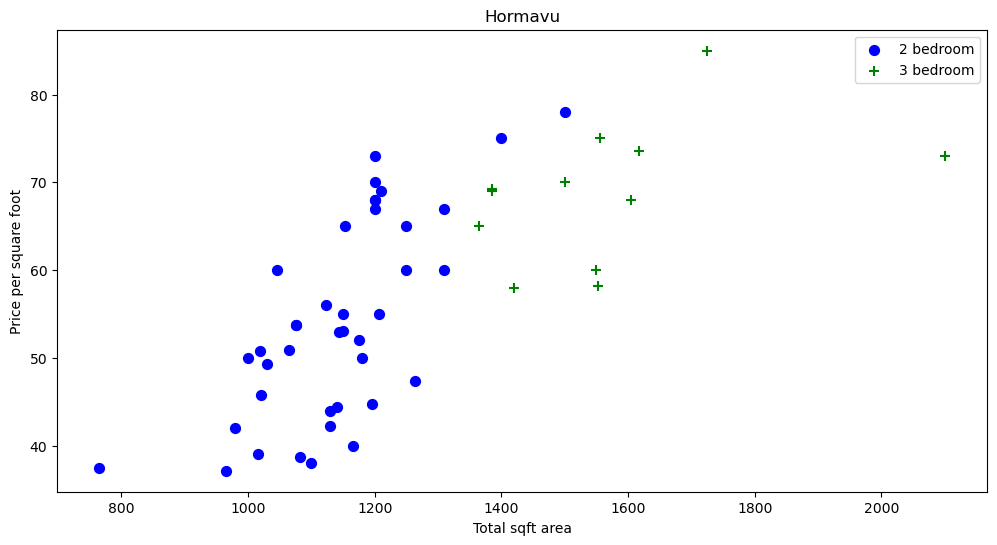

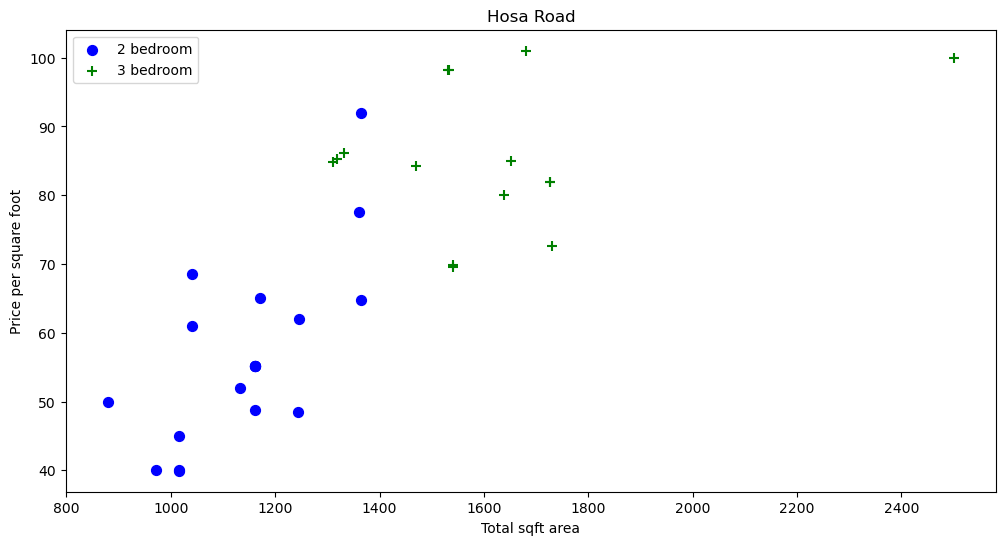

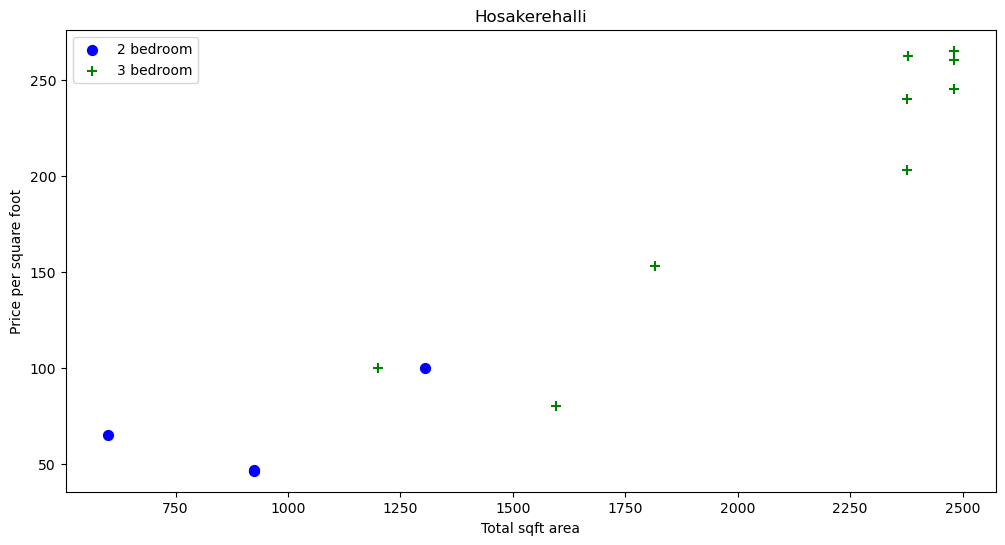

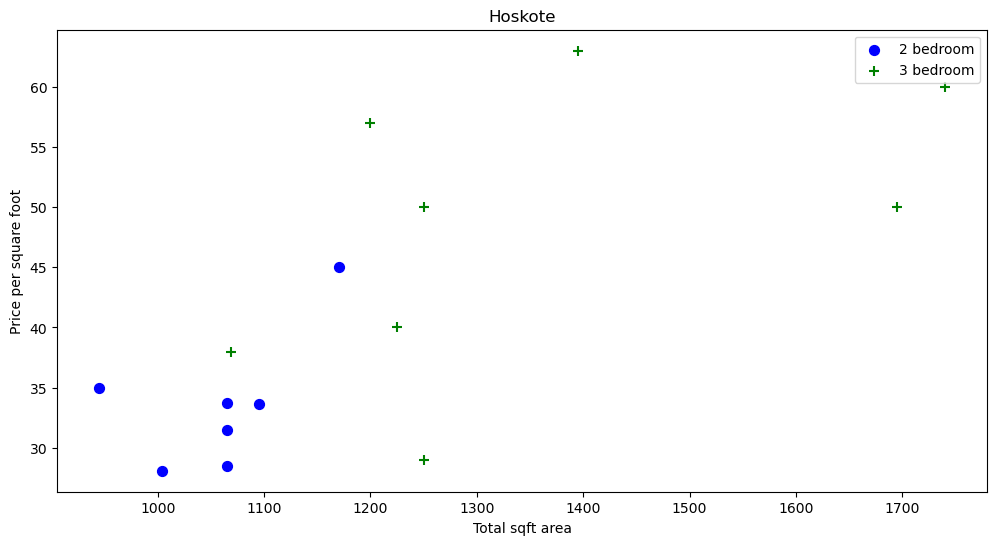

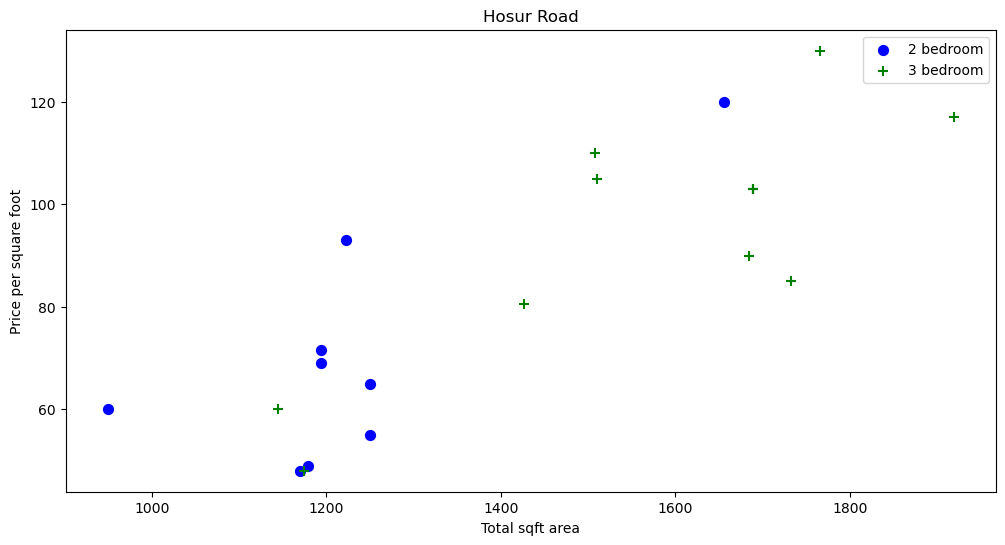

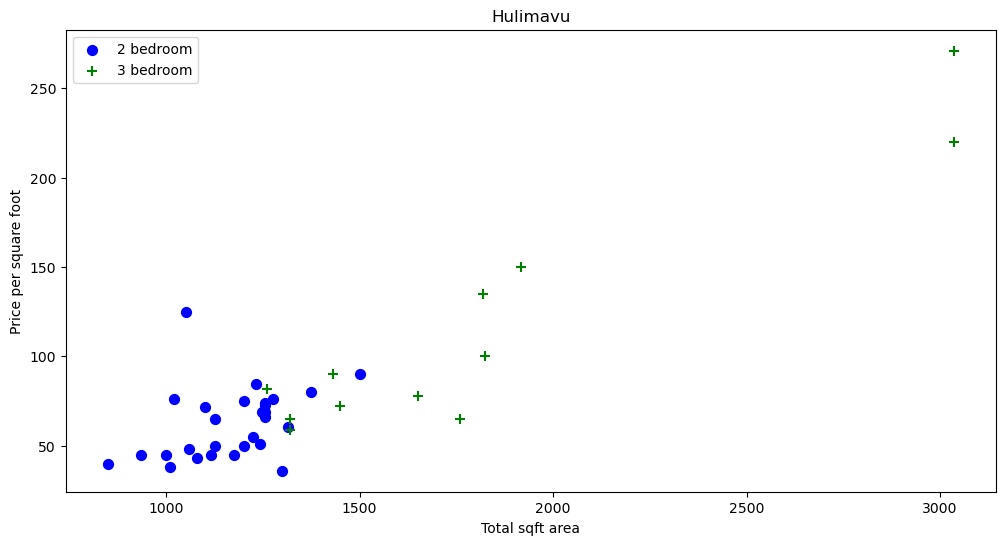

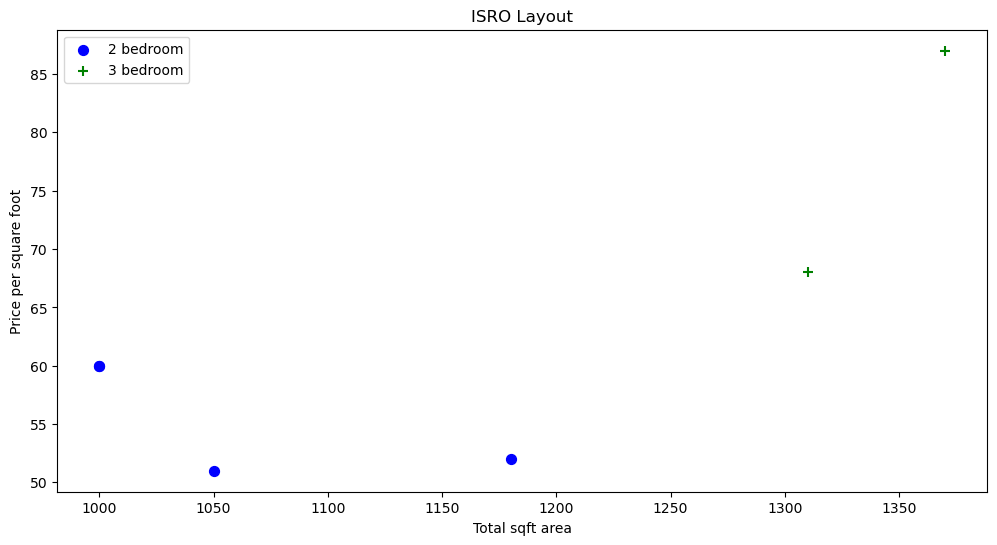

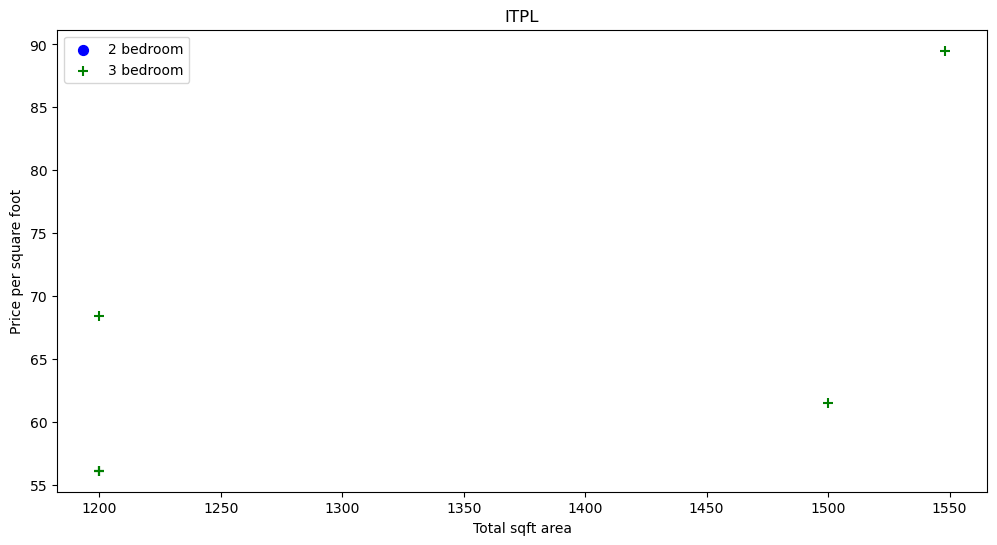

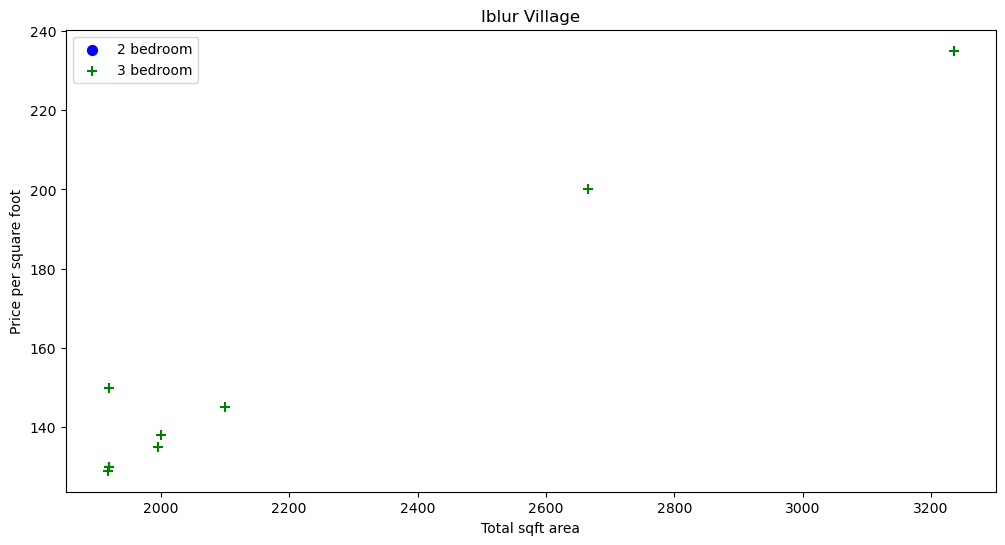

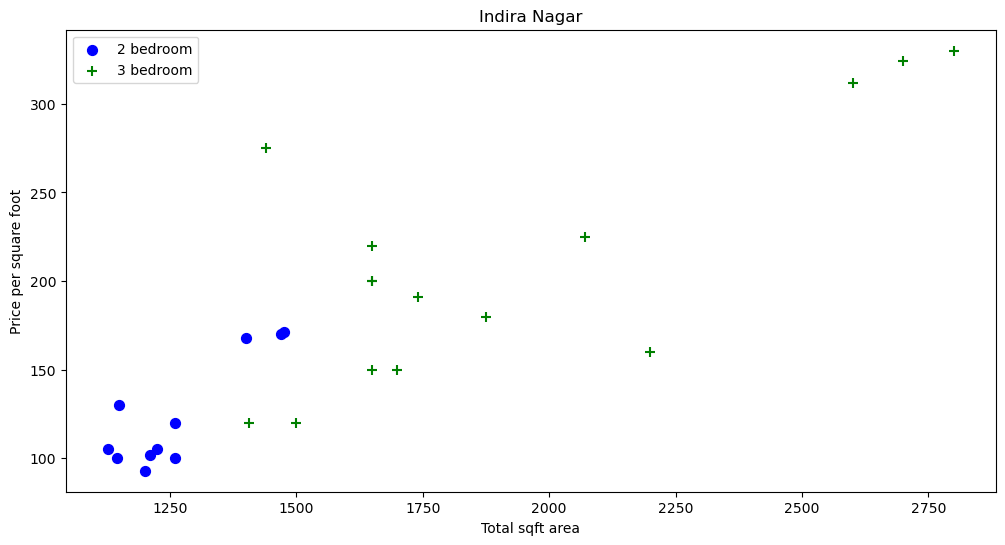

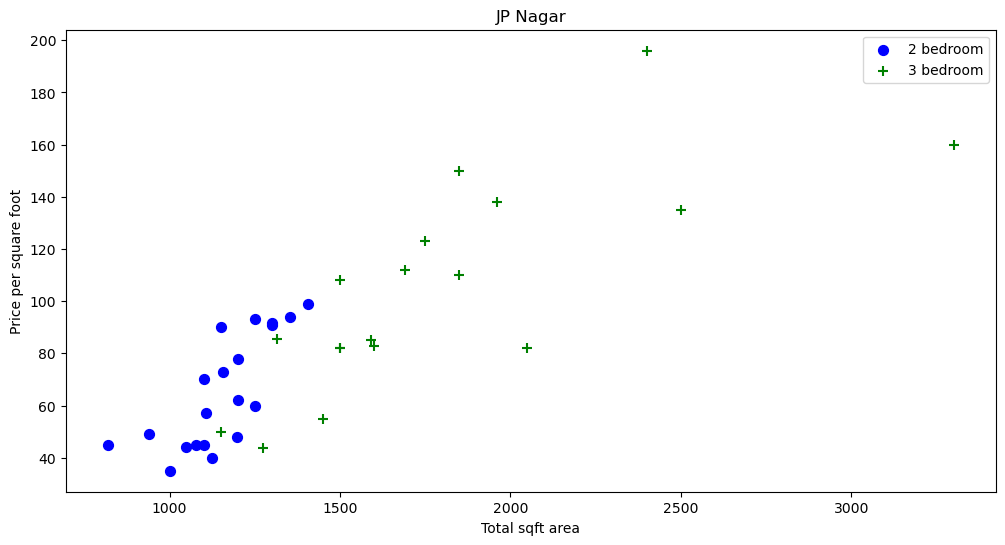

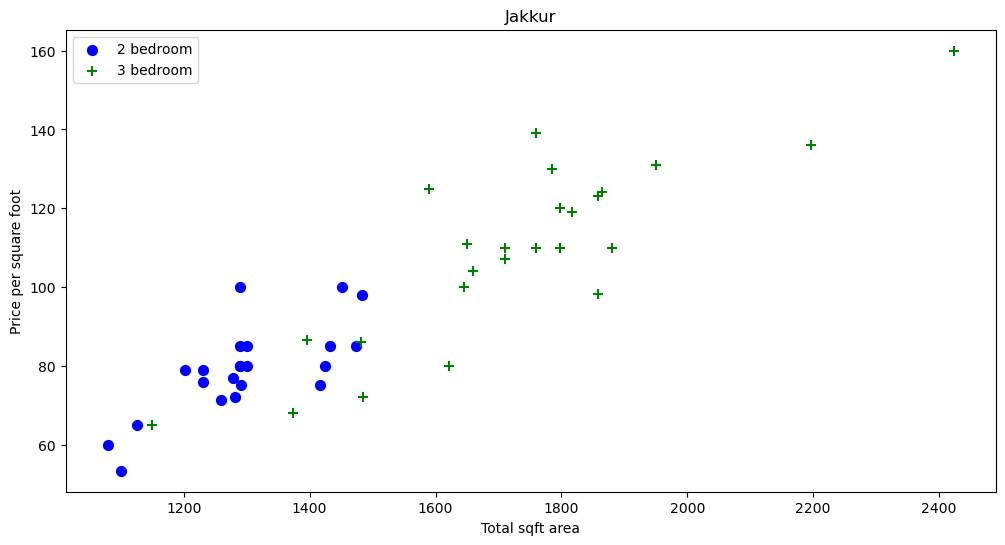

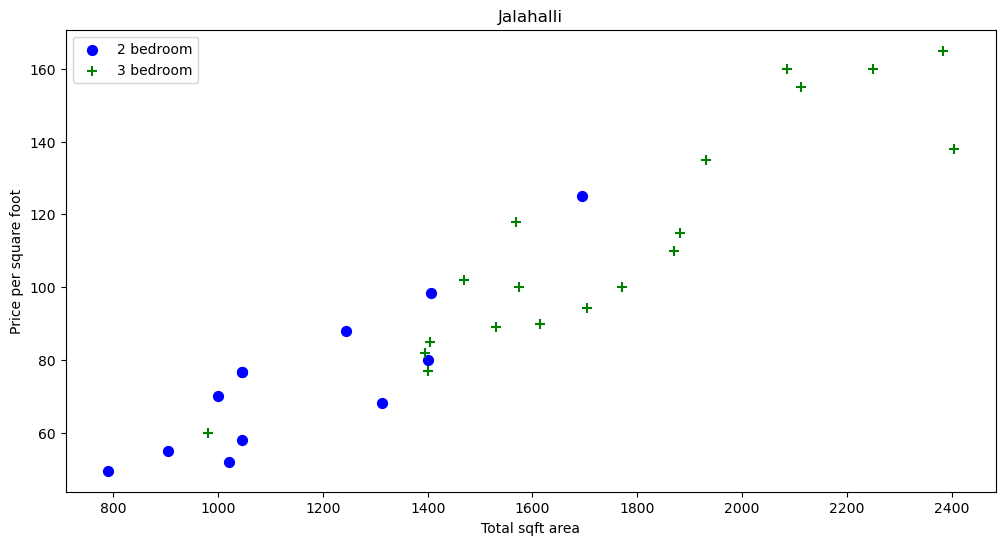

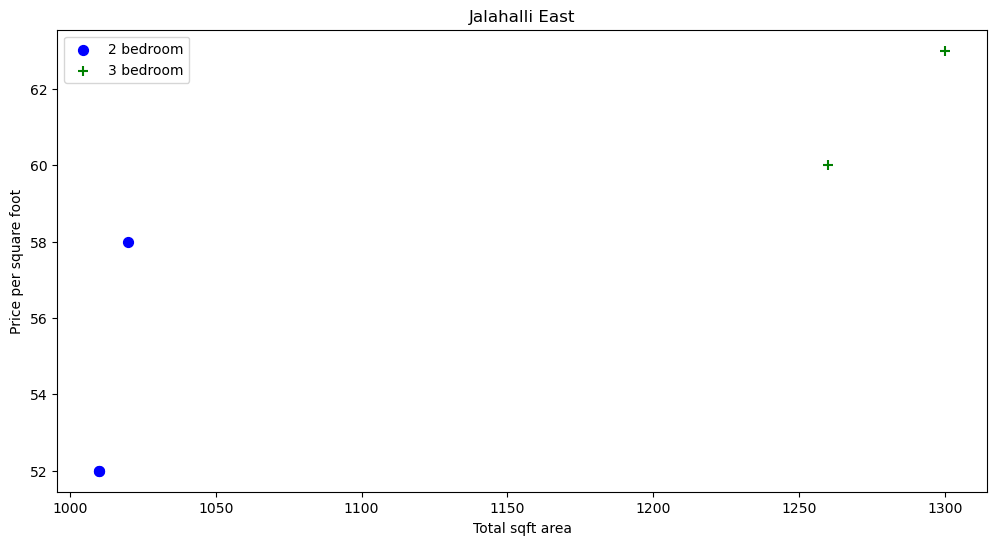

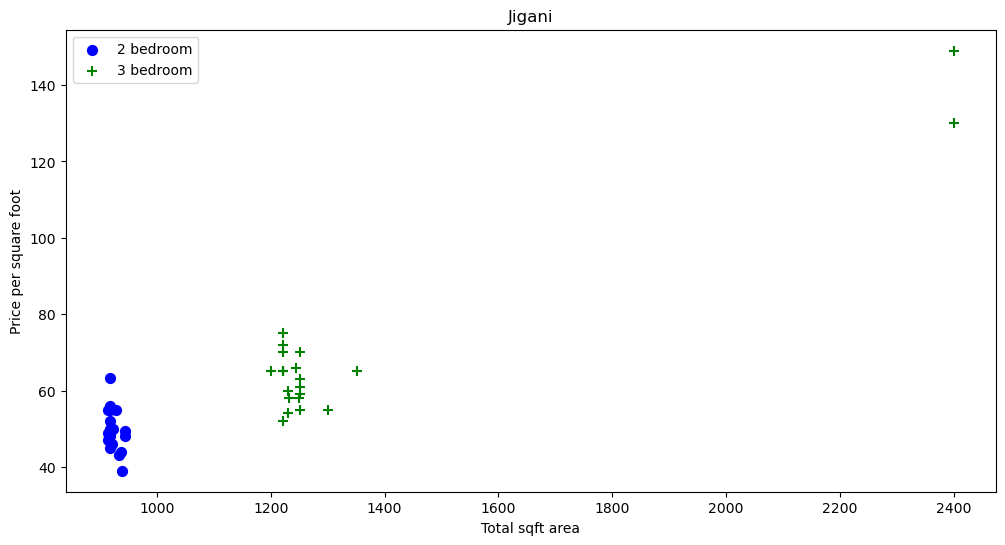

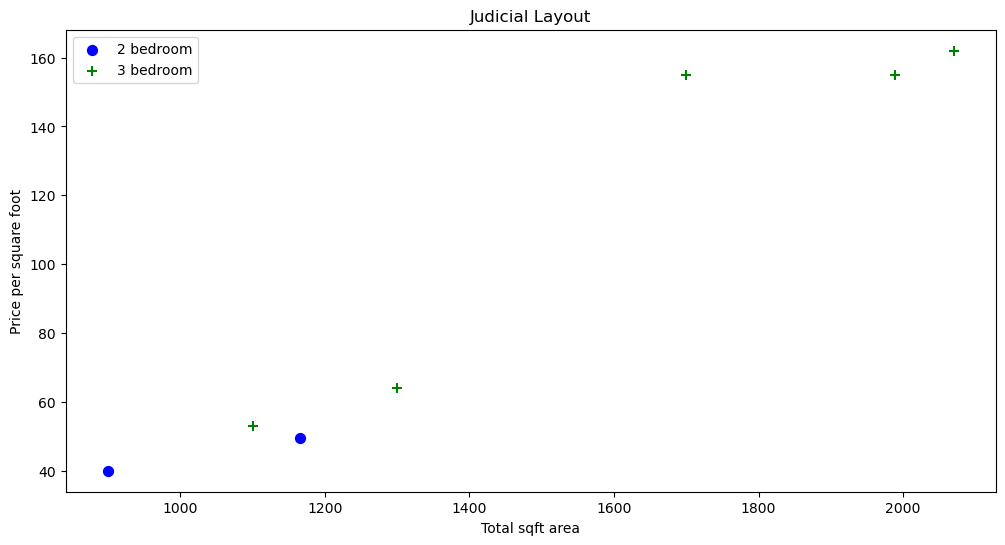

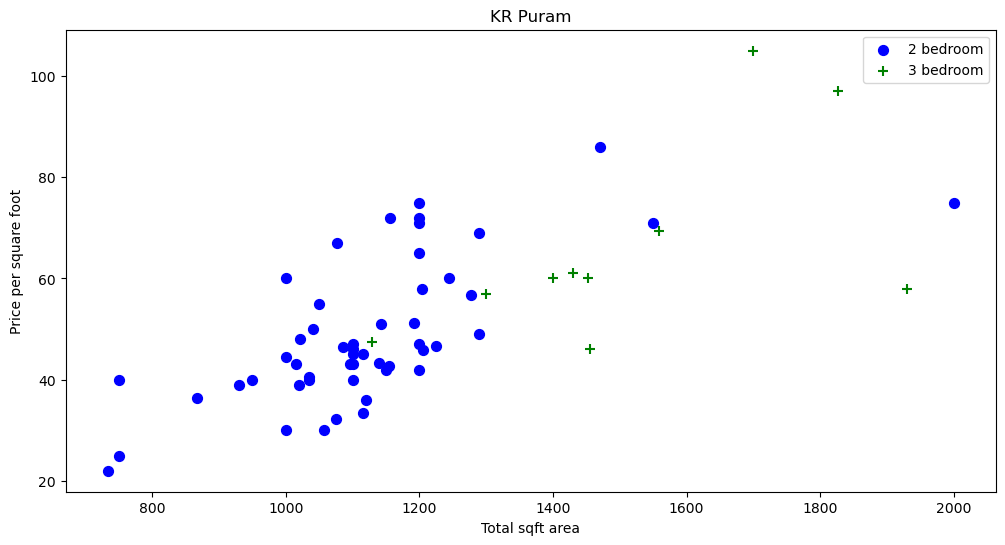

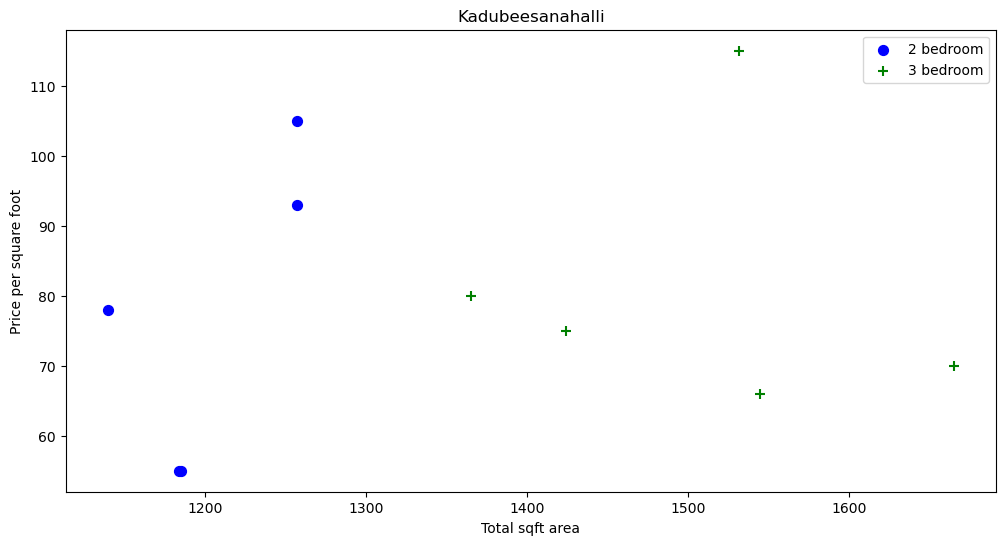

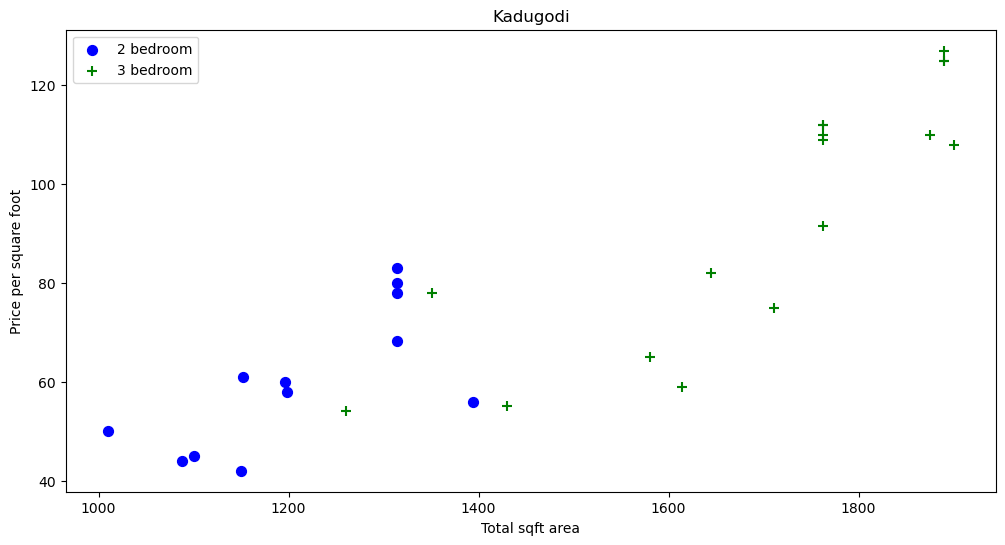

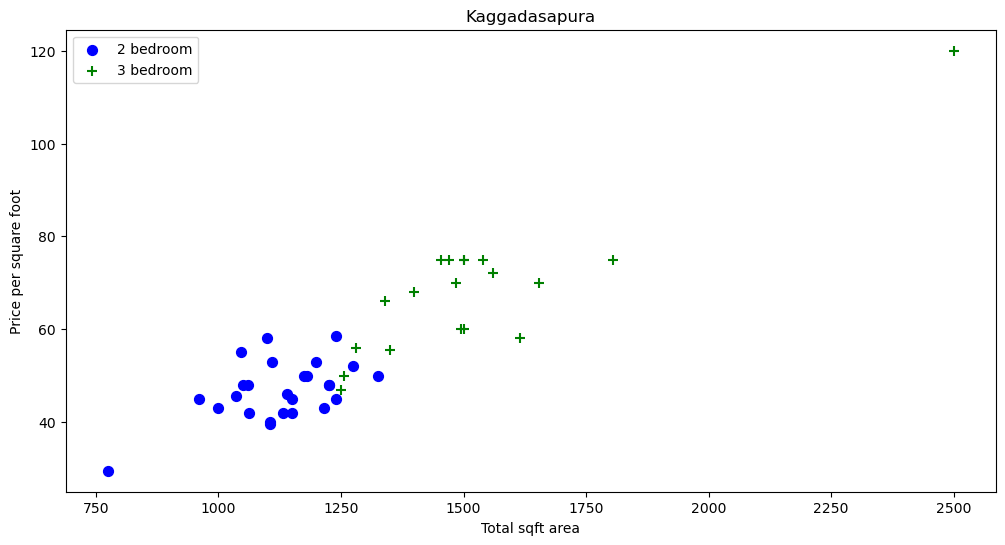

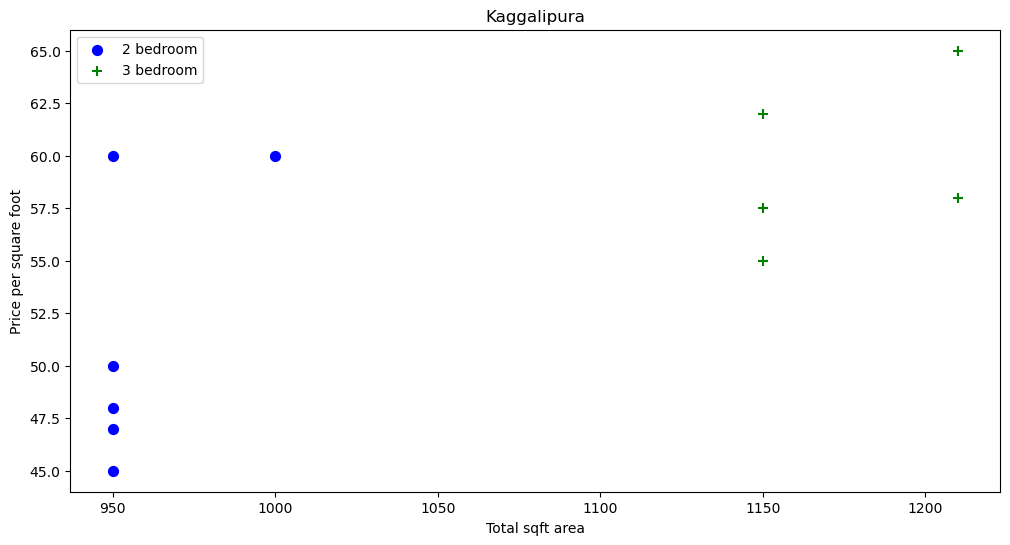

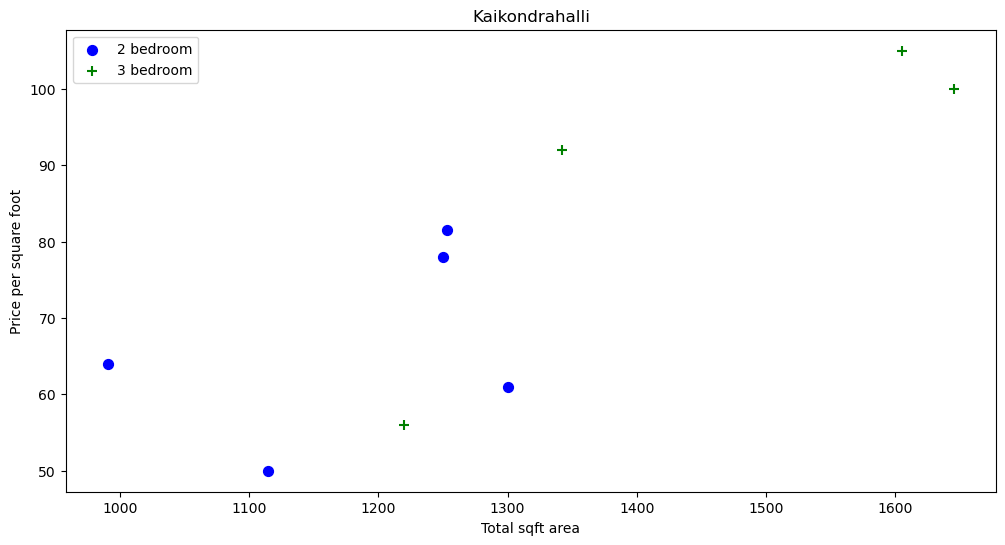

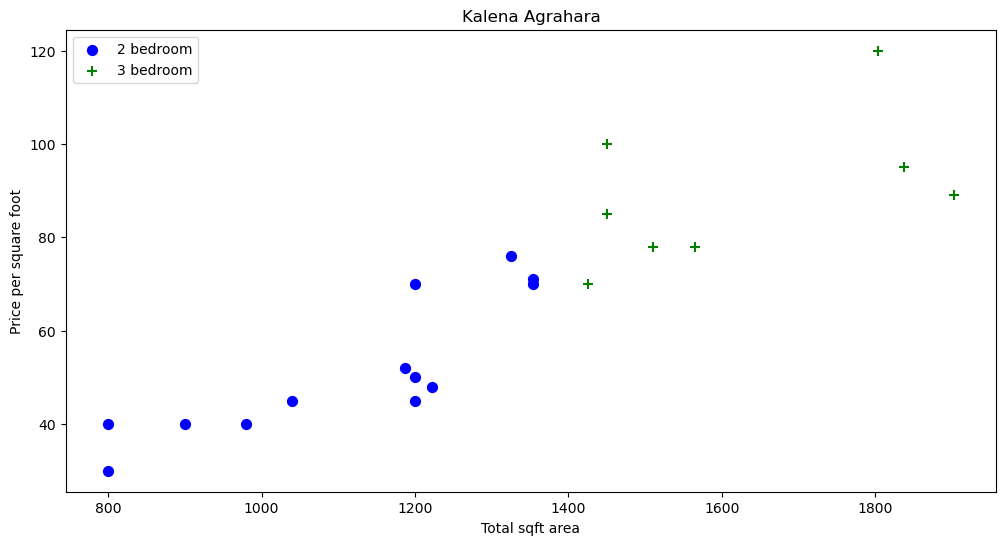

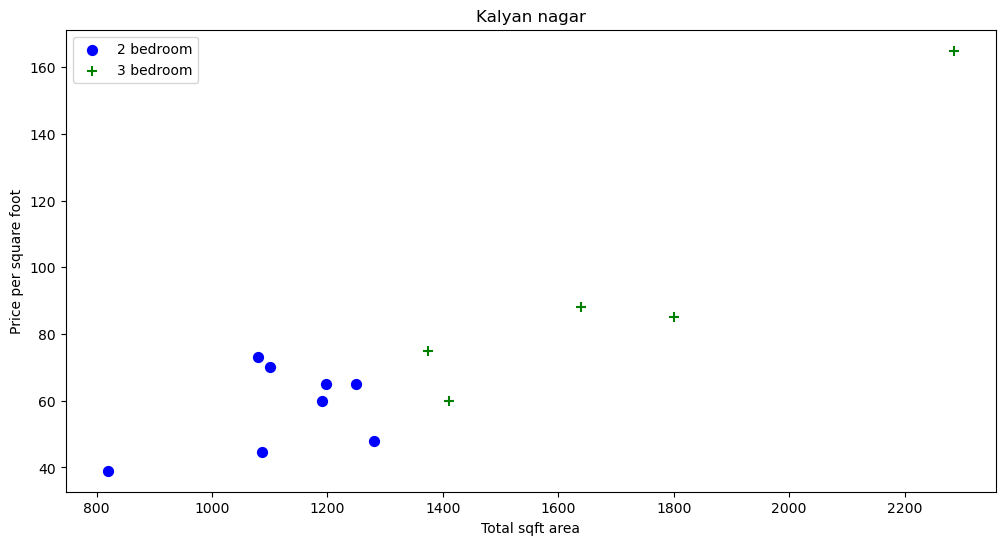

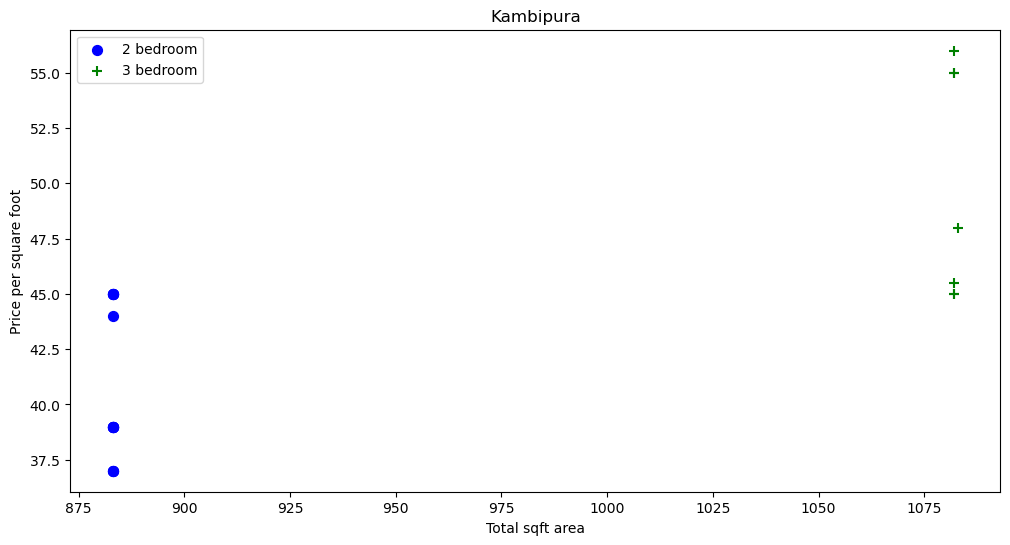

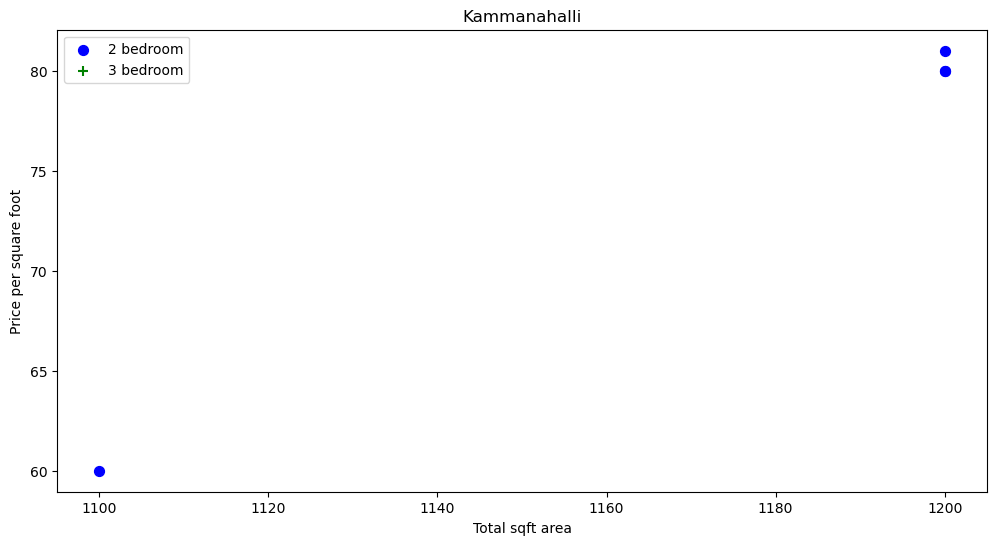

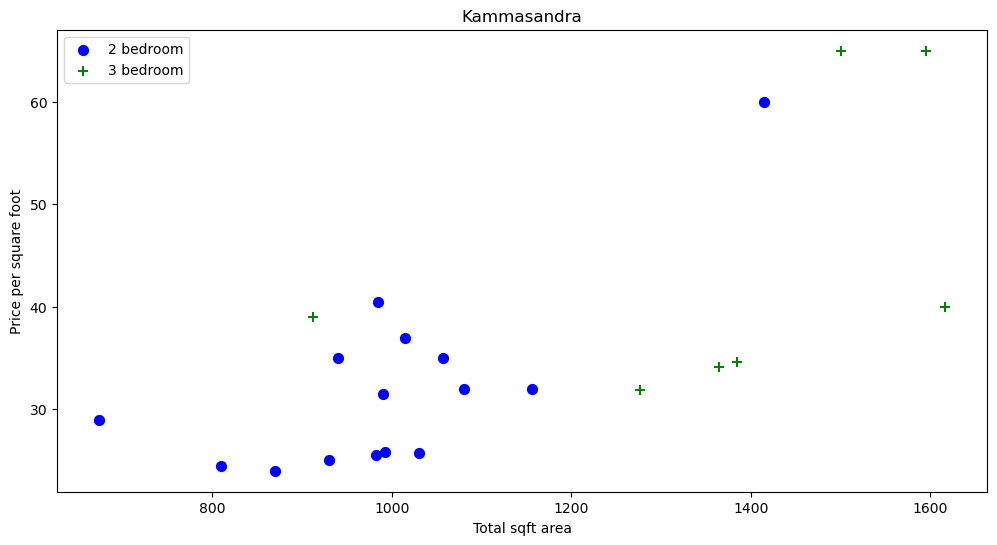

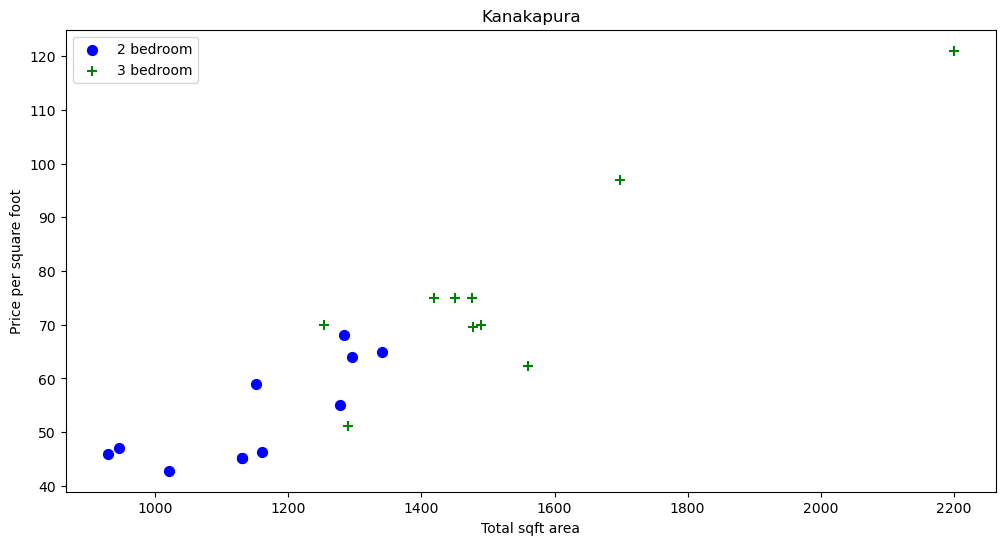

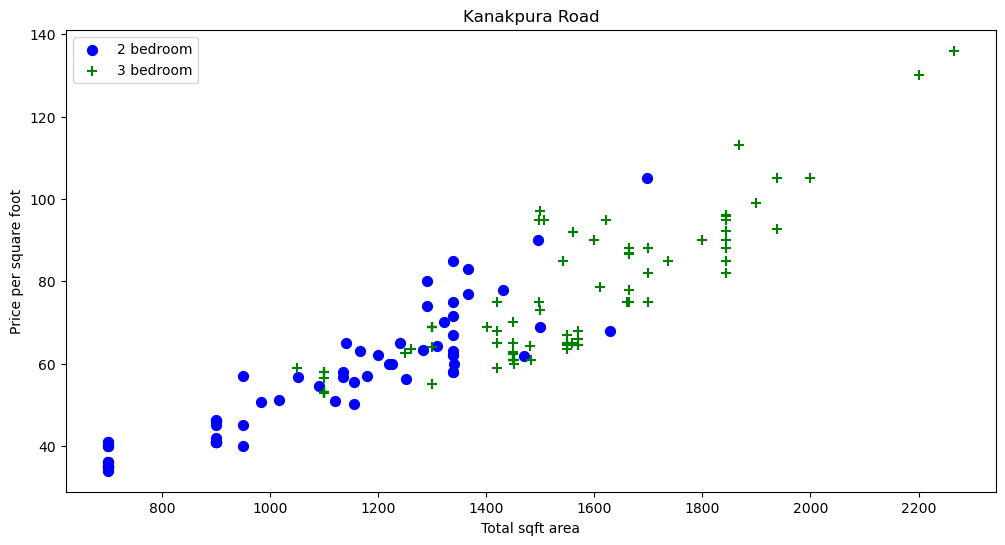

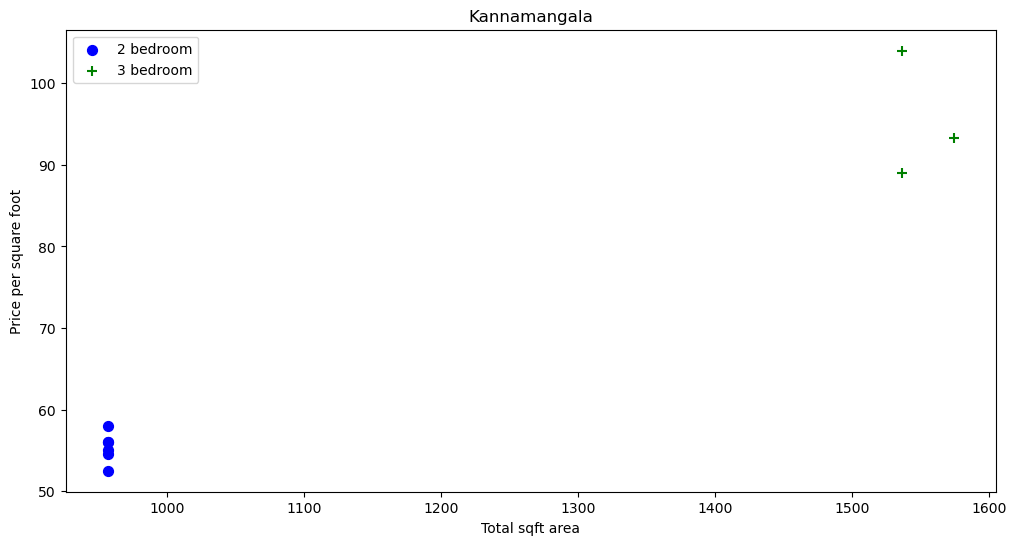

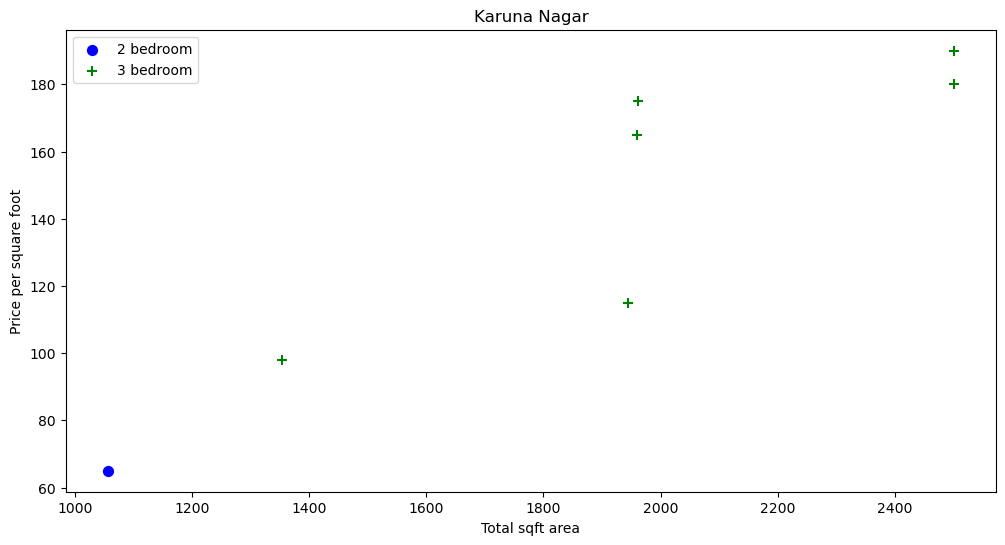

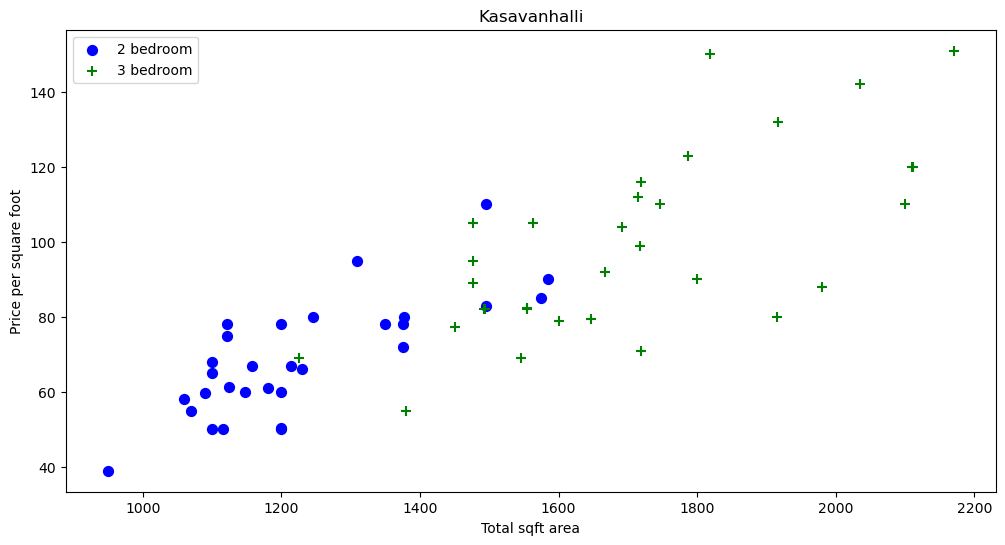

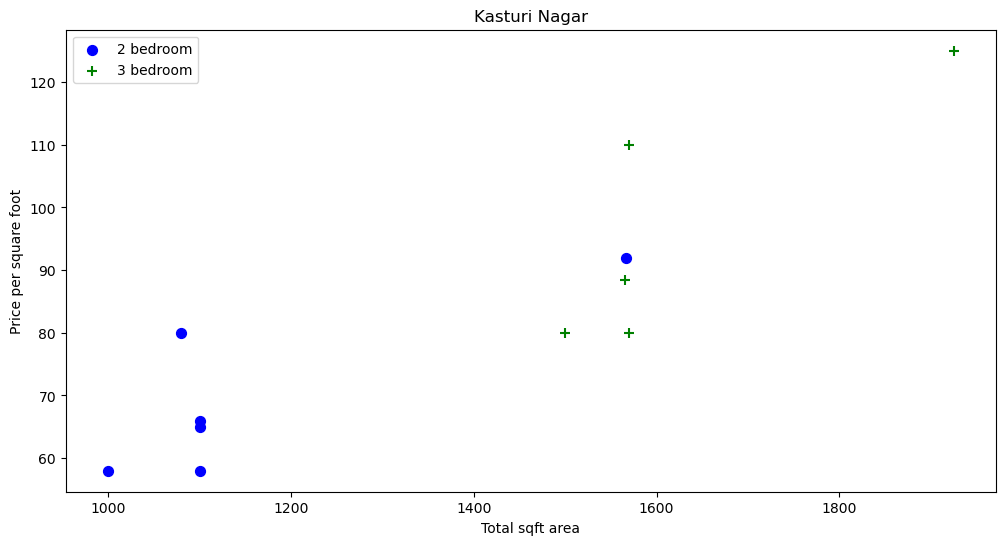

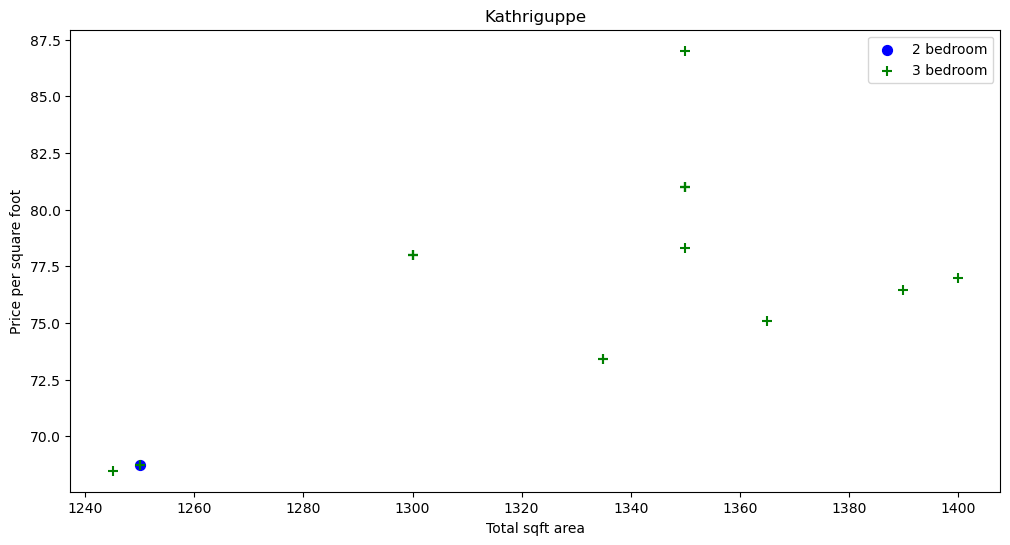

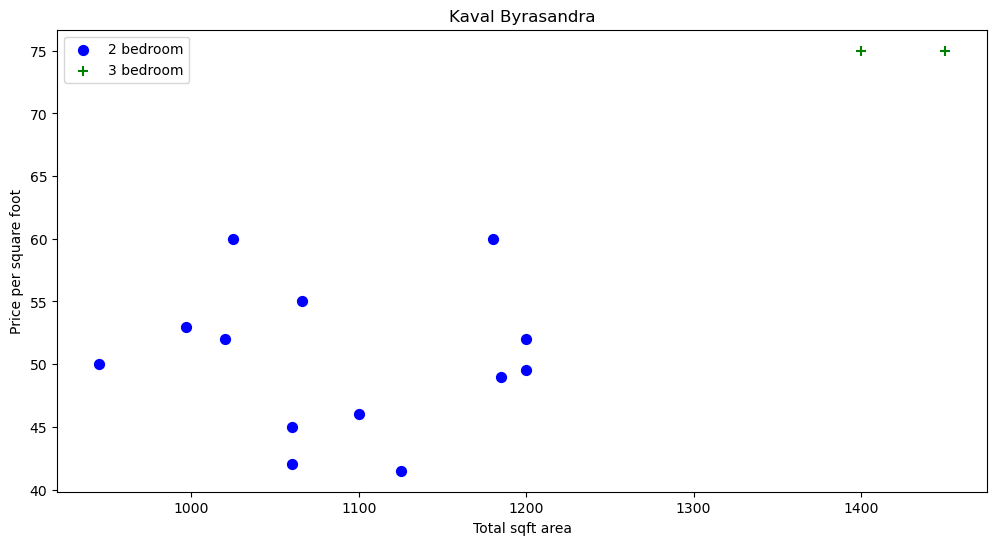

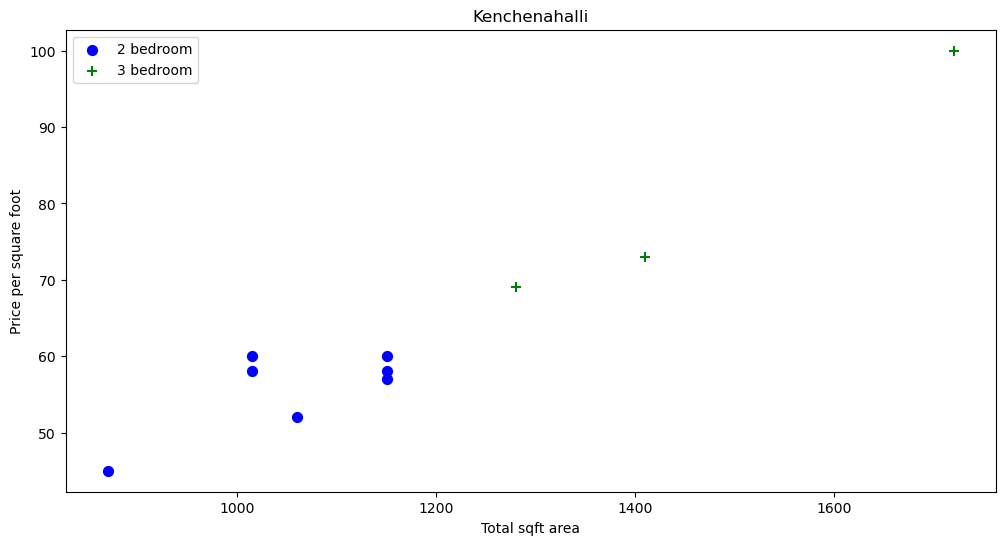

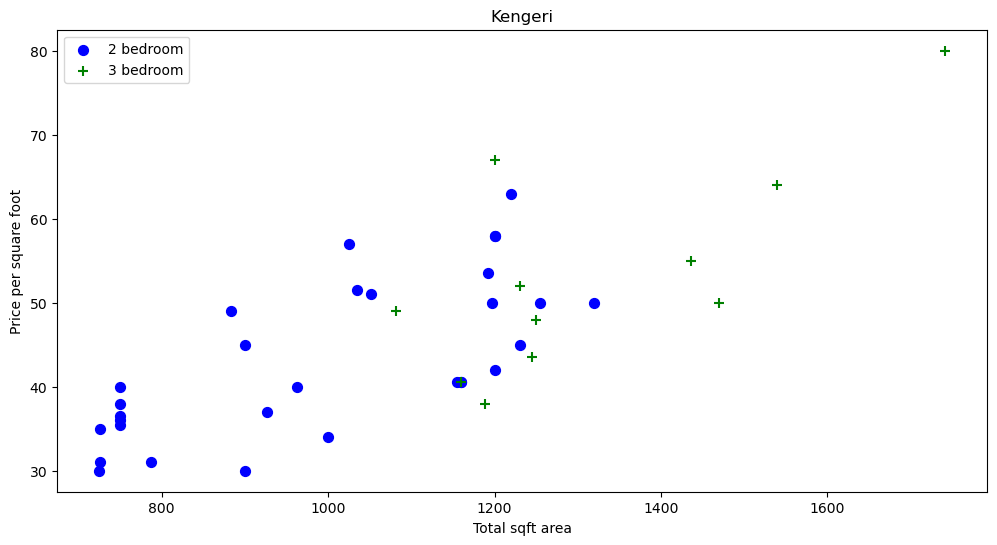

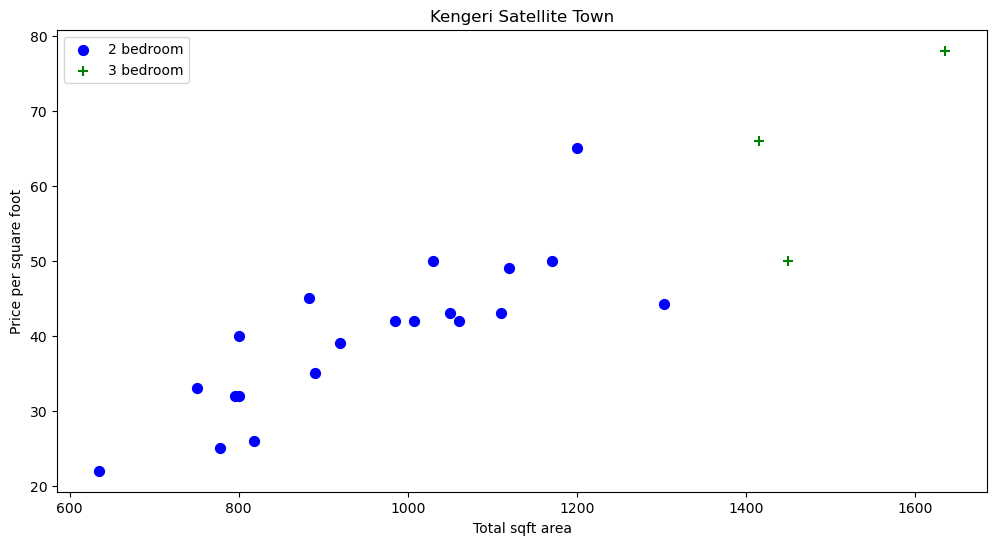

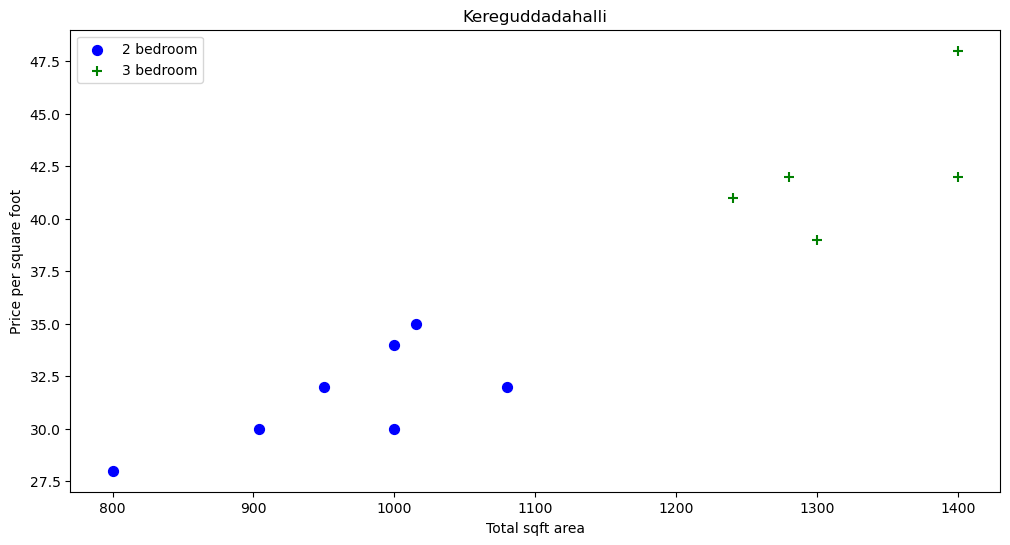

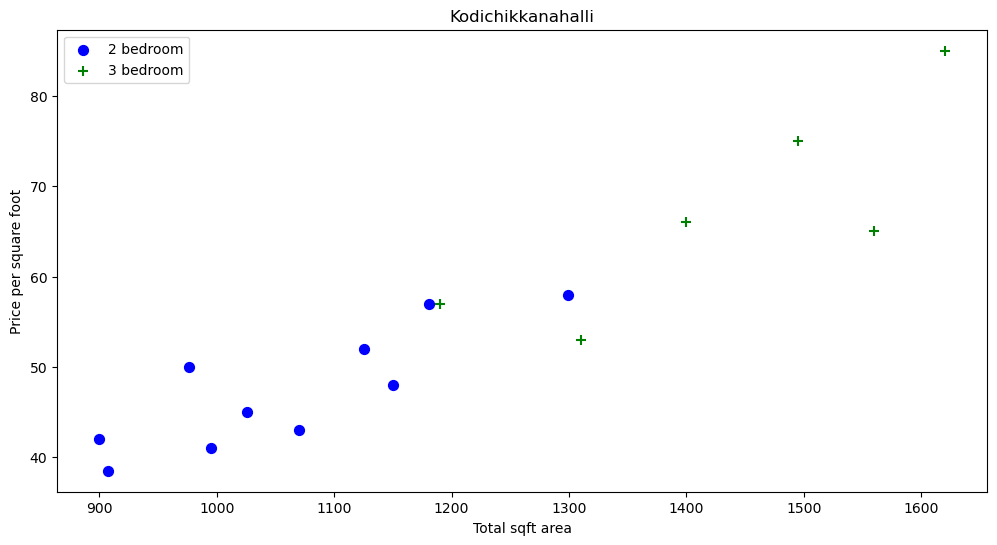

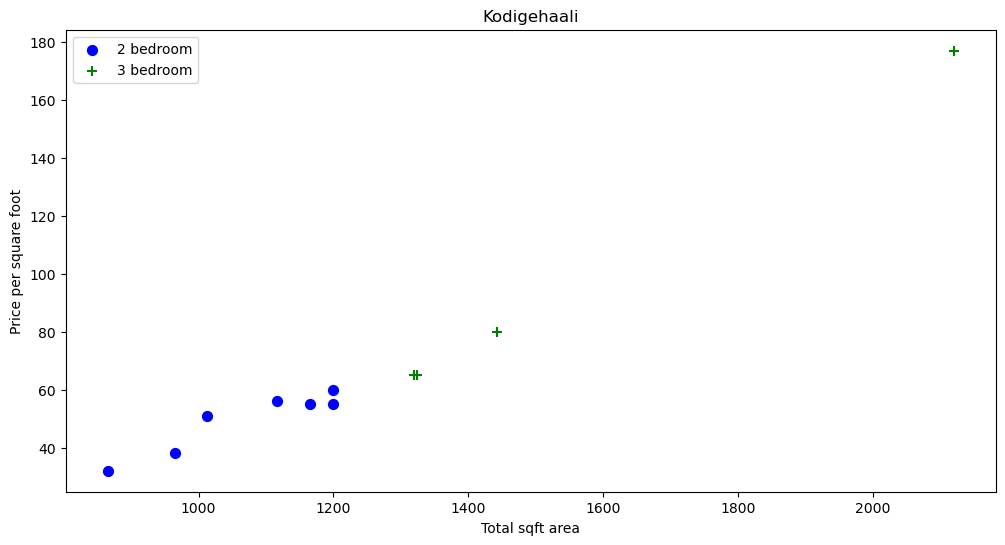

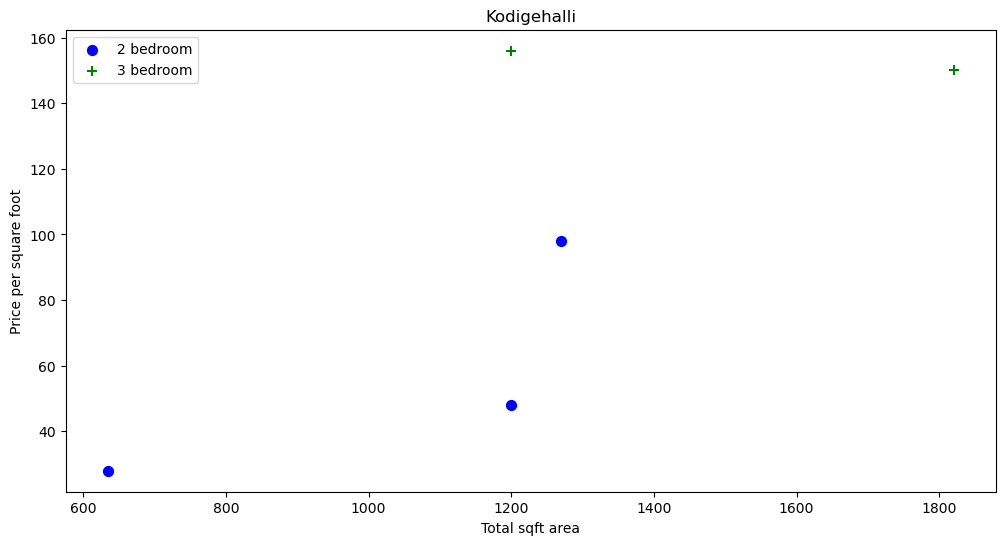

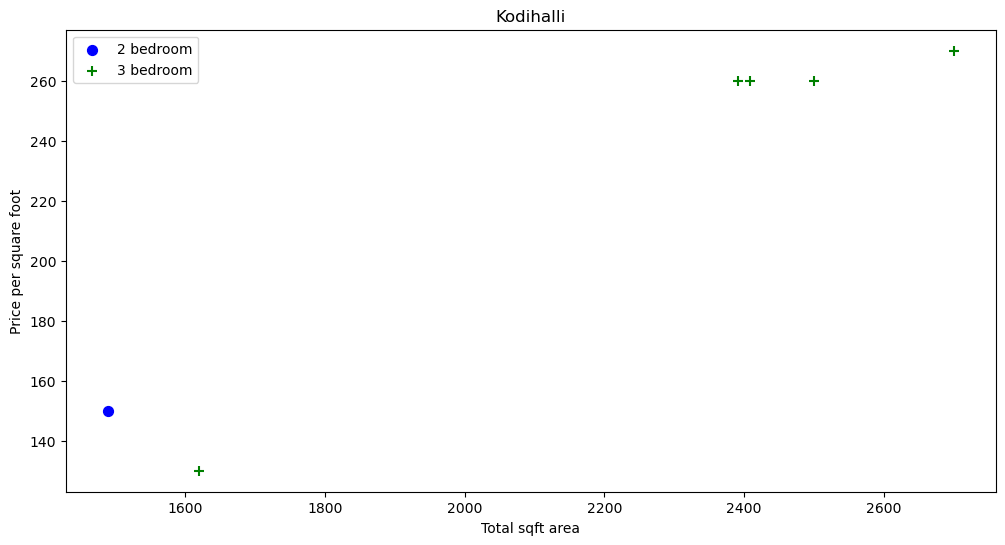

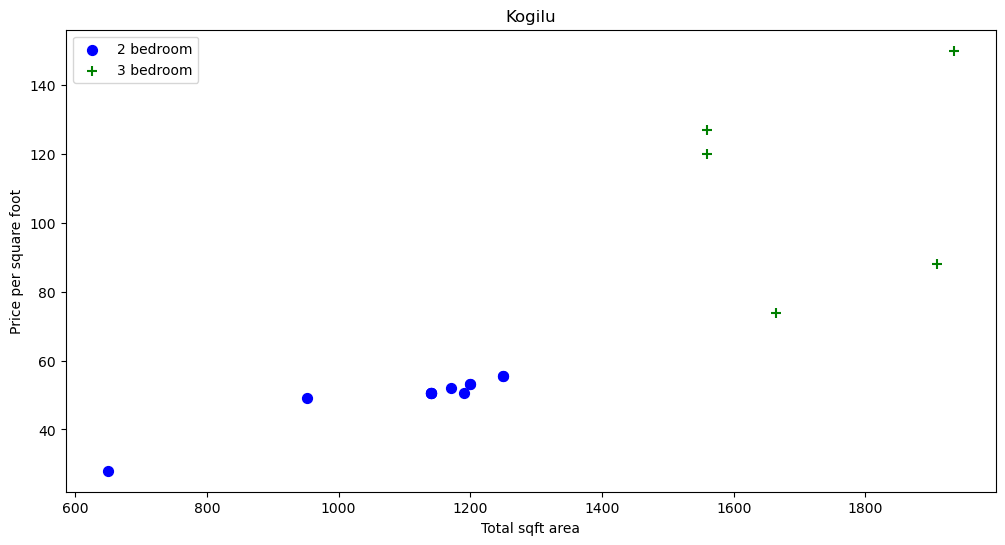

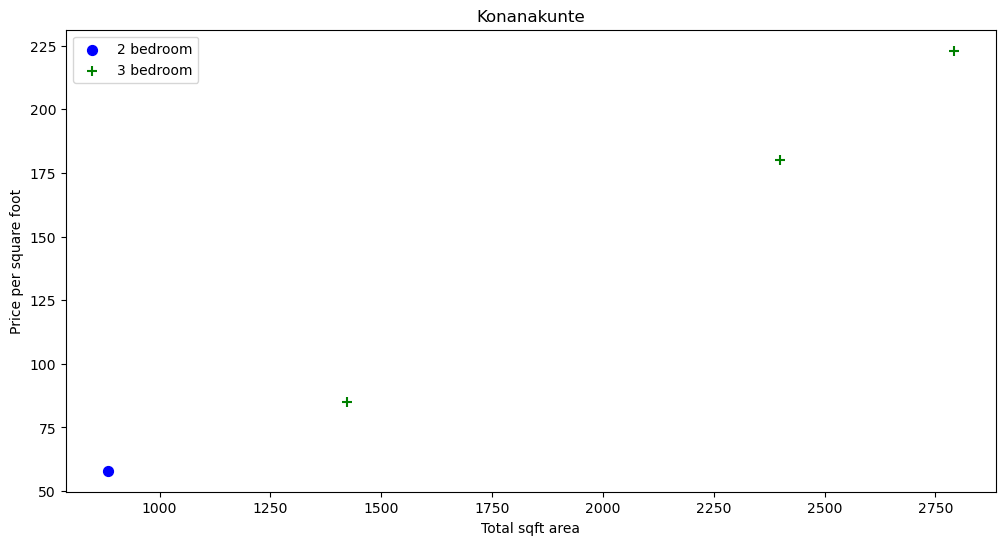

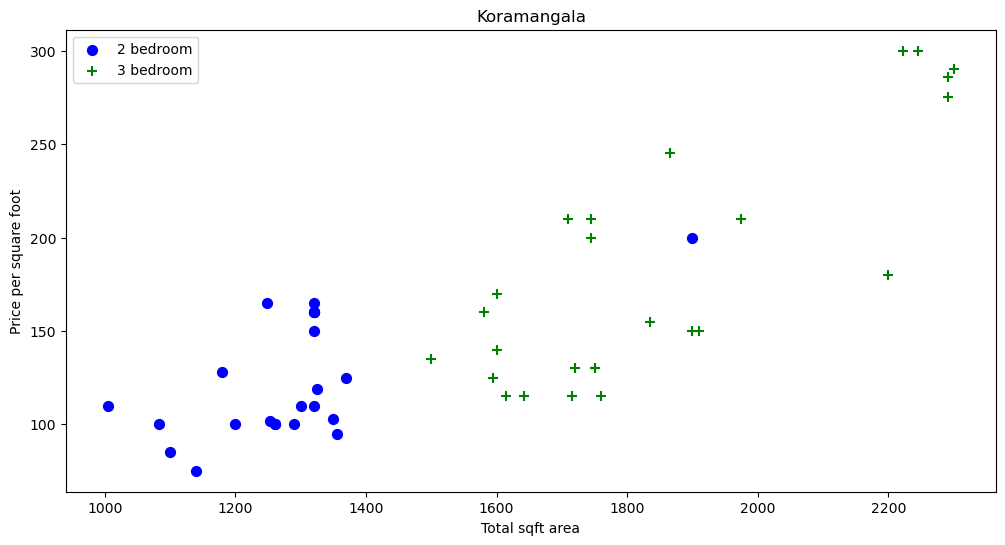

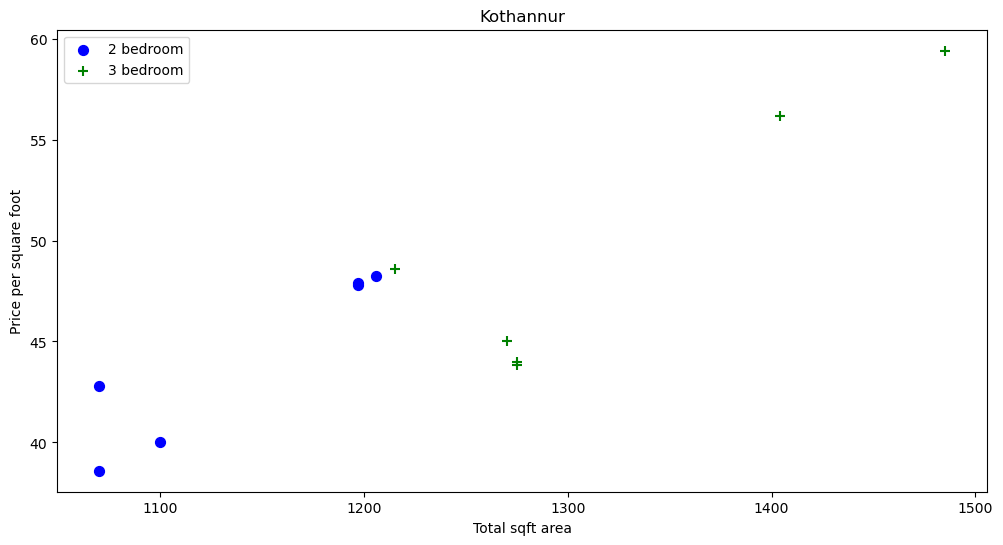

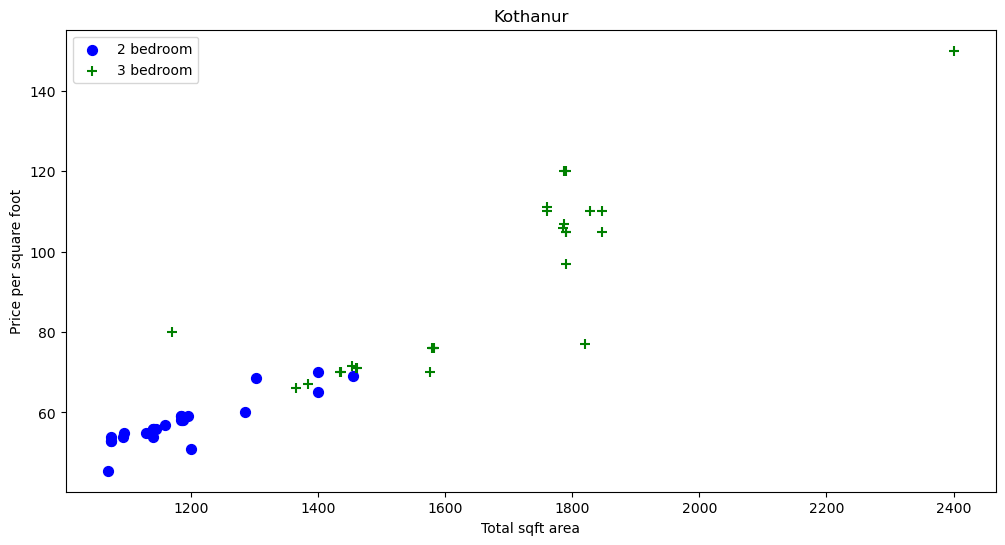

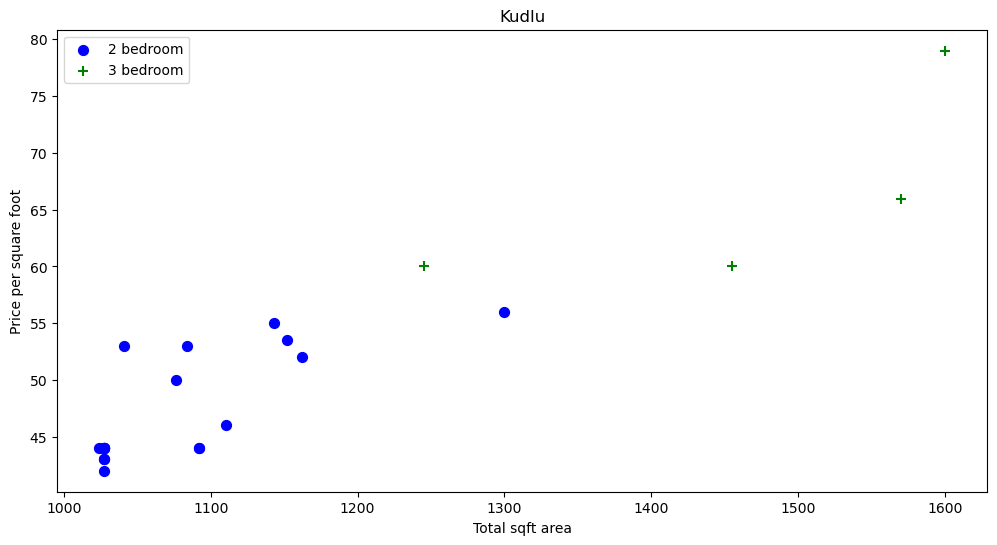

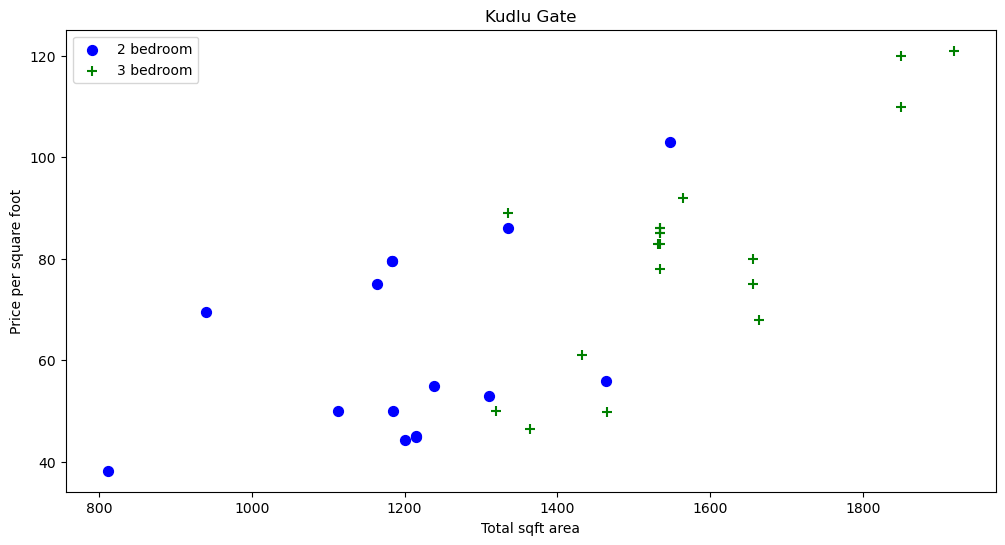

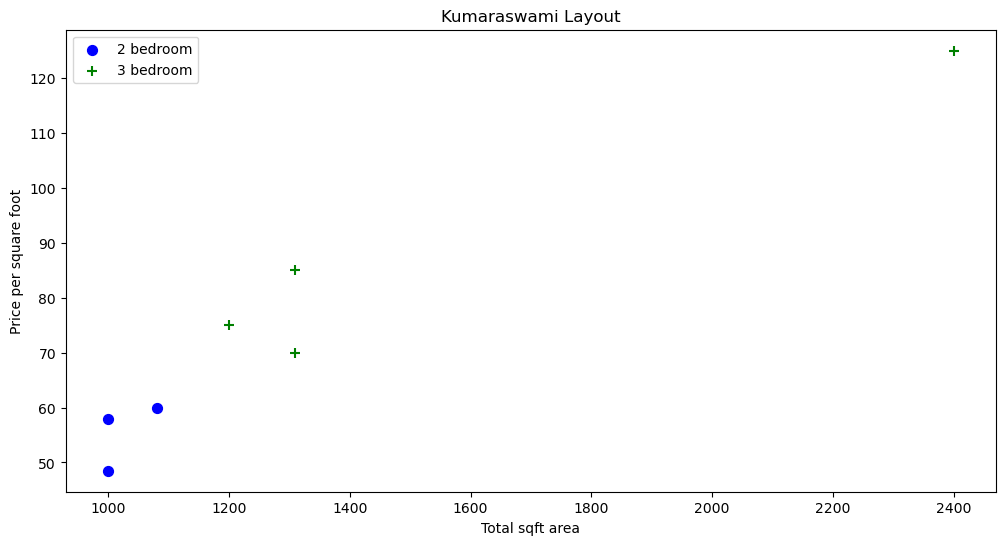

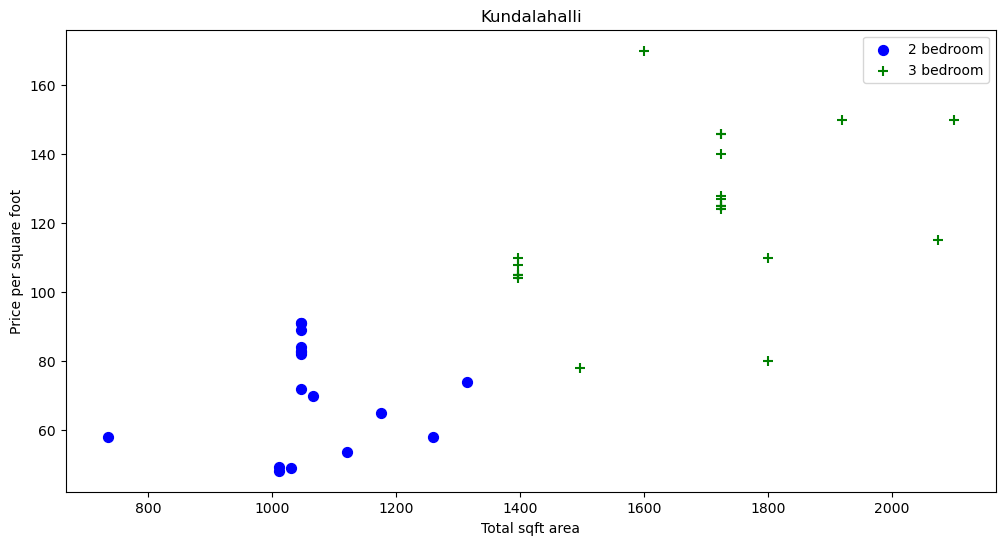

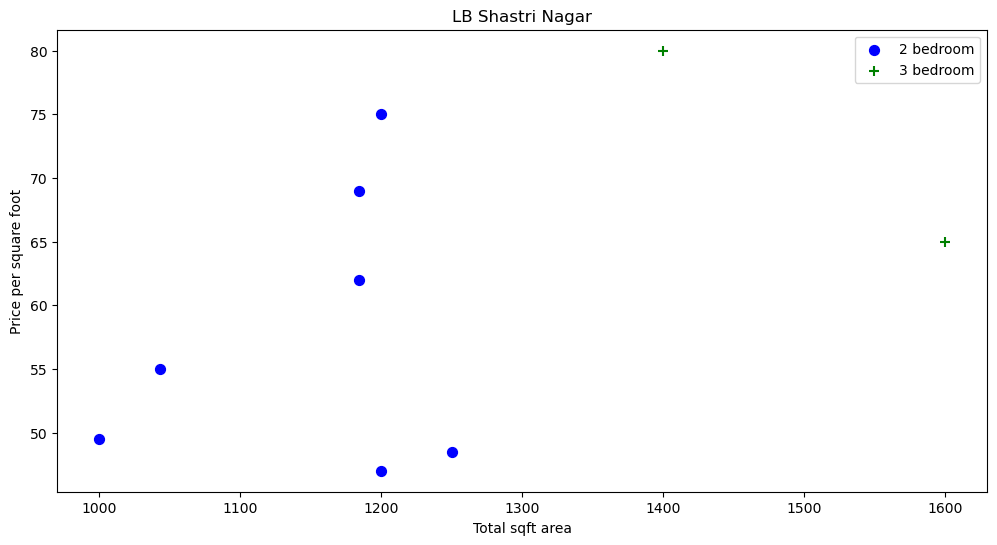

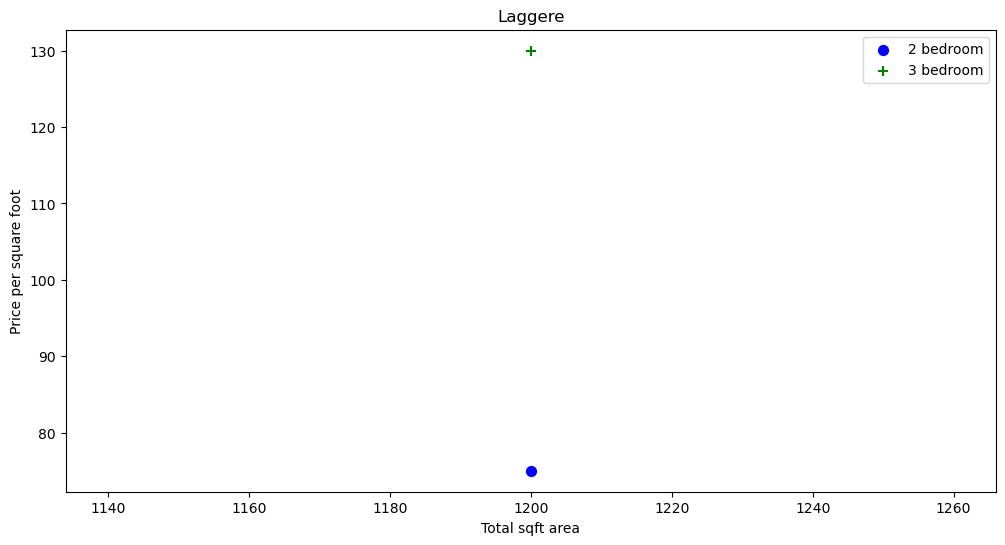

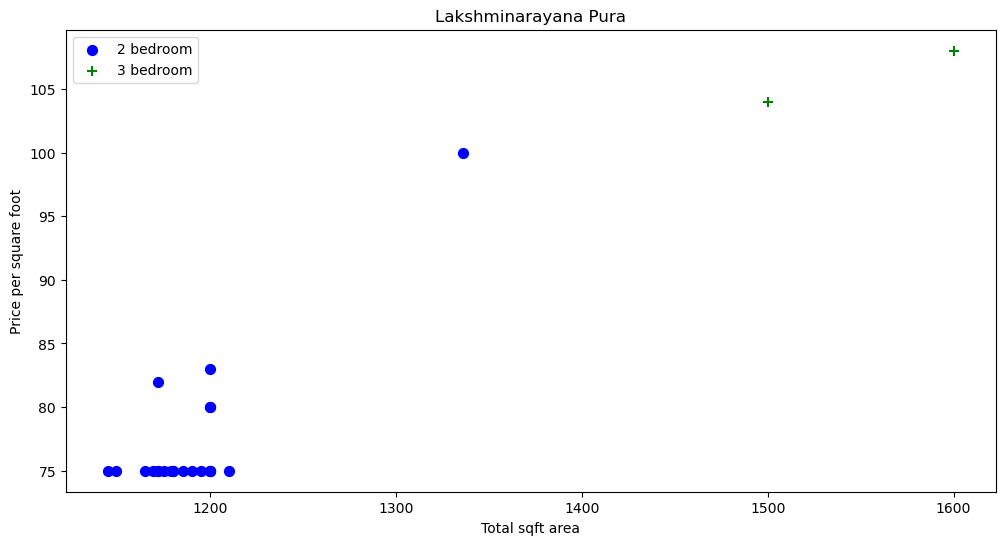

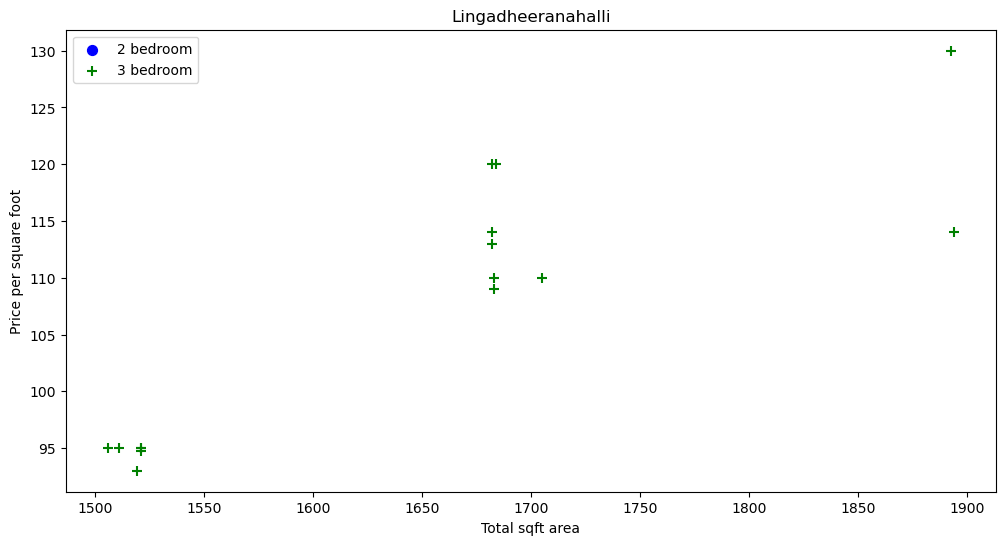

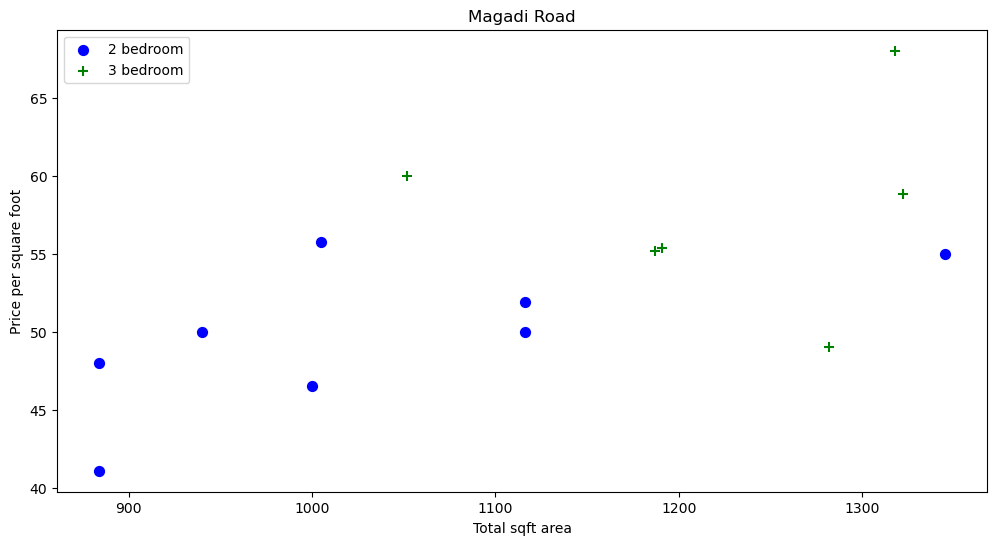

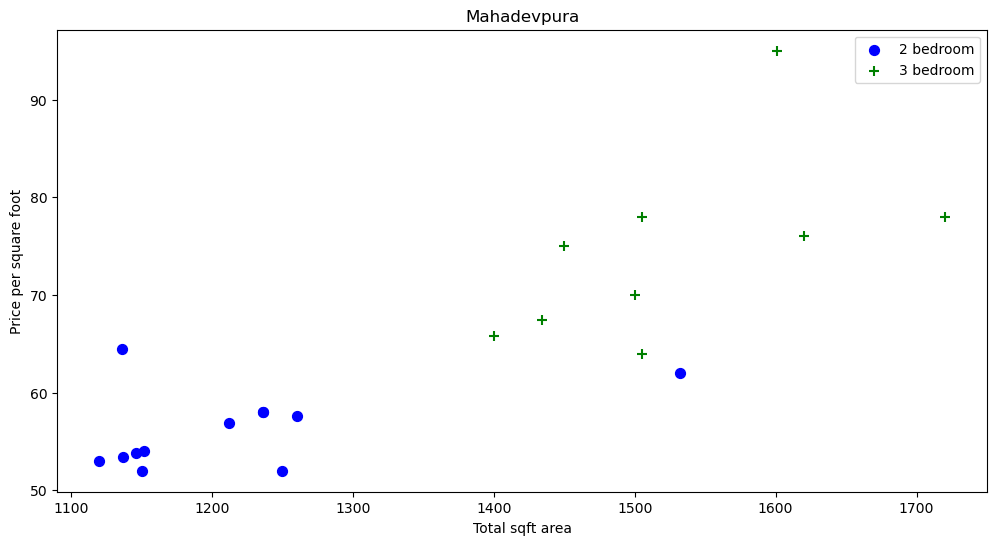

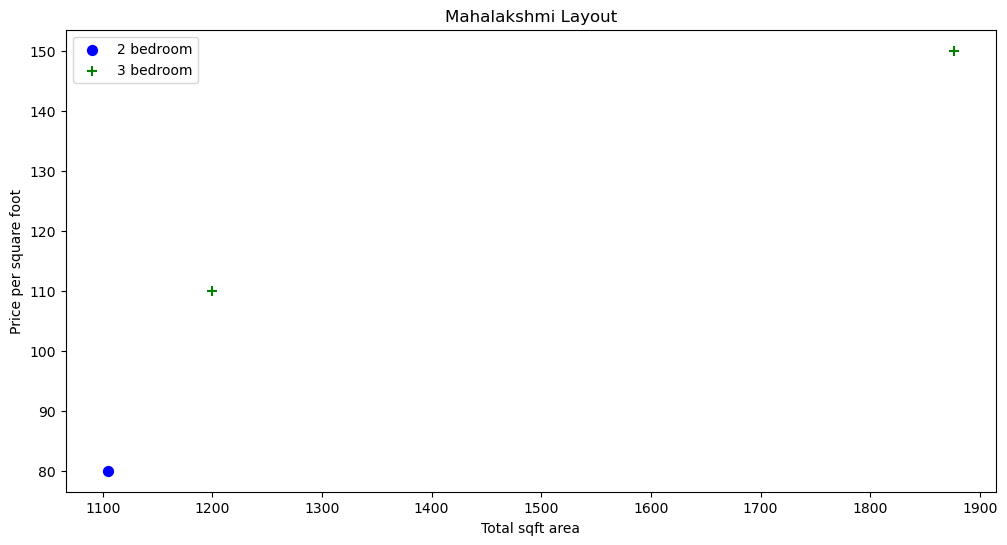

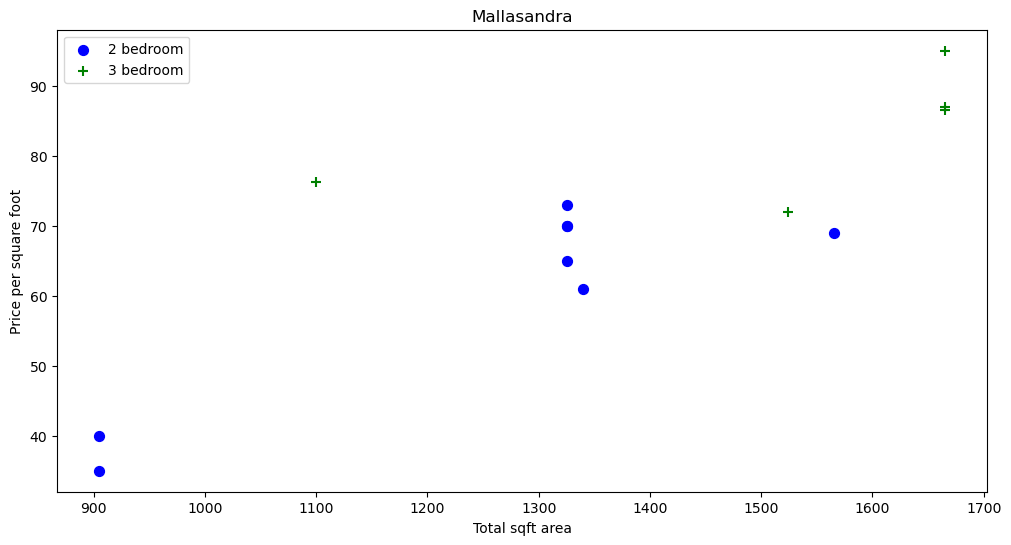

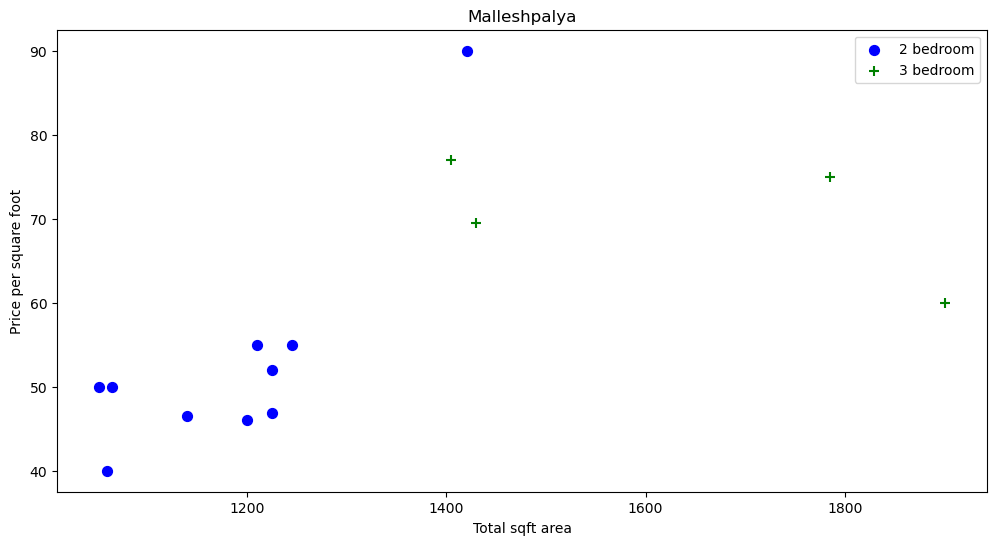

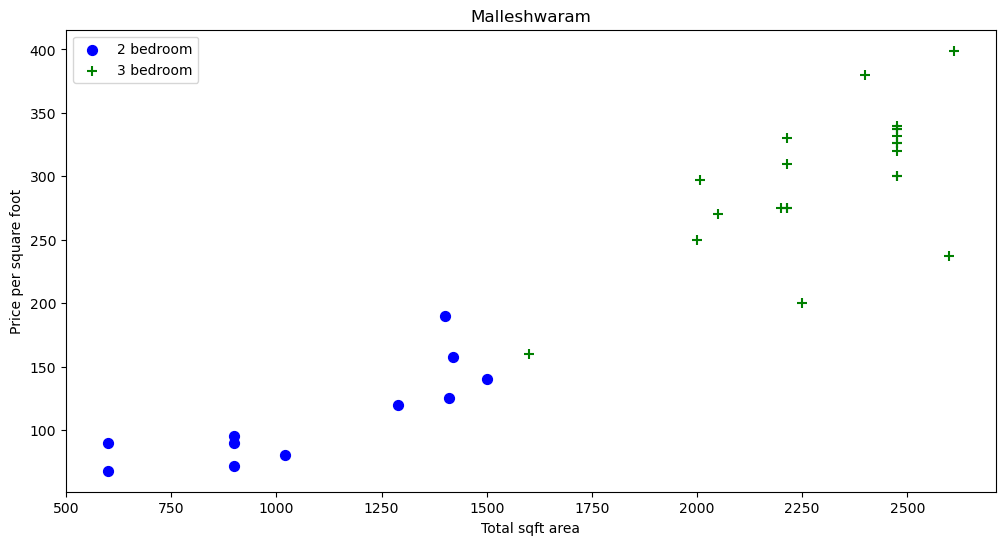

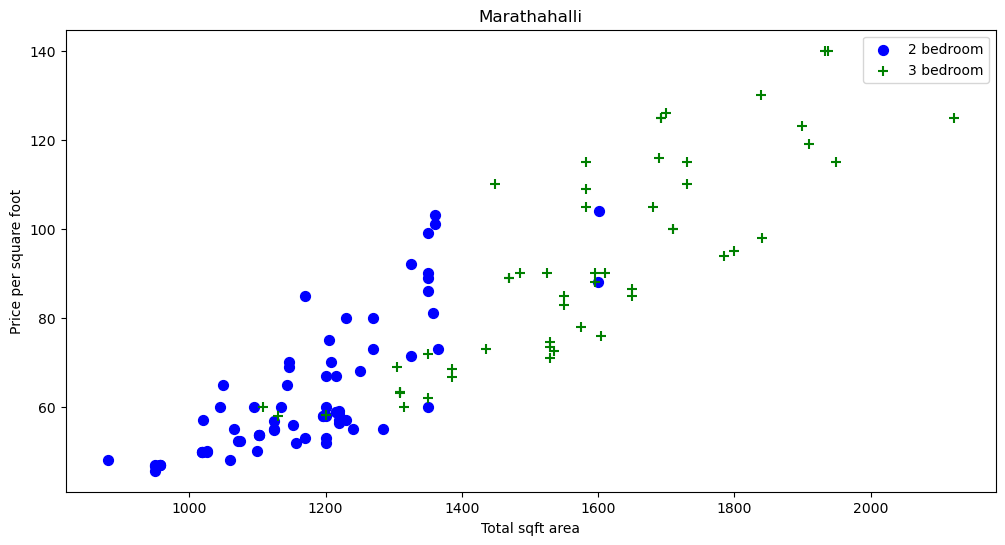

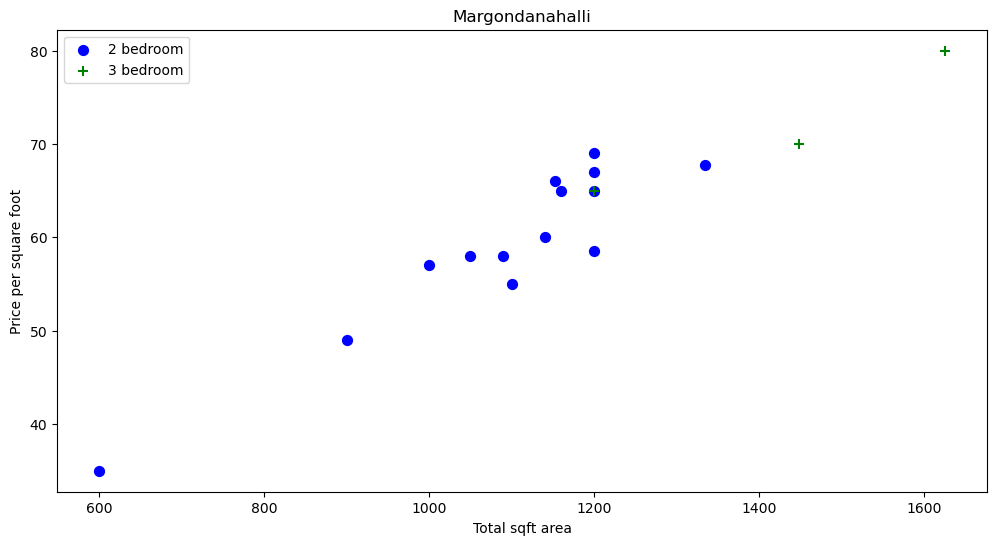

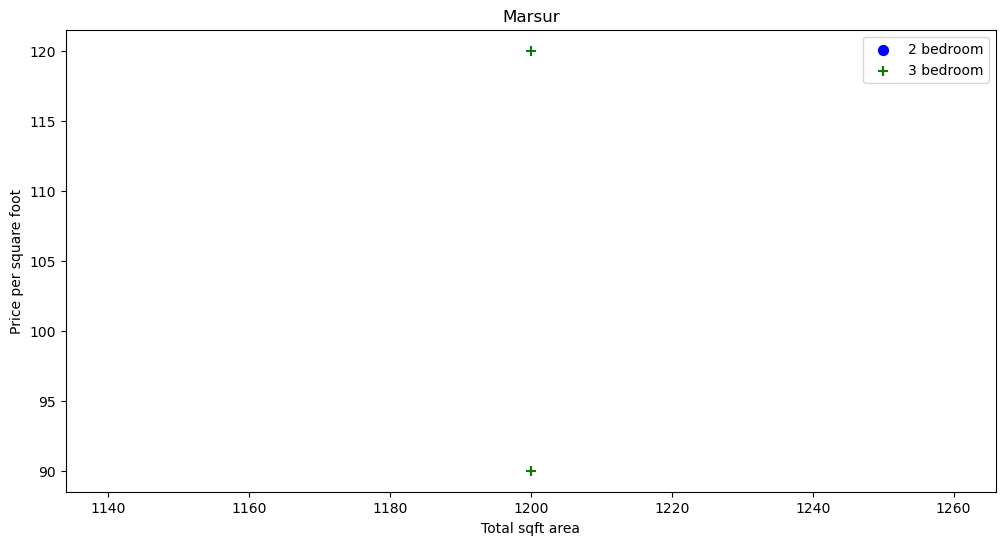

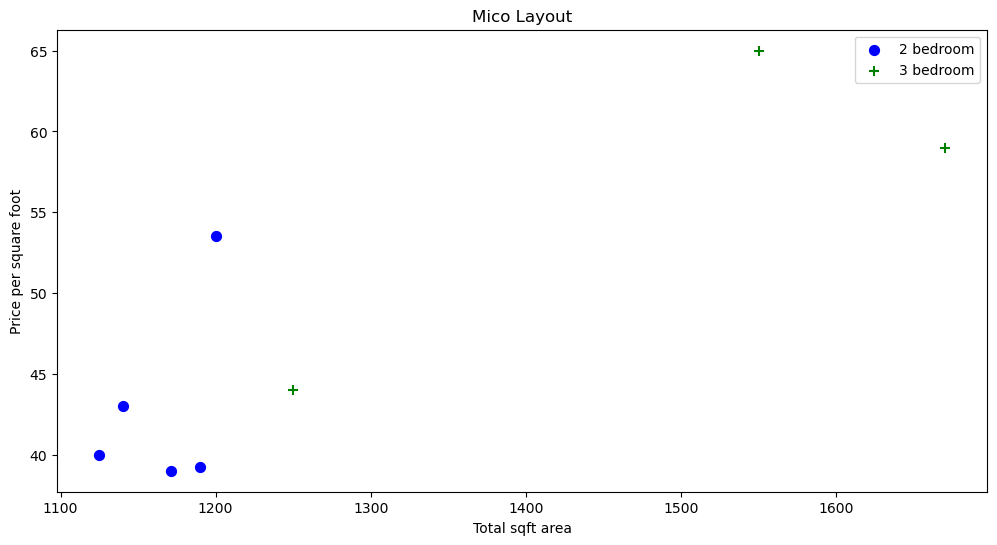

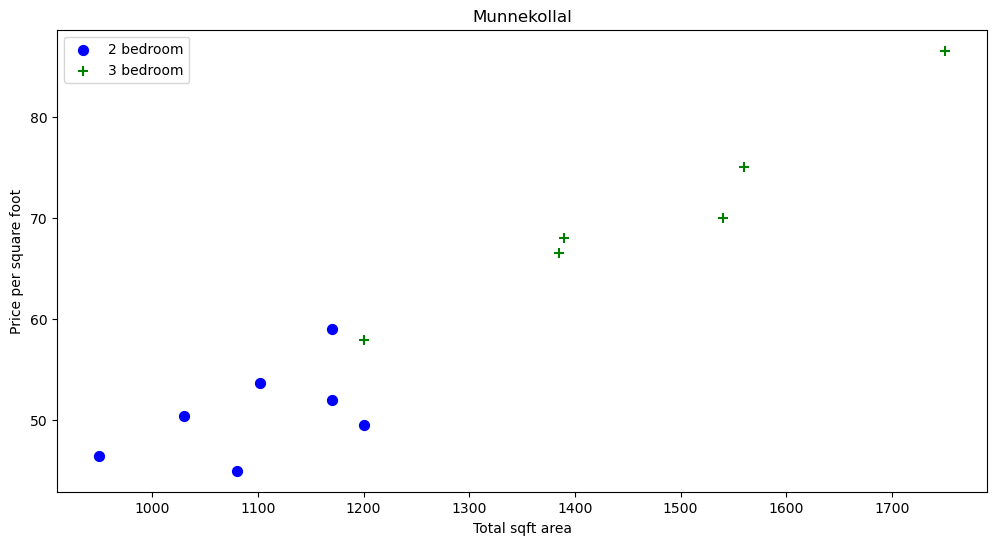

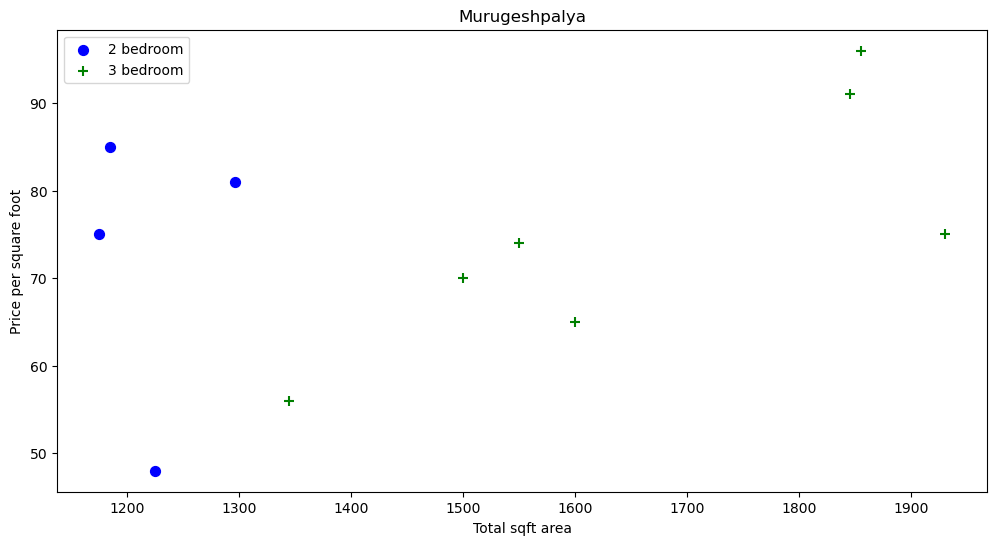

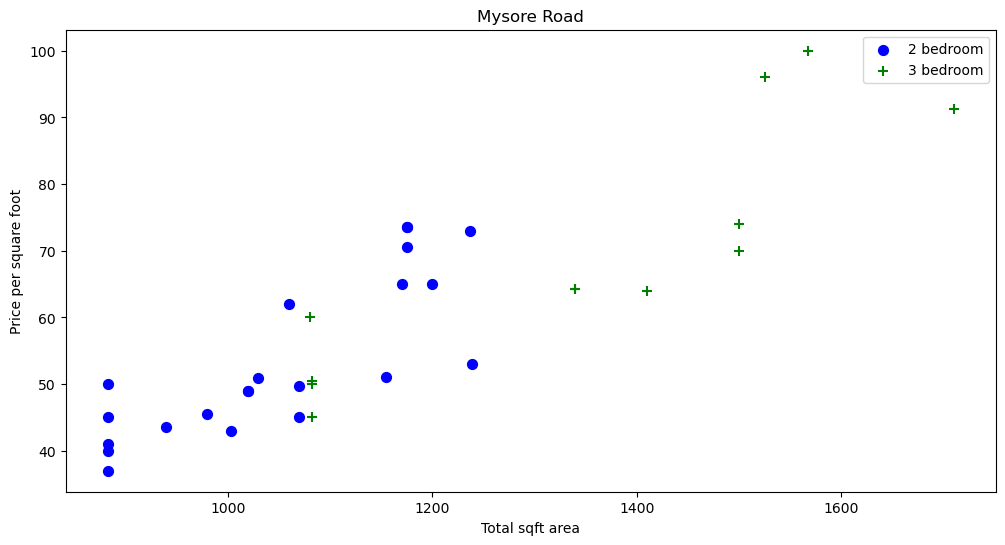

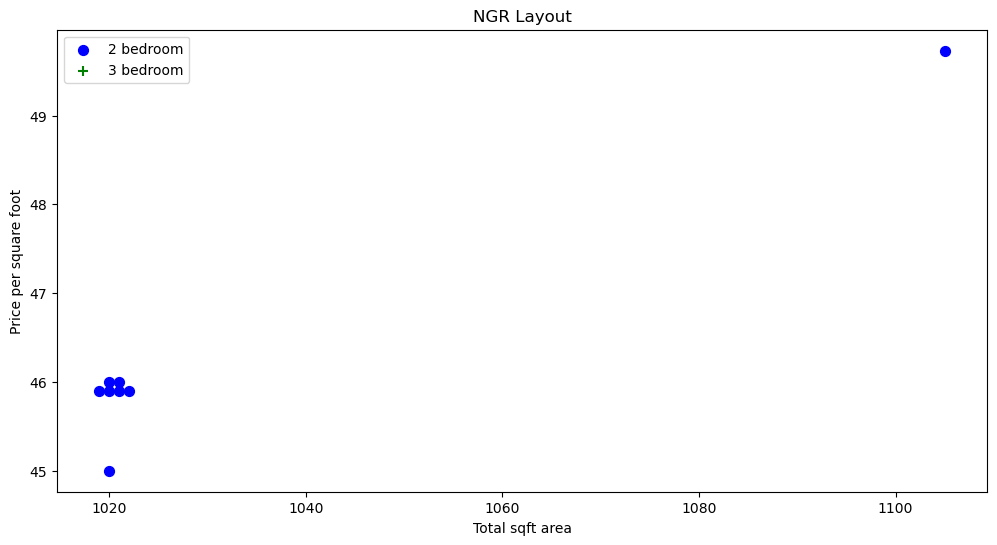

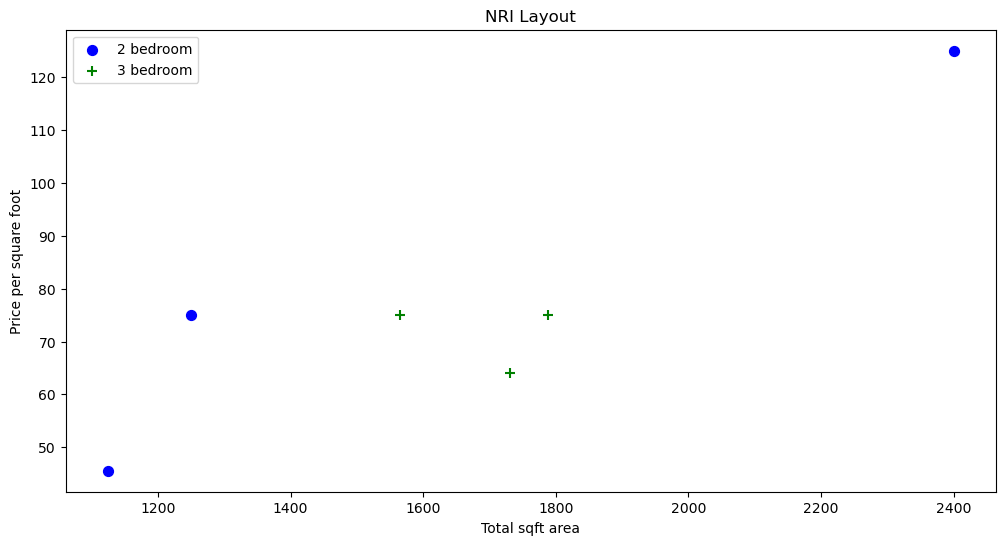

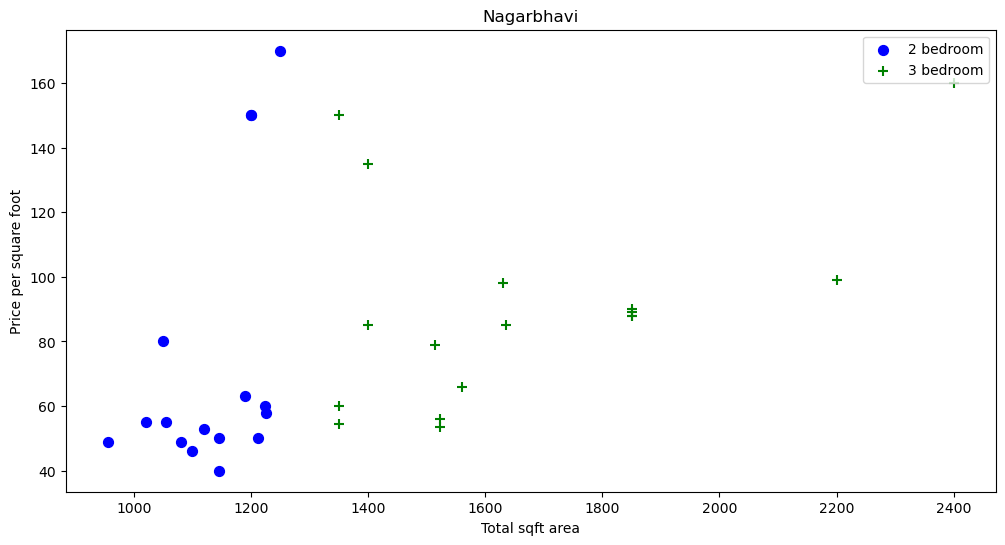

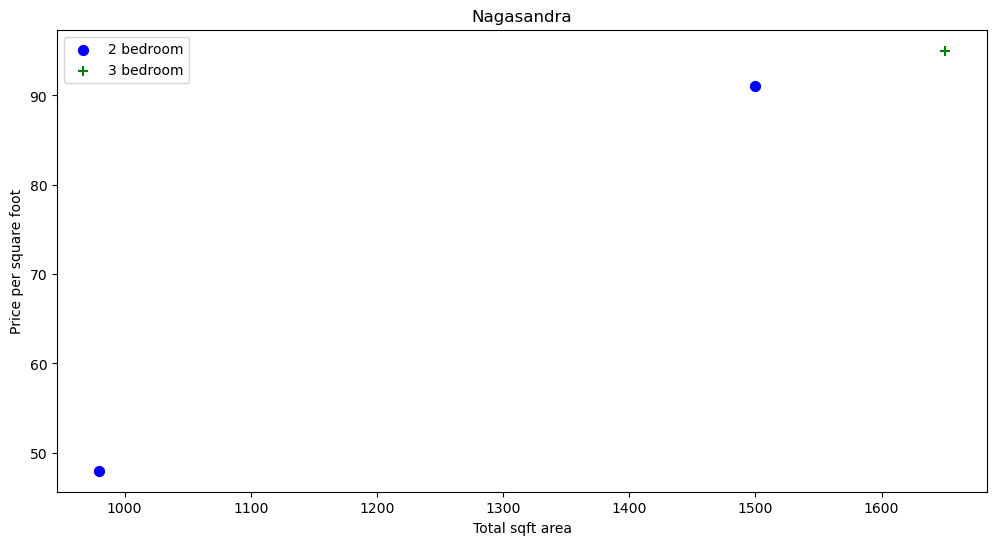

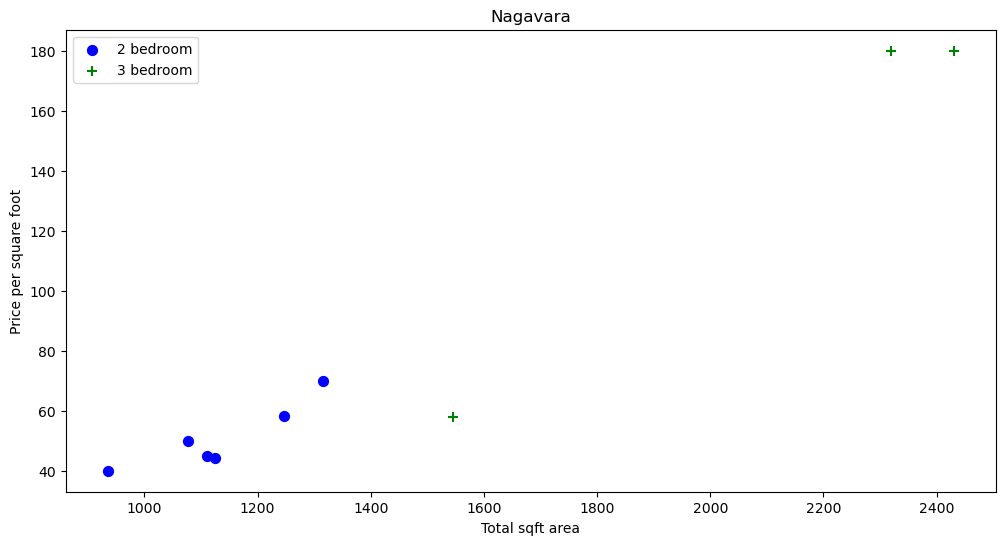

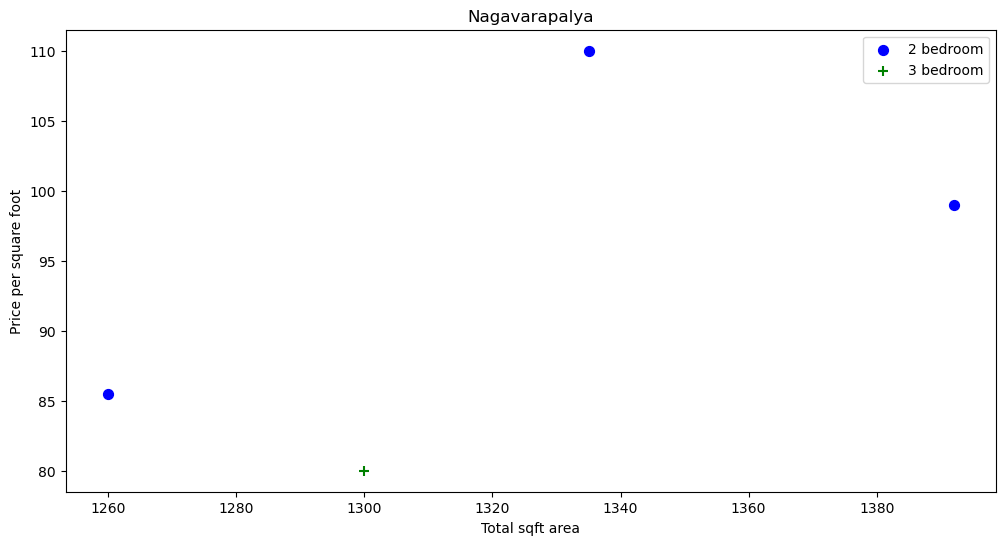

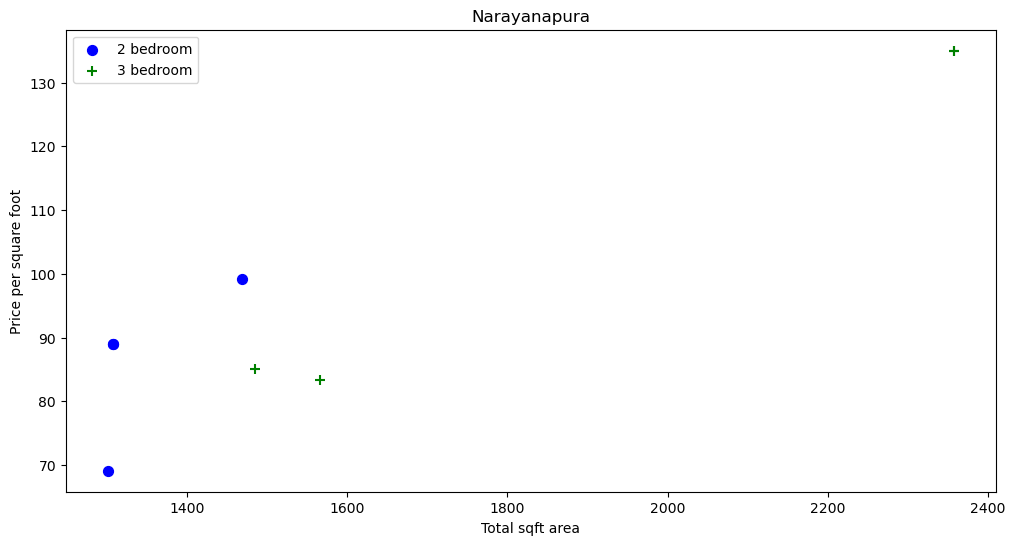

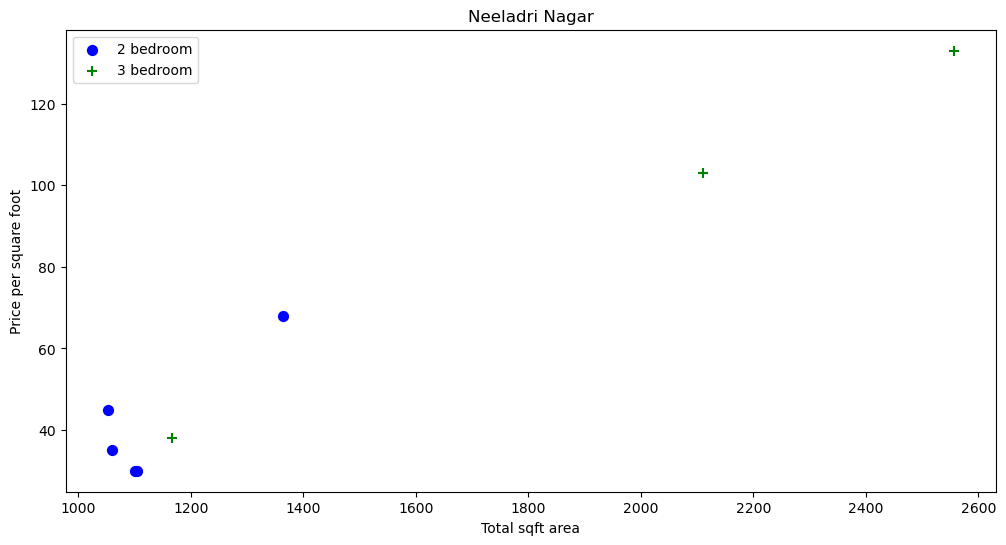

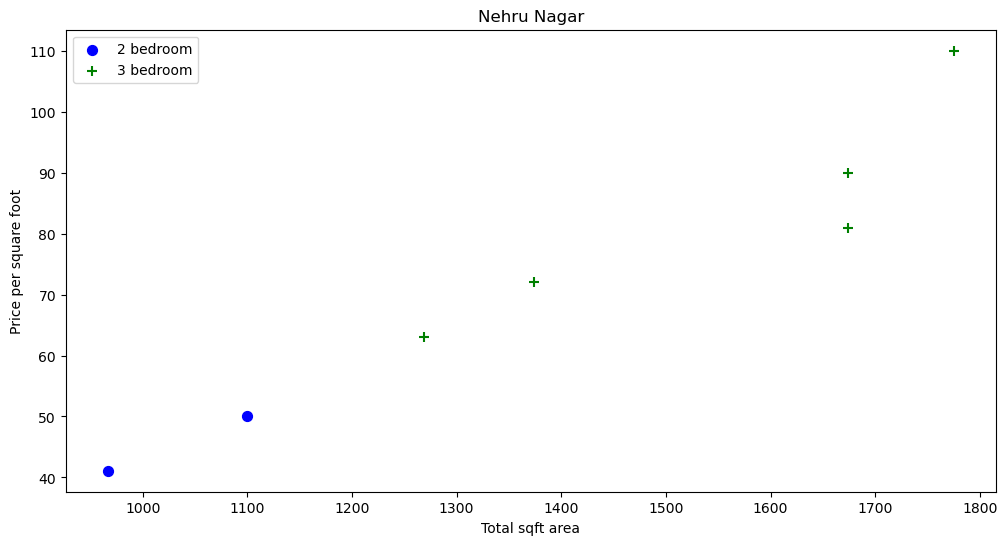

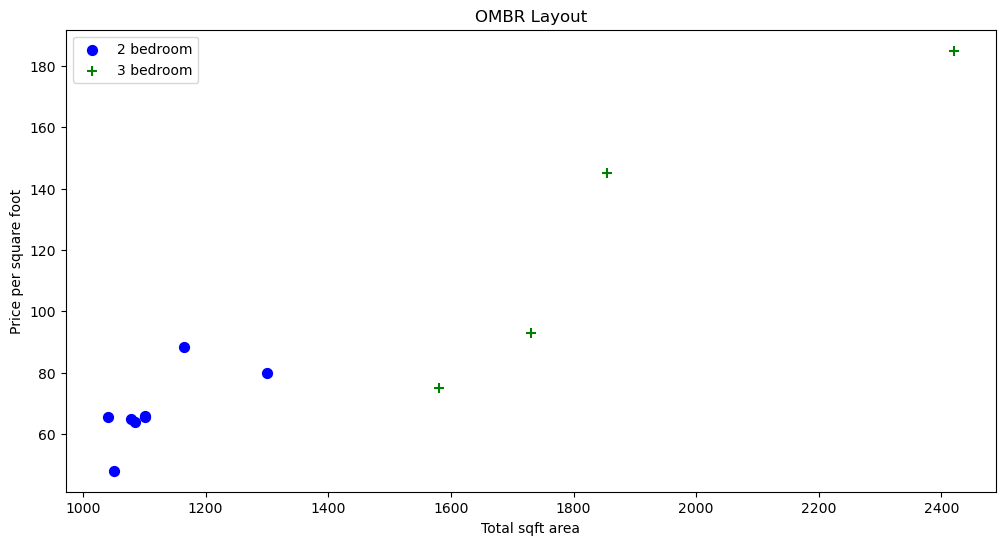

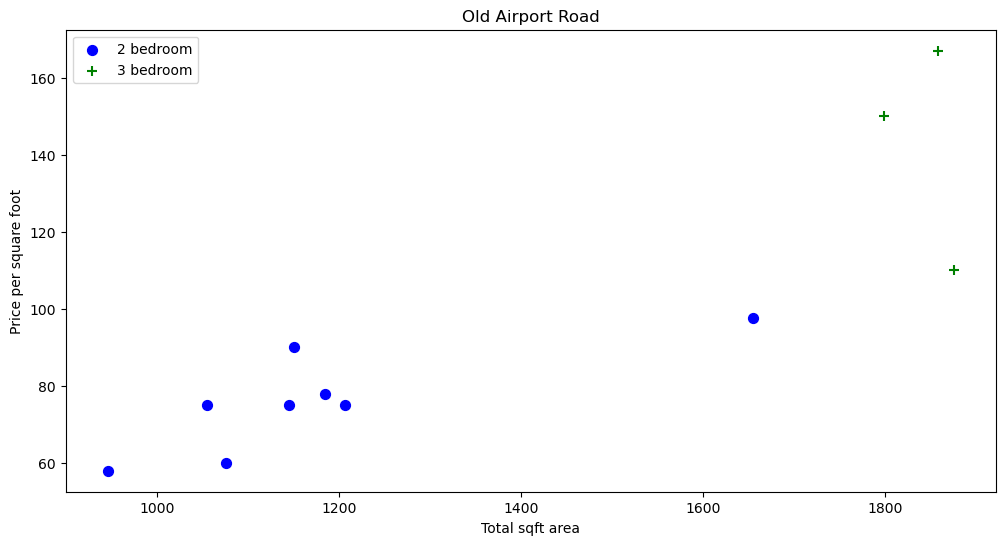

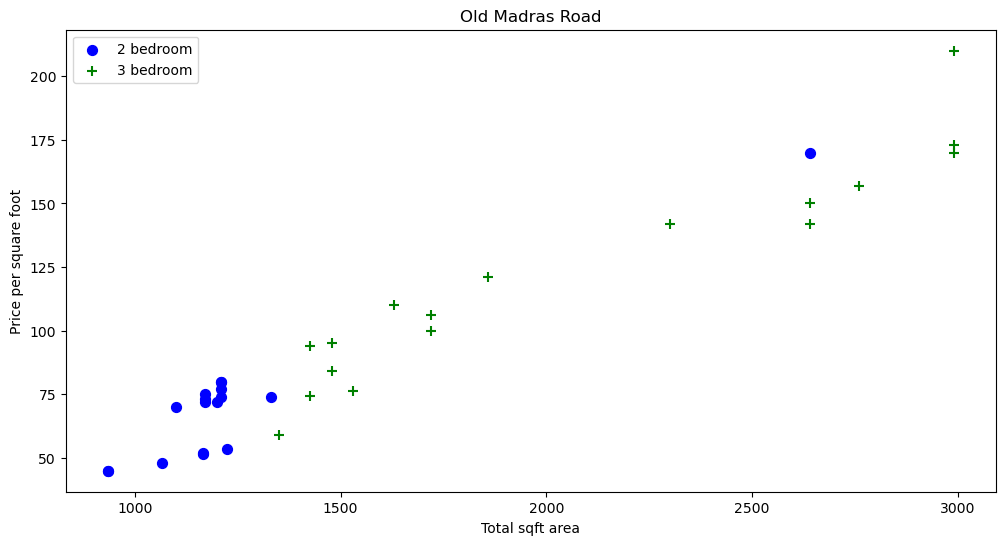

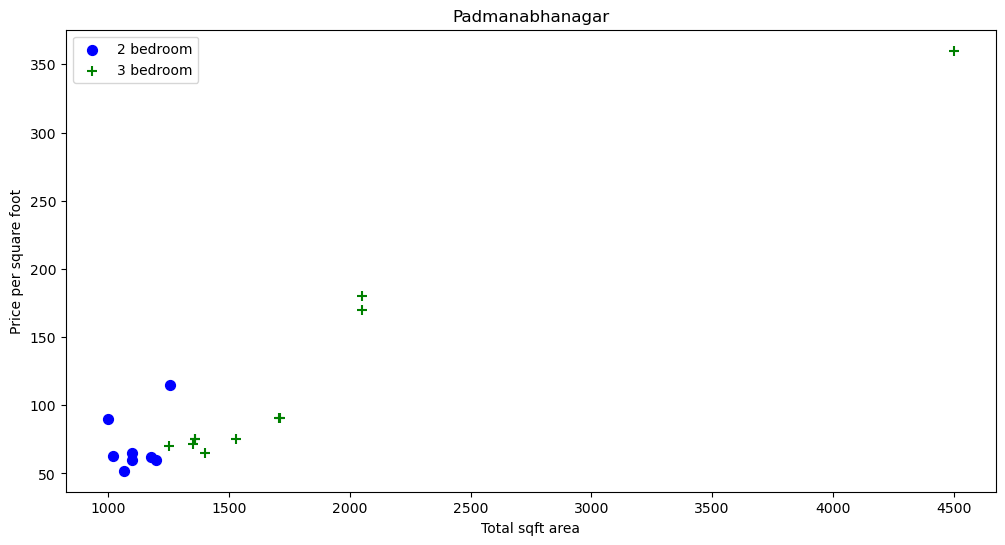

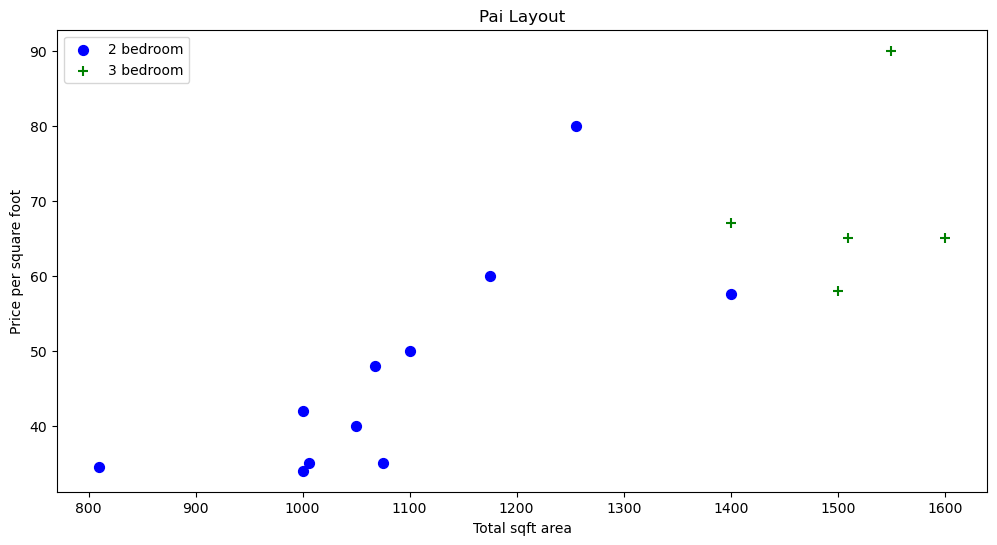

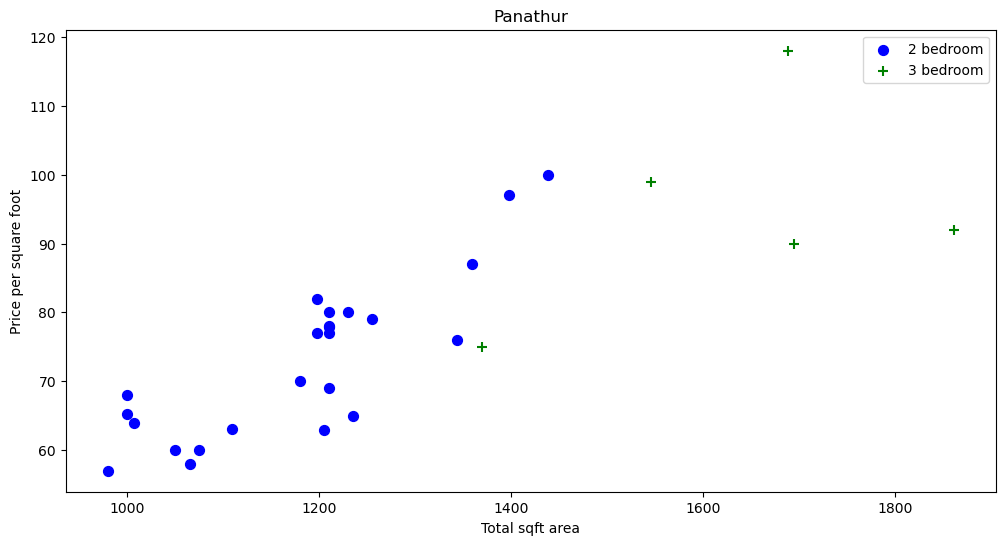

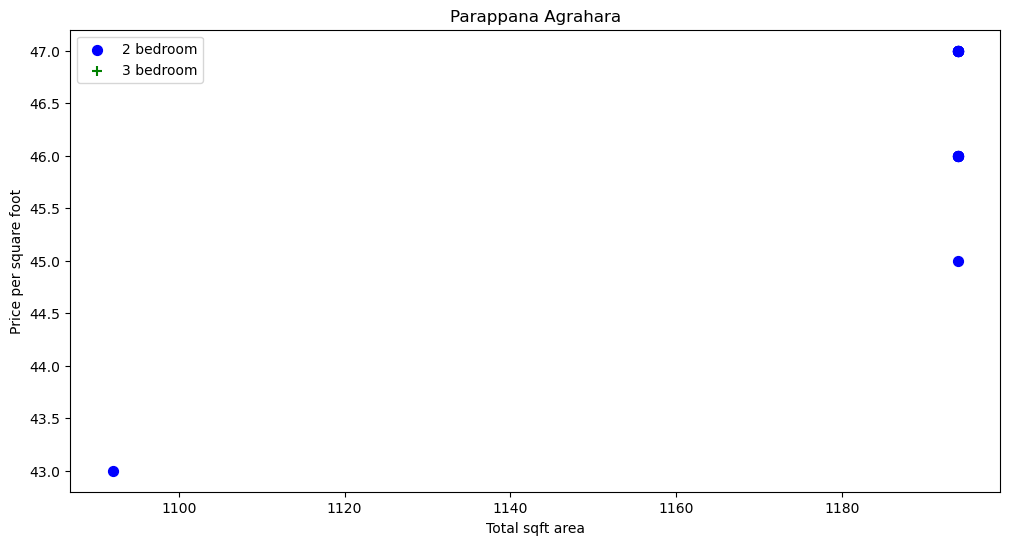

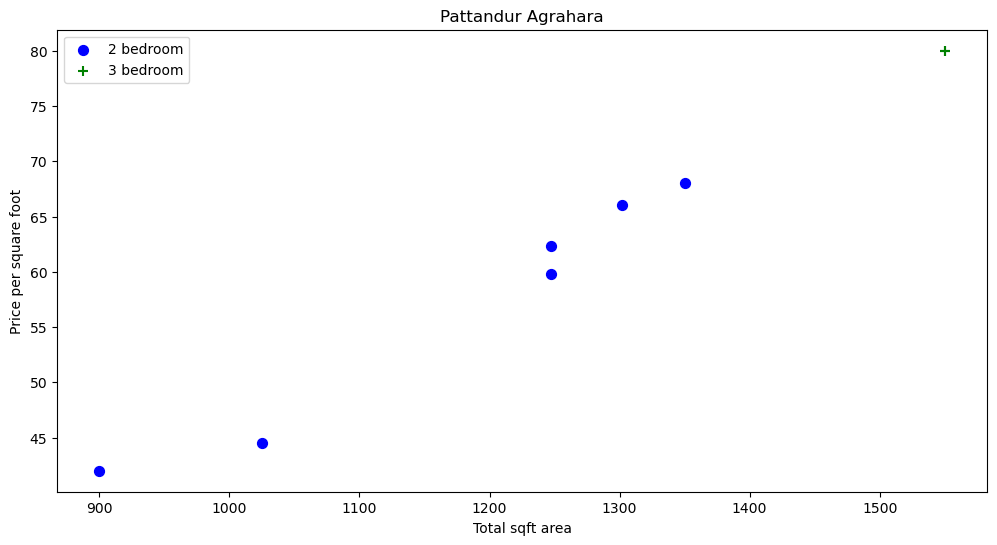

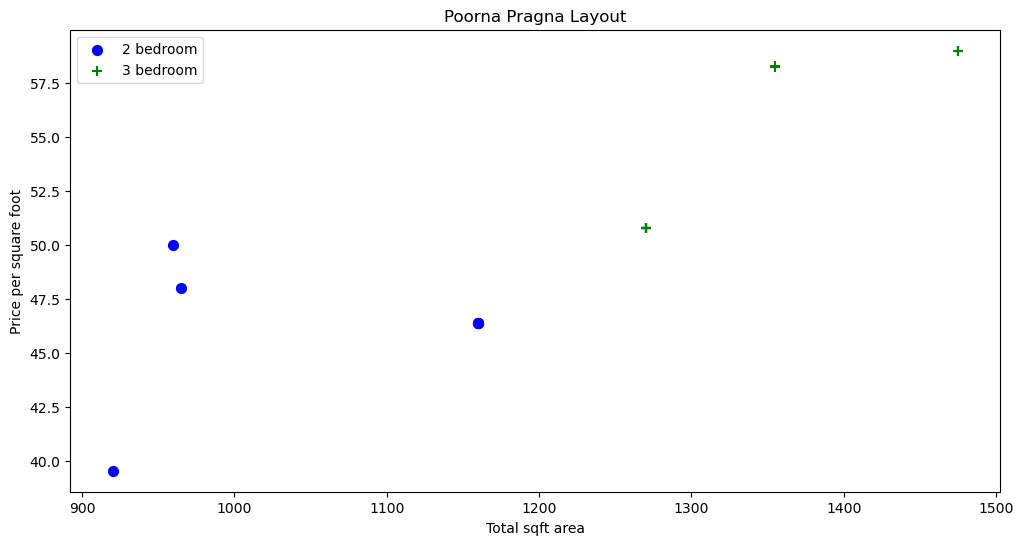

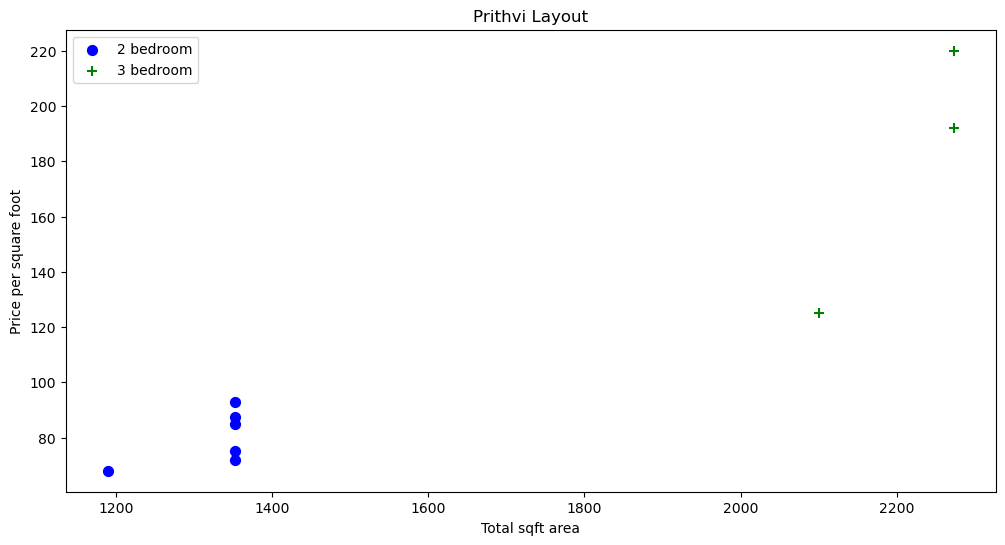

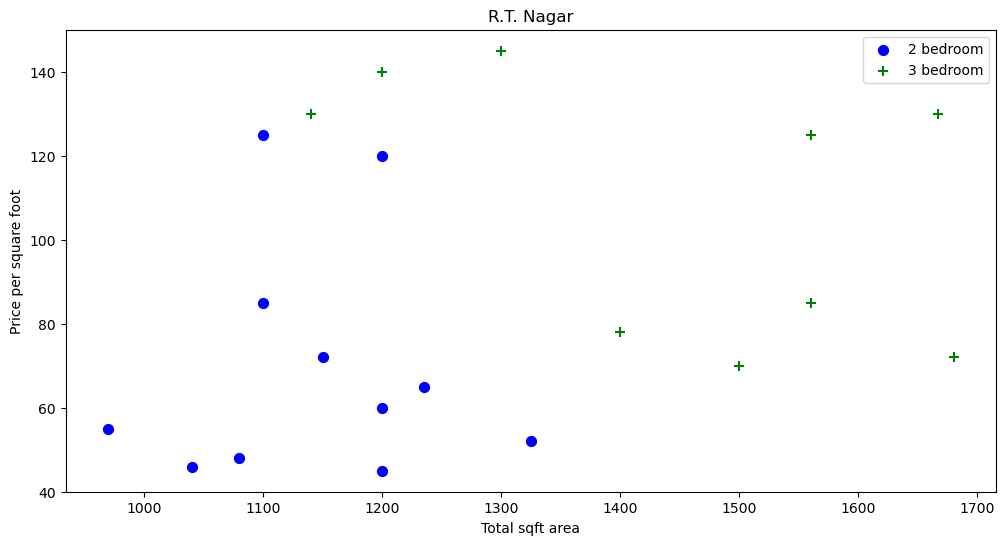

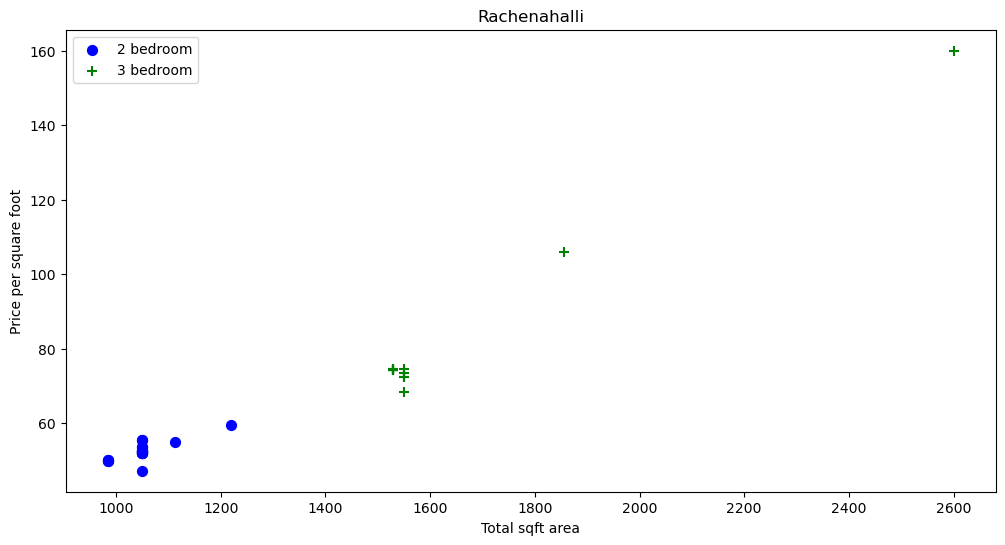

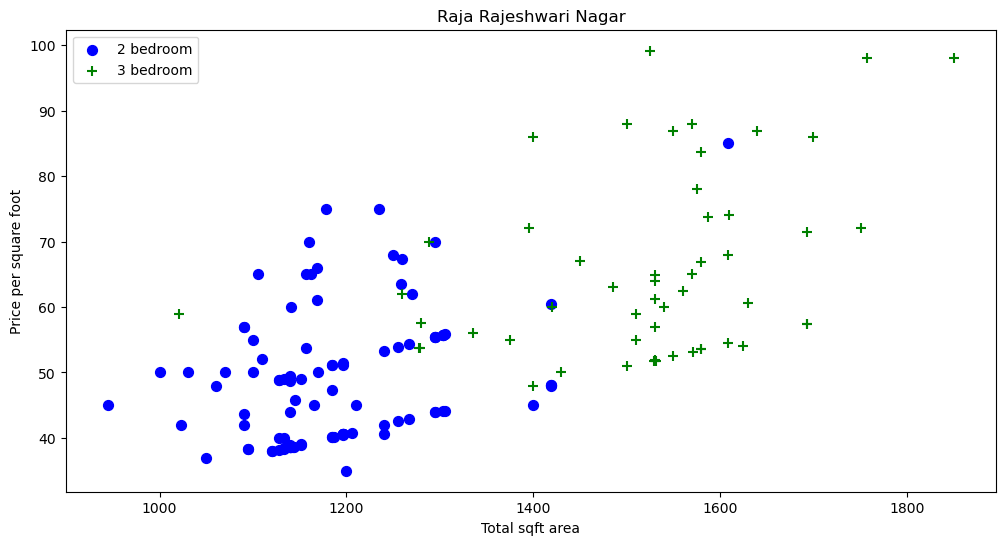

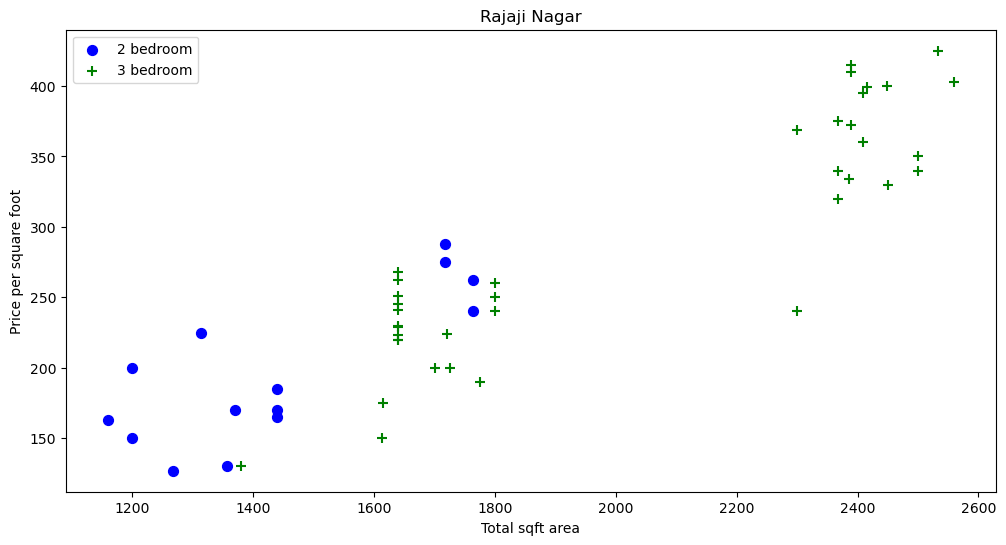

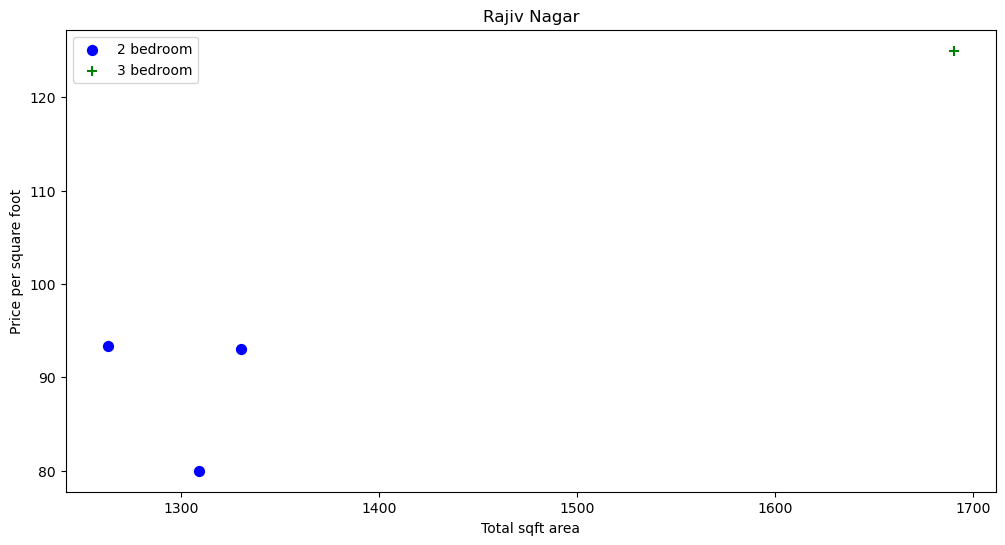

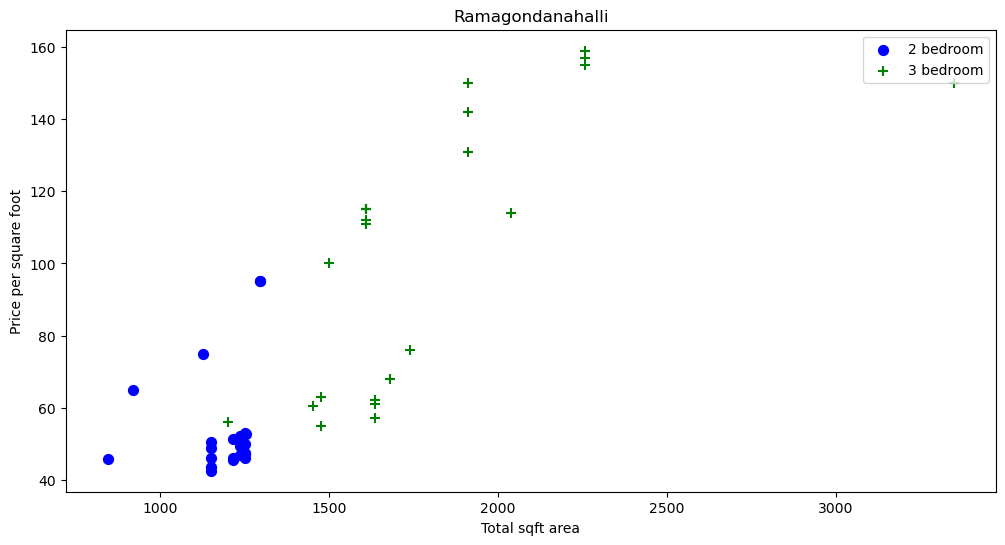

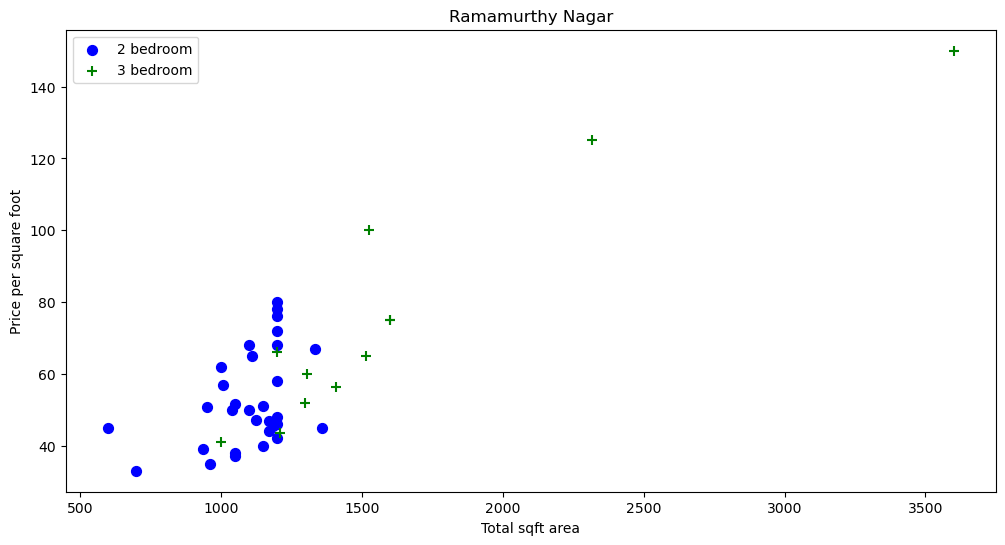

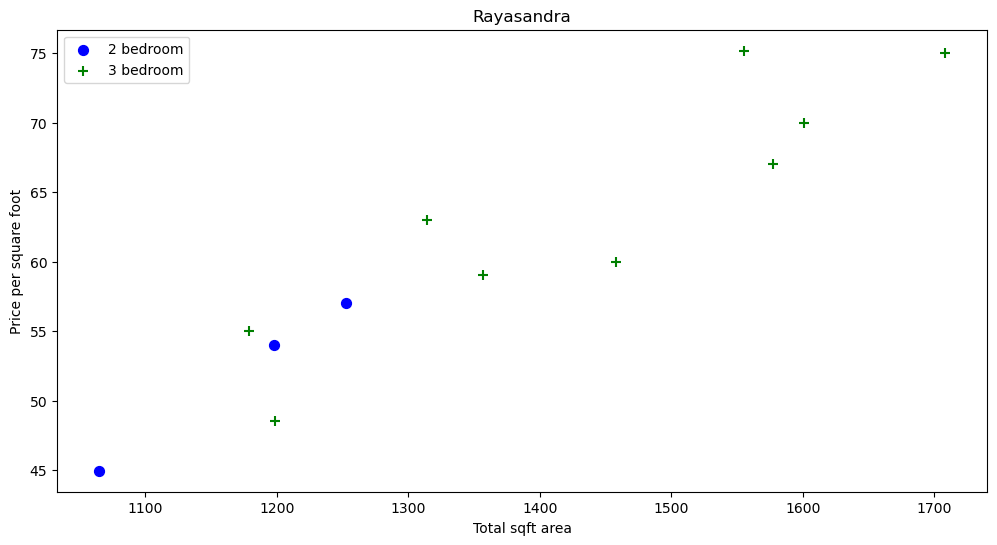

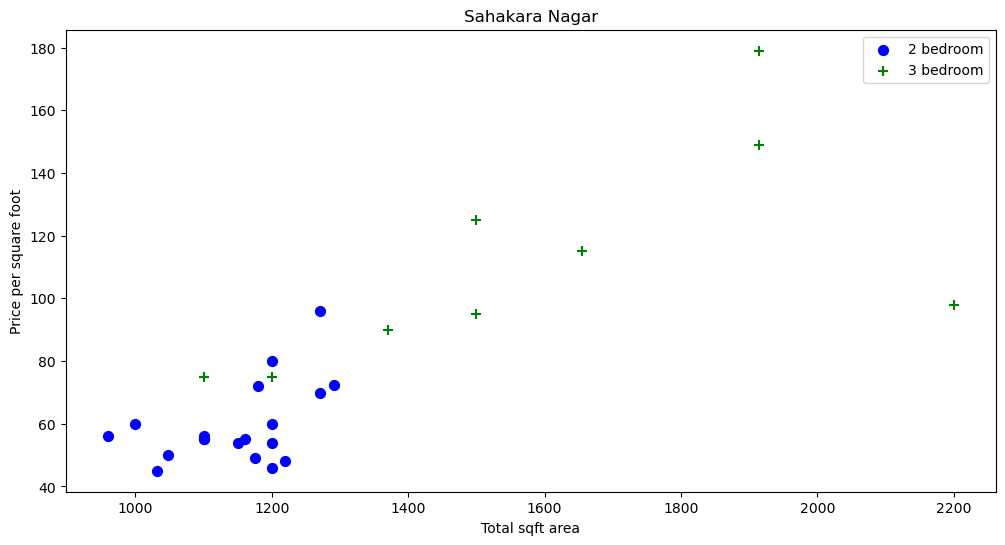

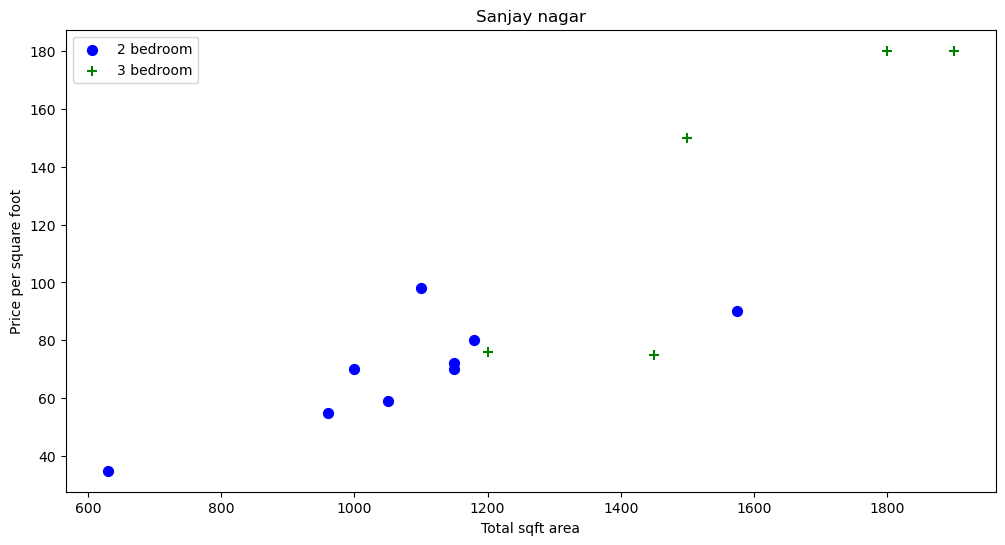

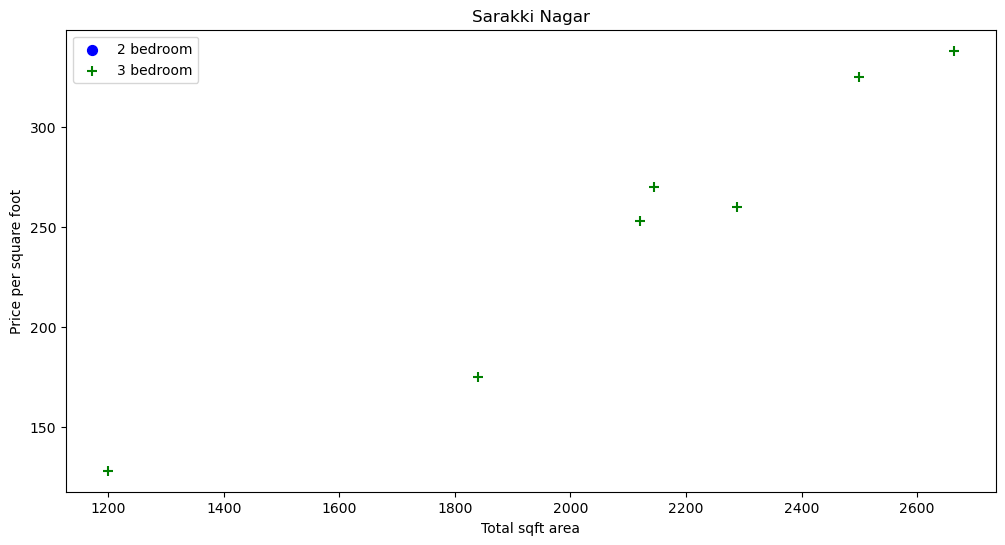

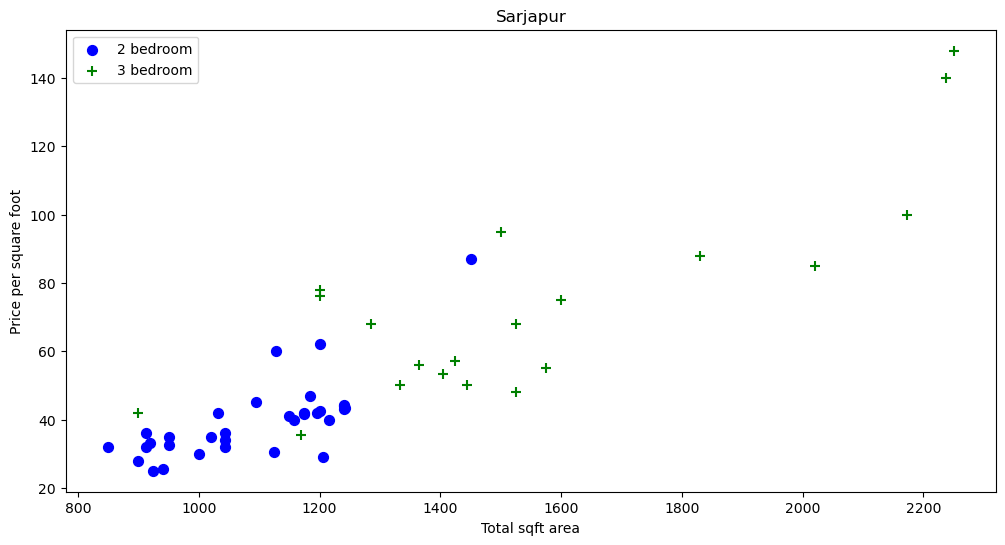

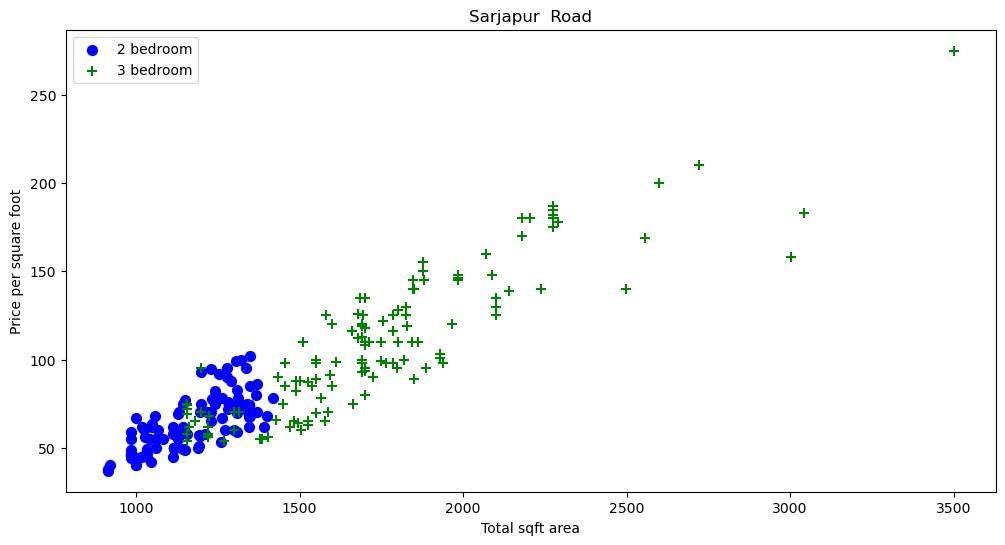

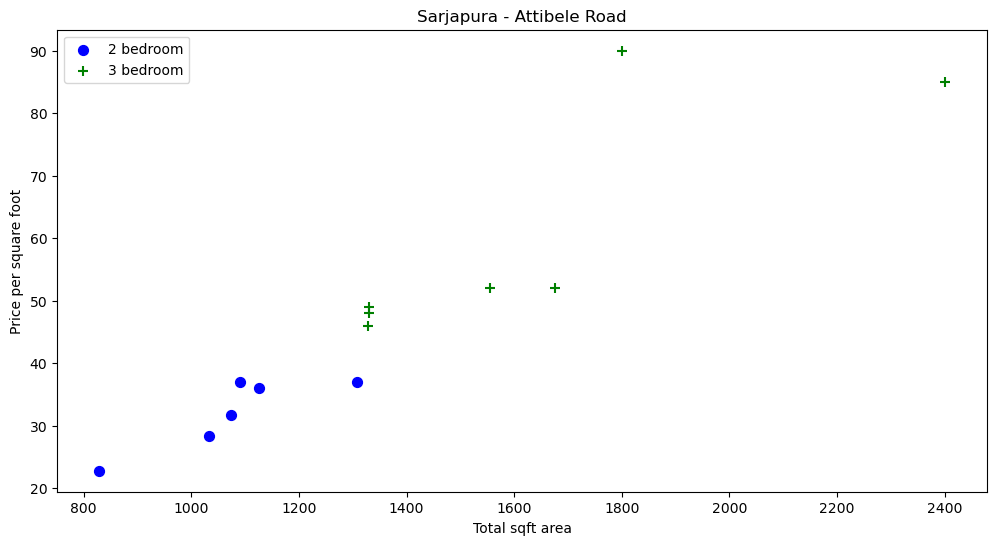

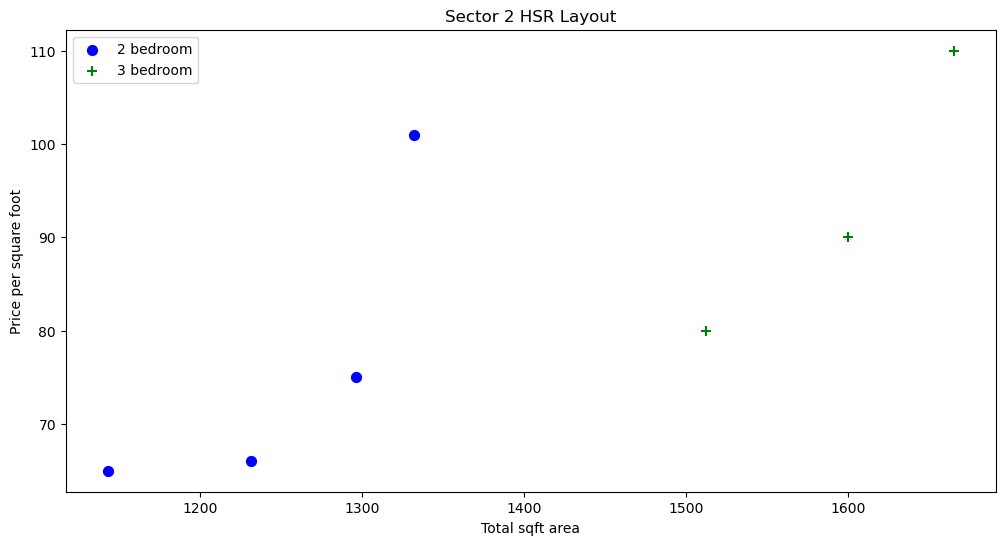

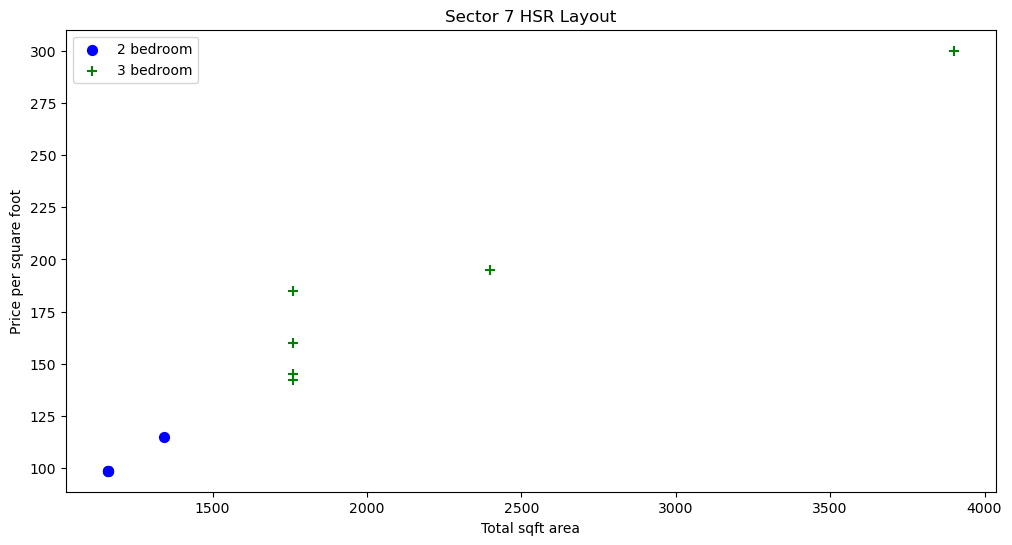

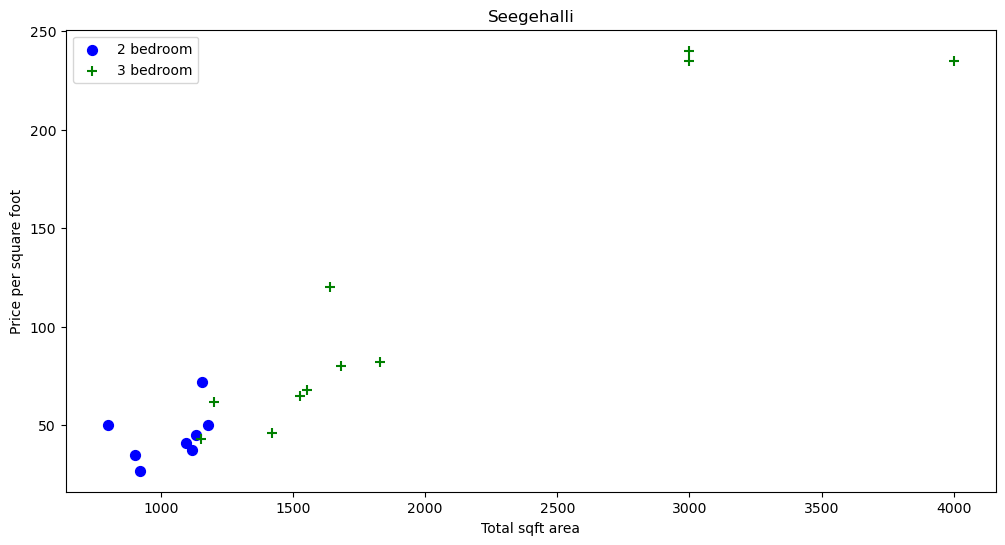

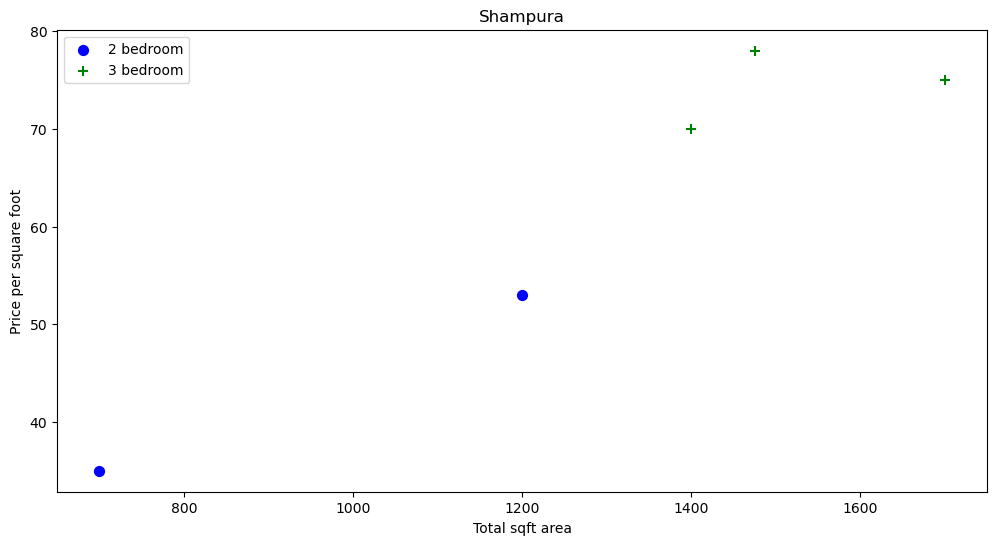

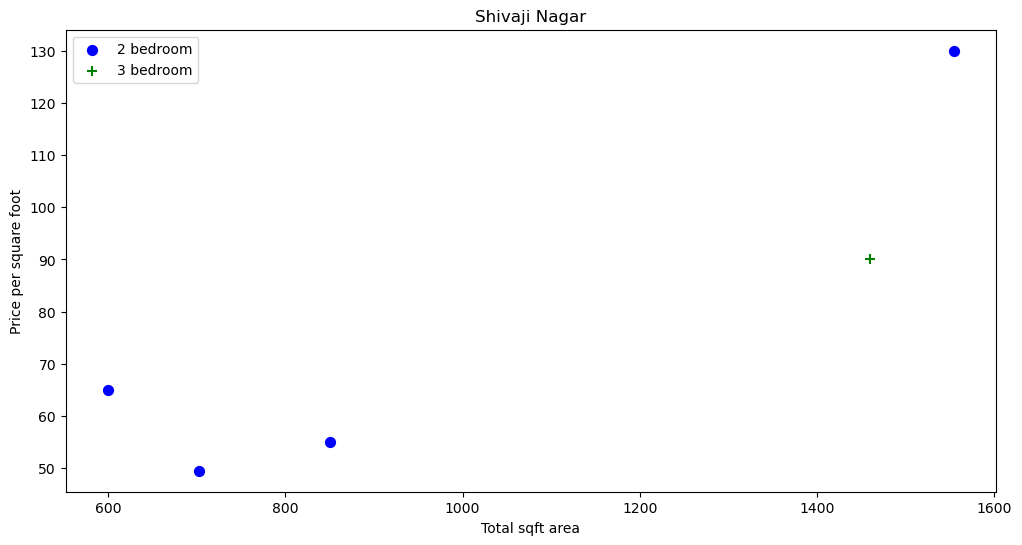

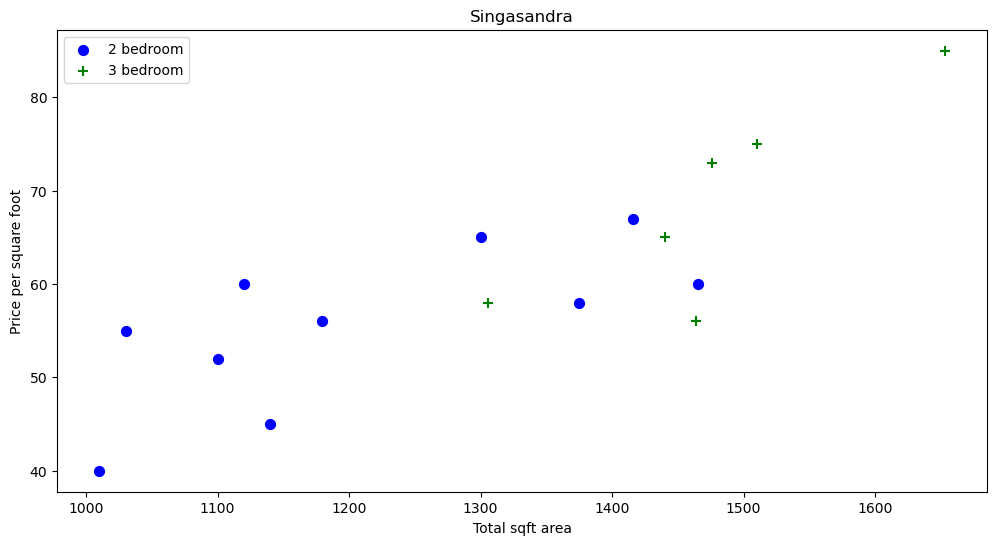

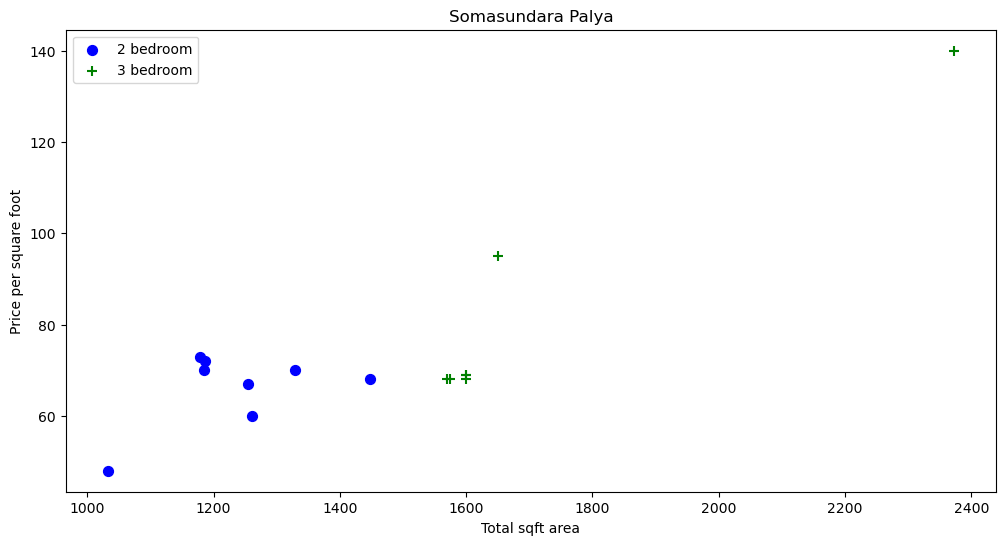

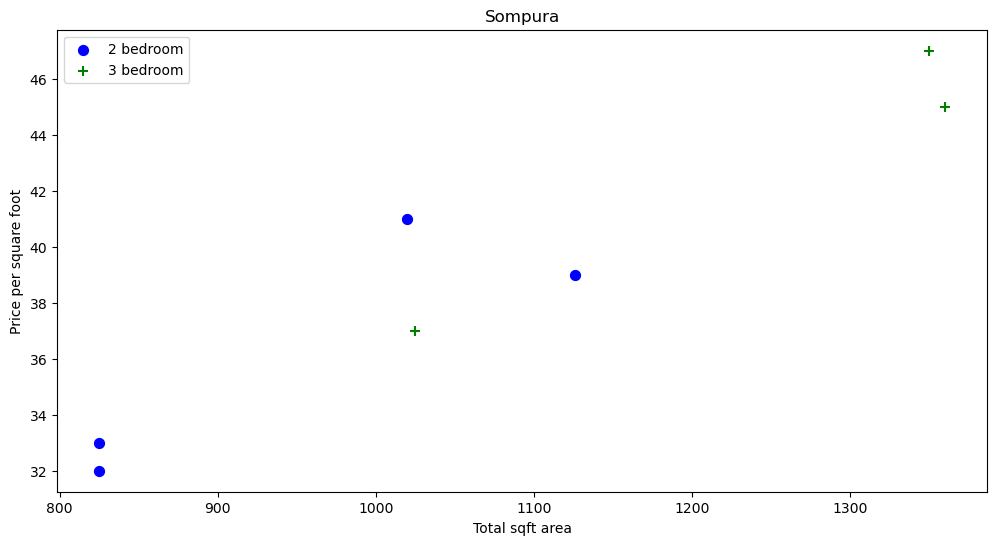

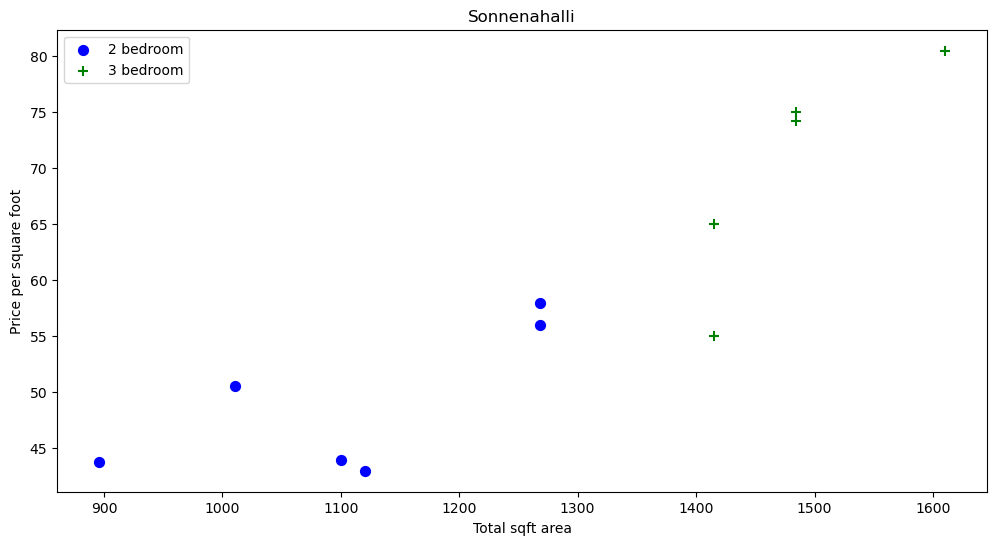

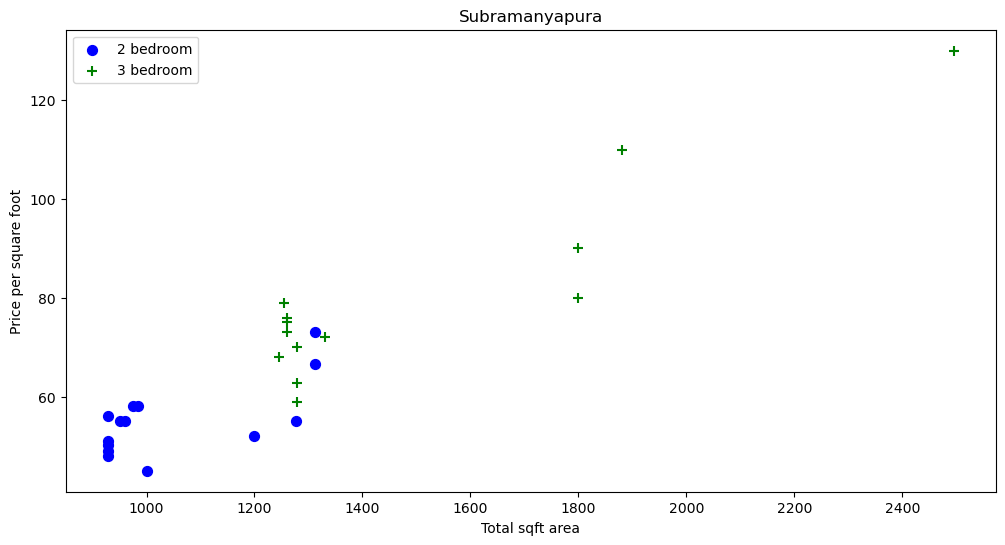

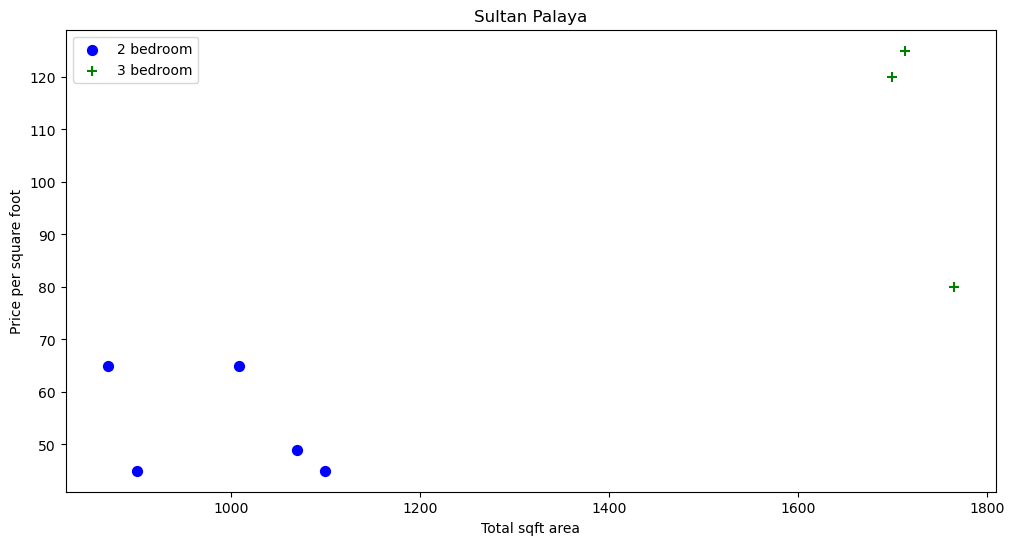

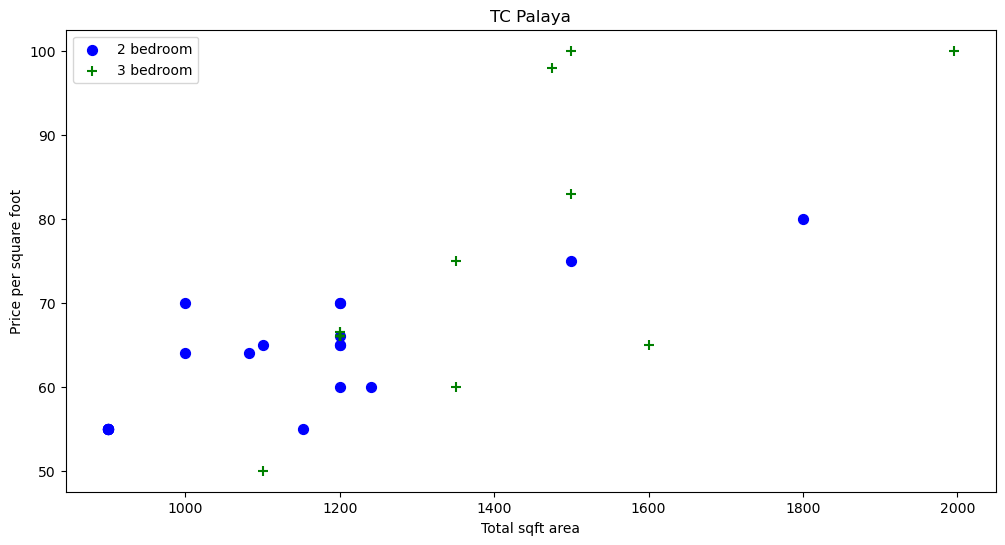

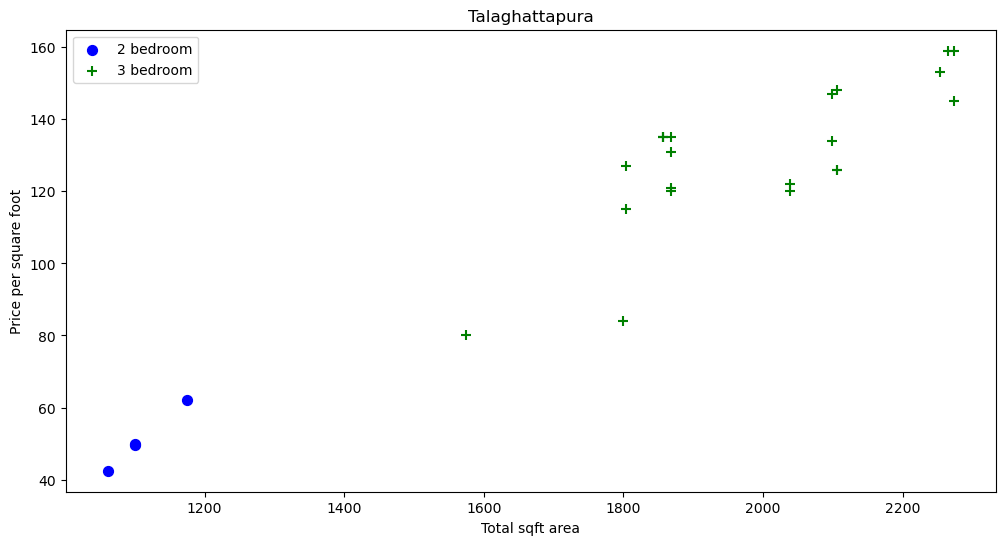

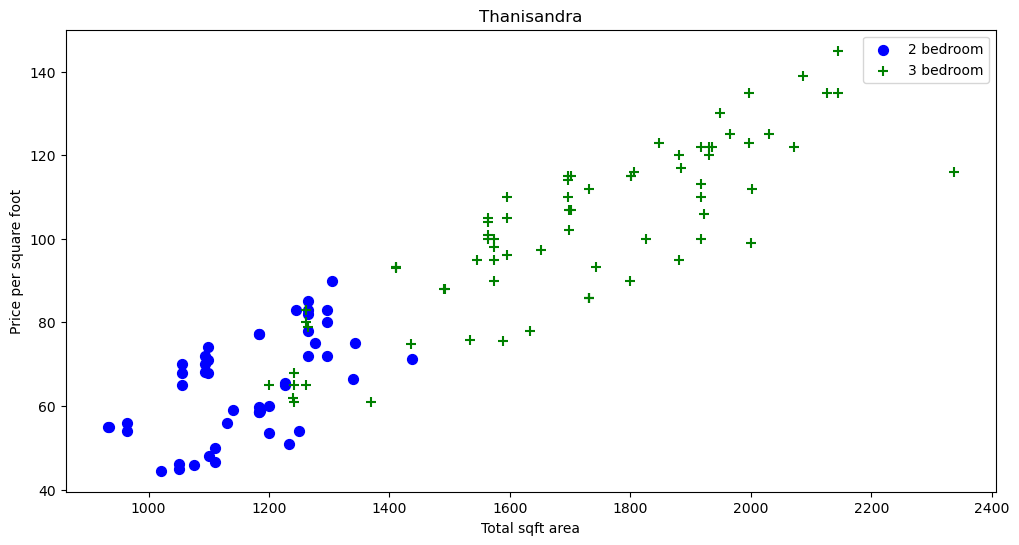

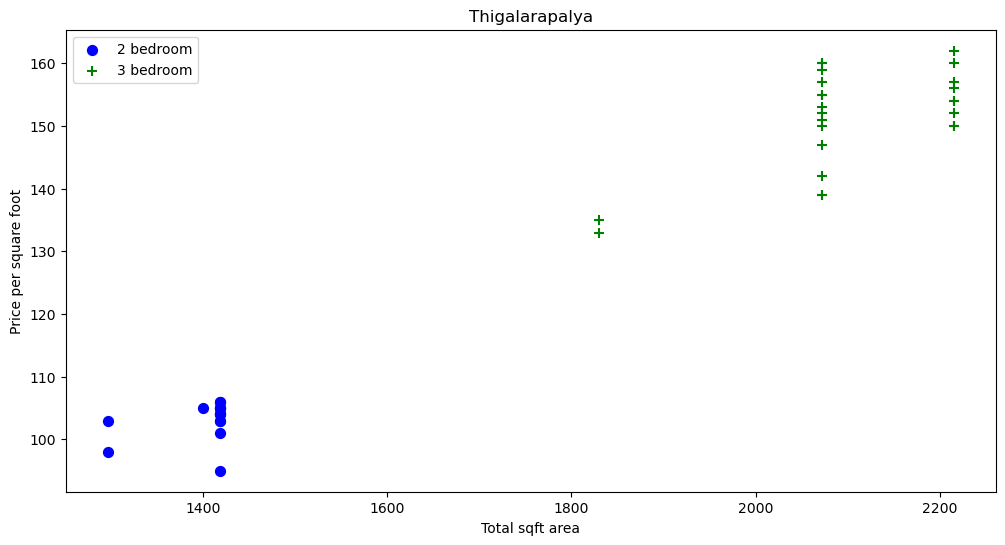

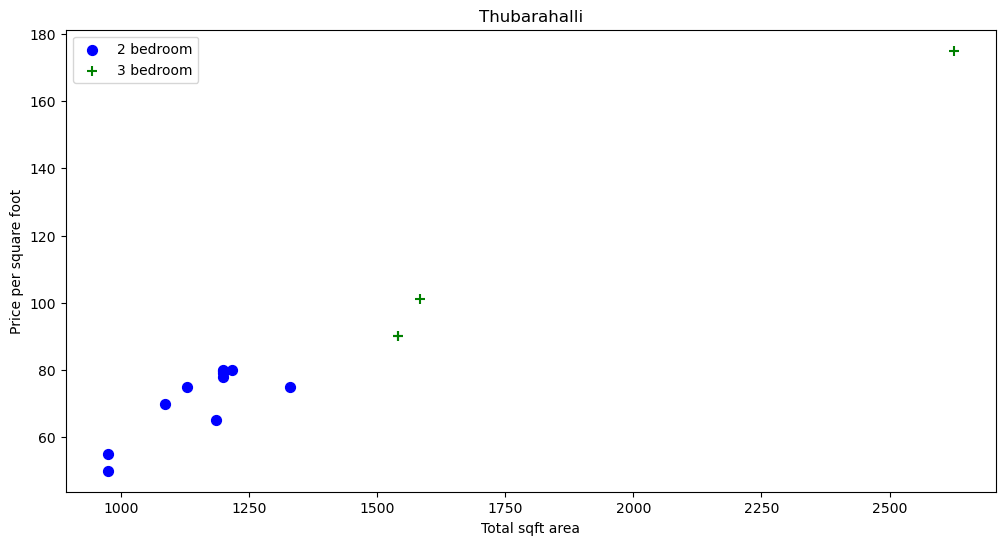

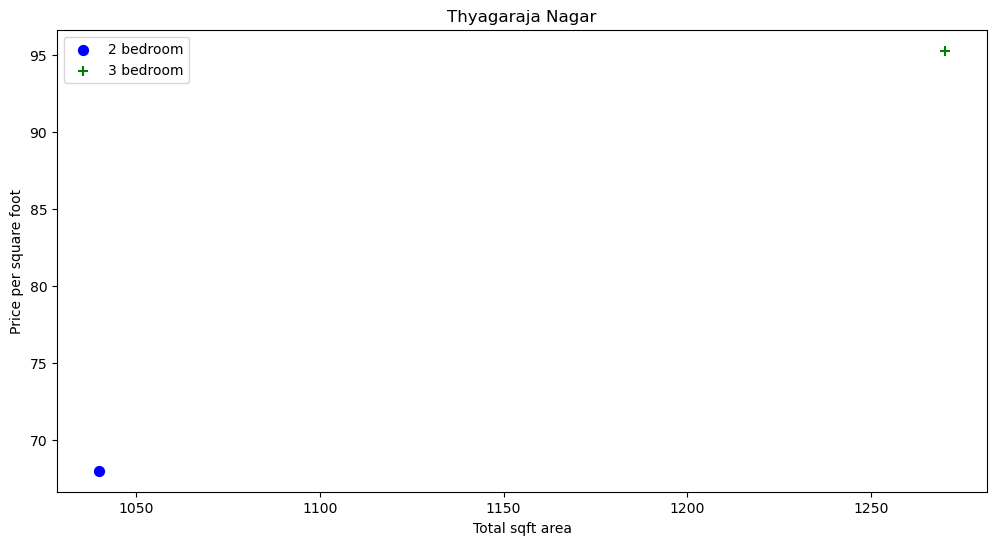

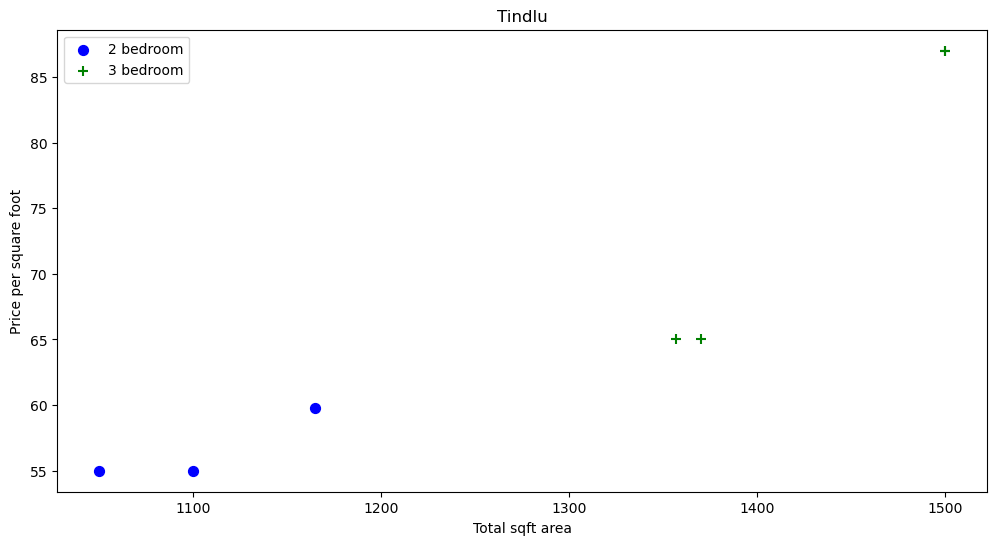

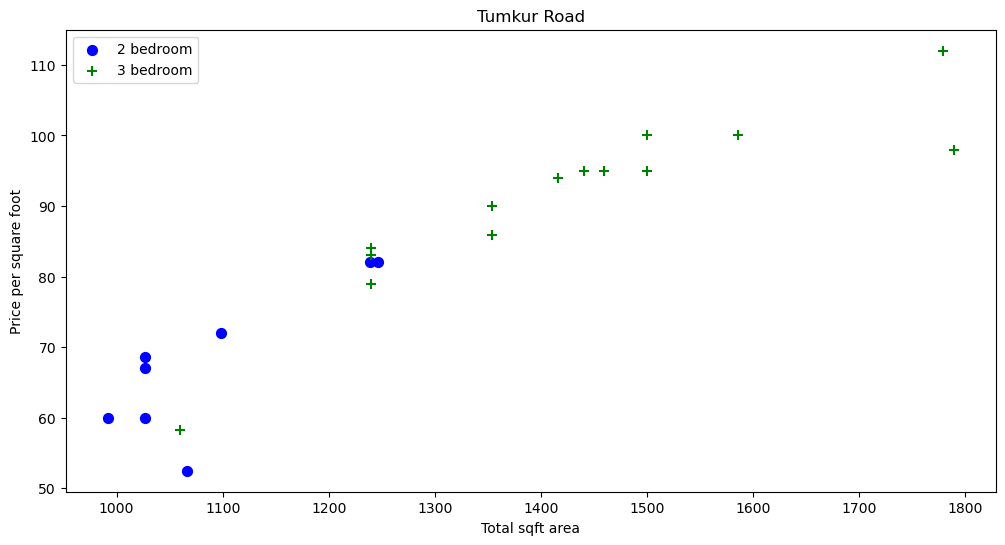

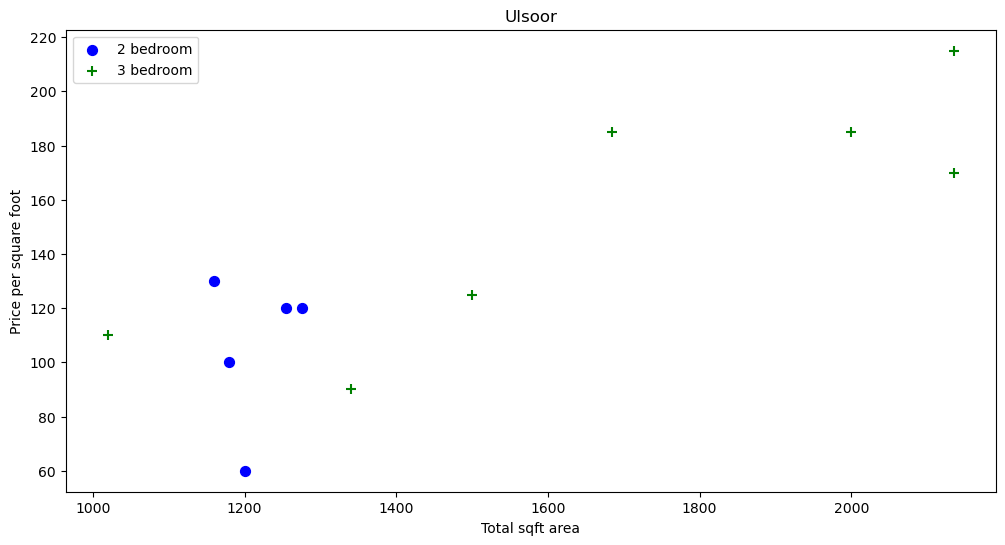

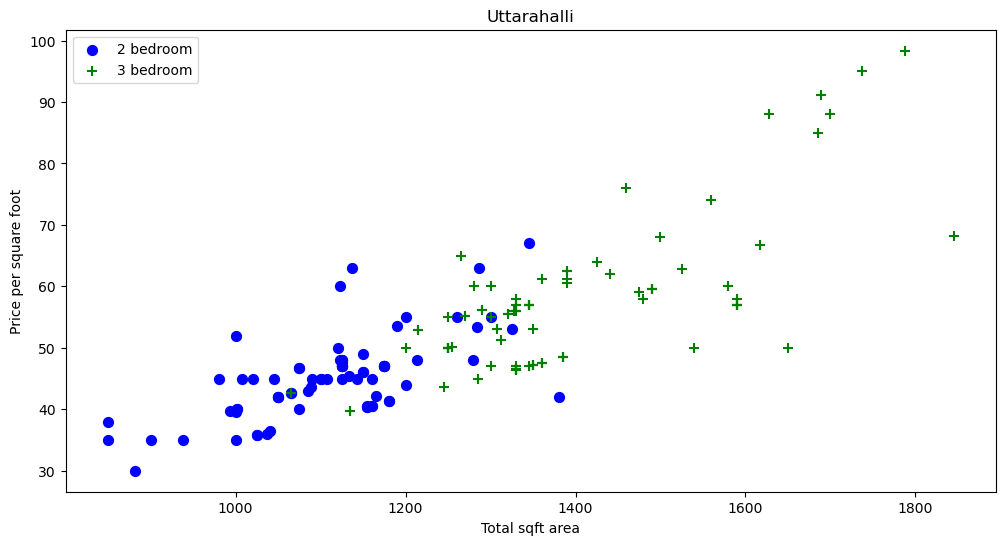

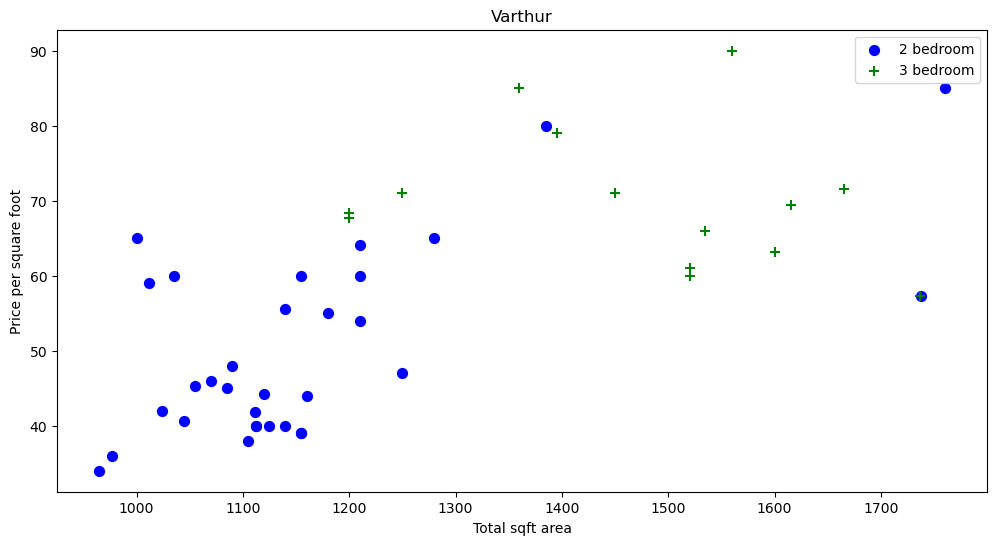

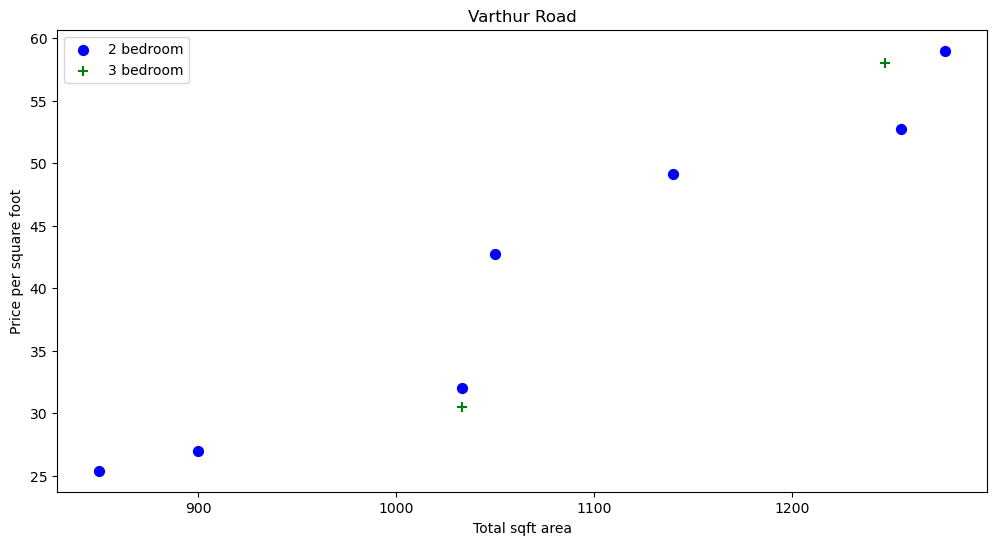

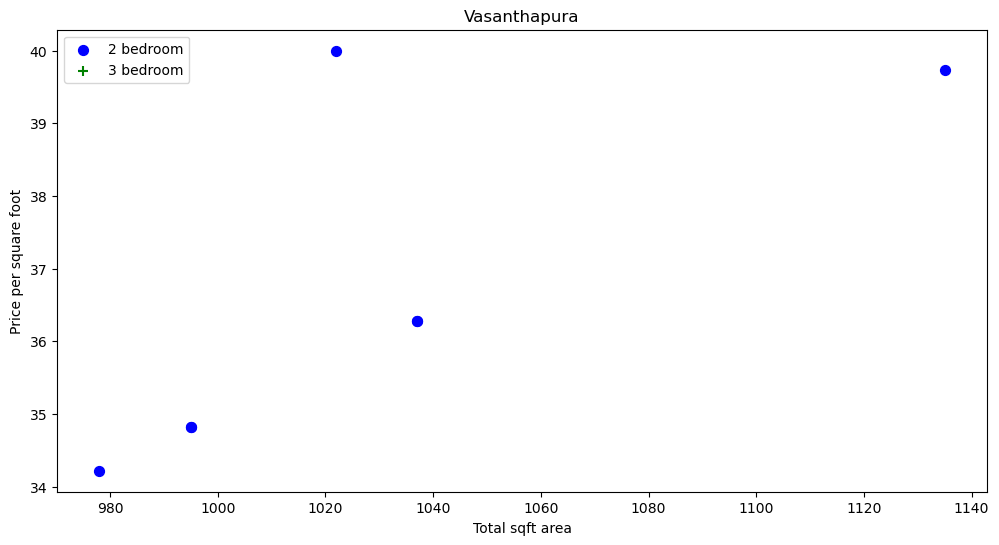

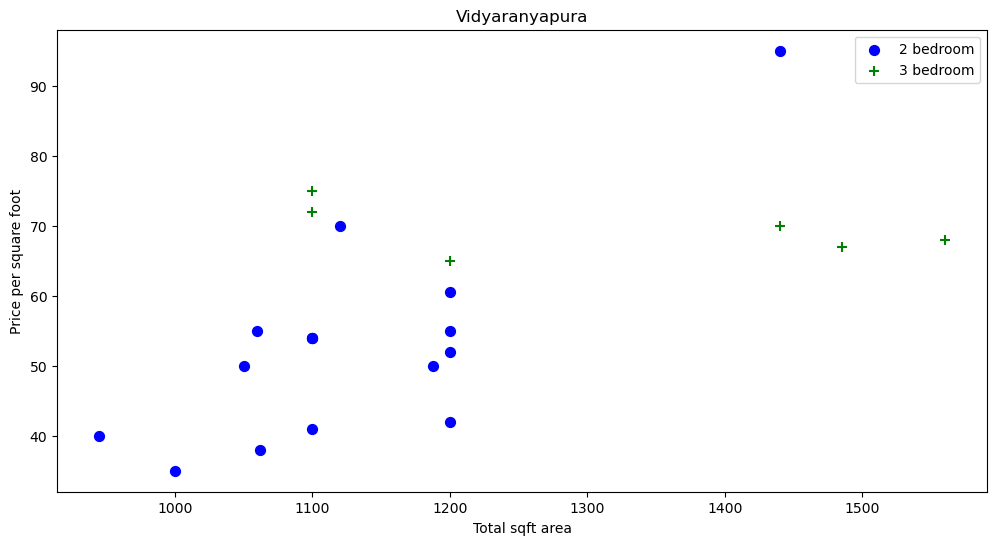

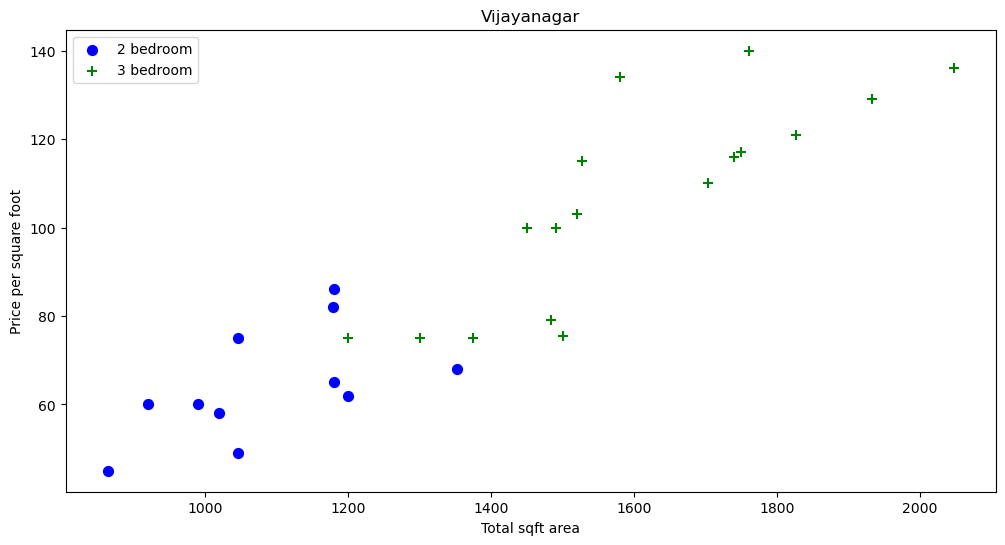

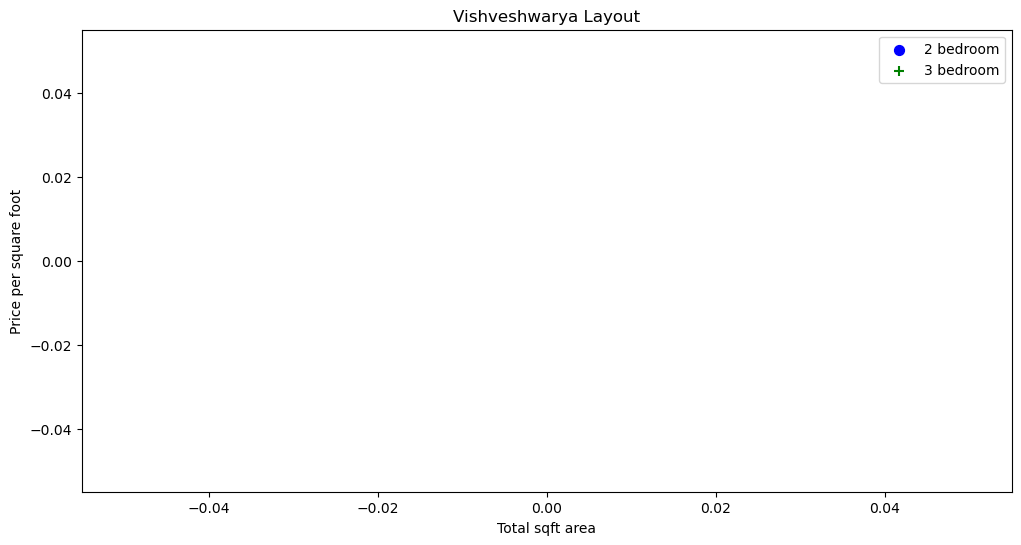

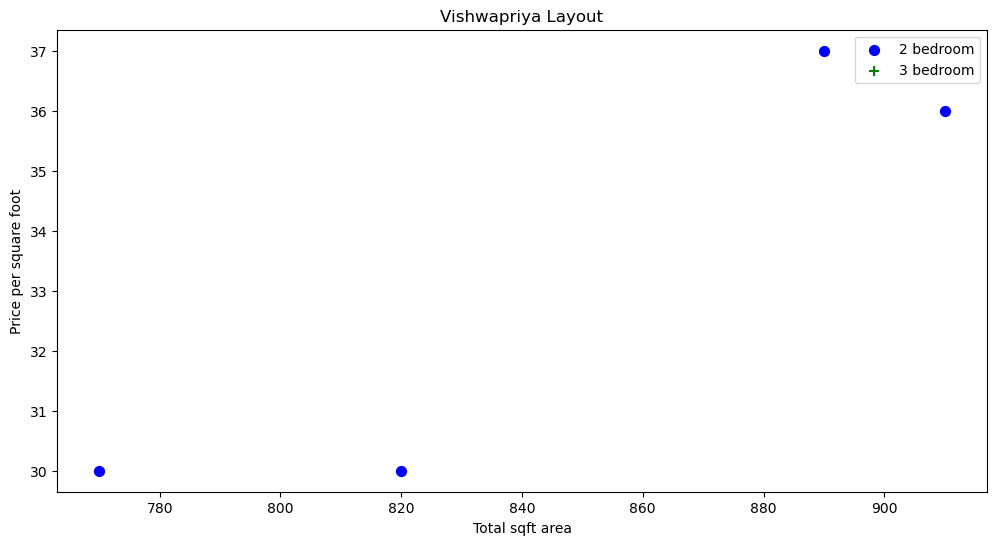

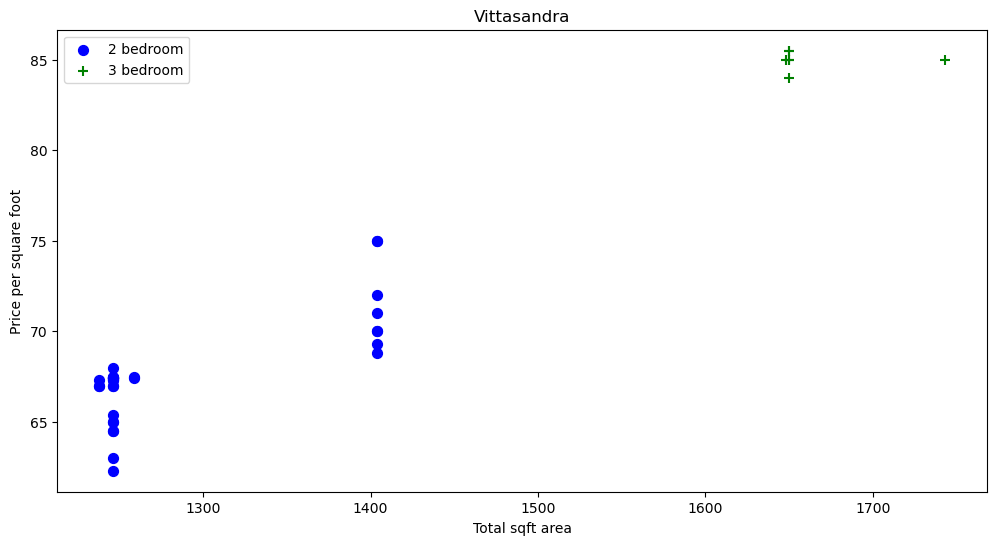

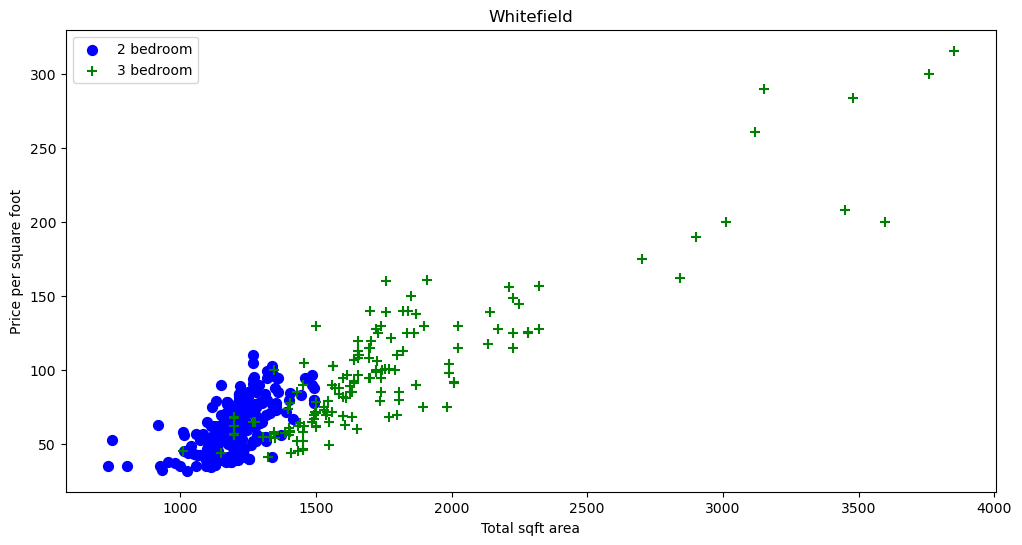

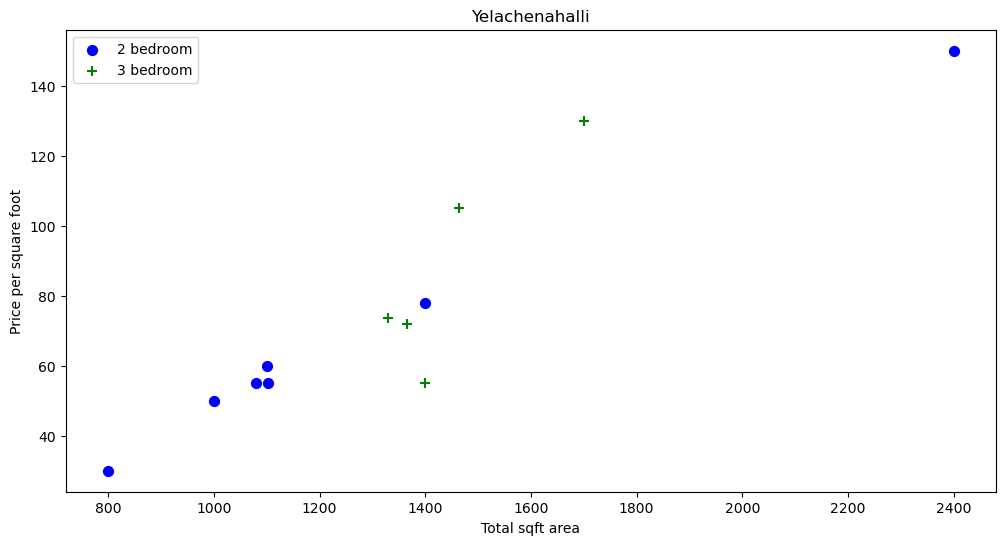

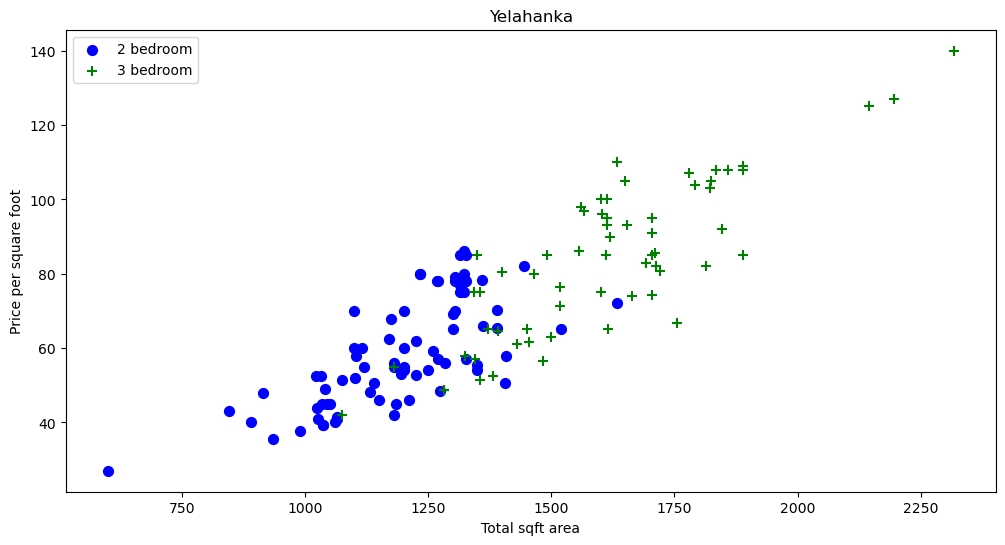

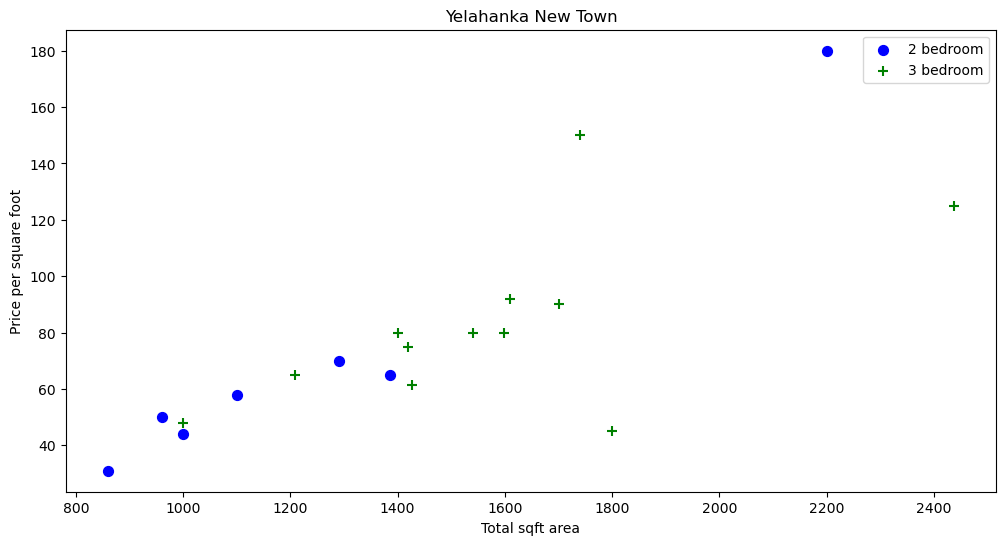

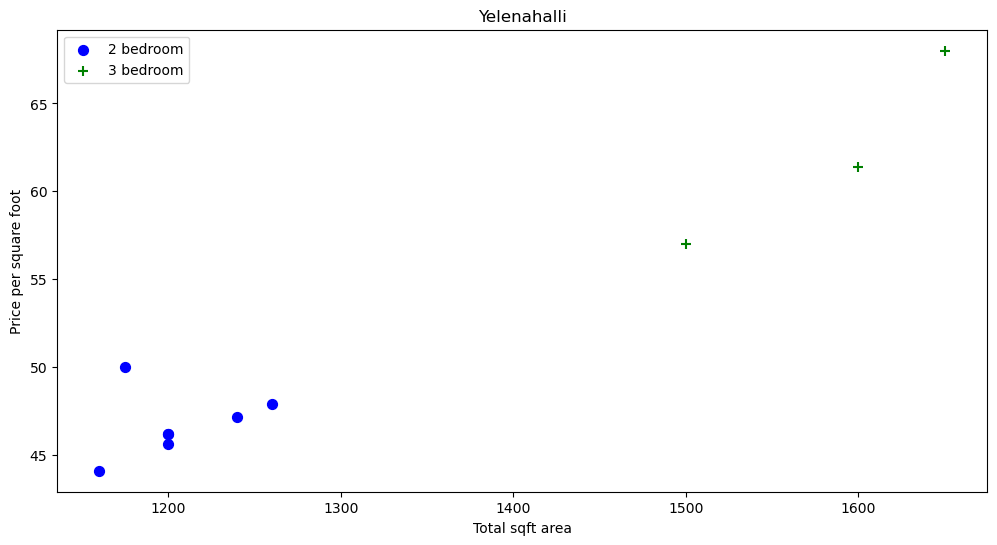

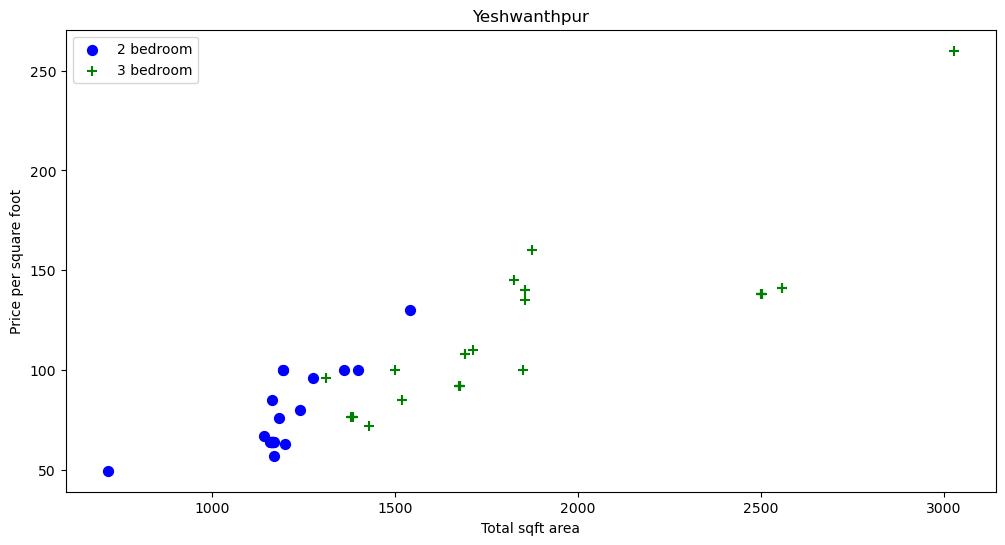

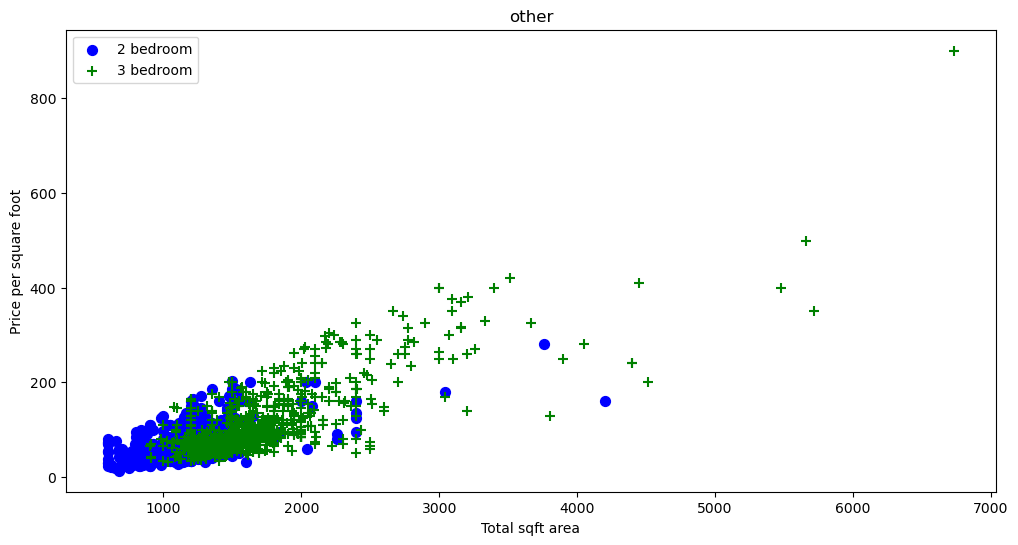

In [185]:
def plot_scatter_chart(df, location):
    two_bed = df[(df.location==location) & (df["Bedrooms"] == 2)]
    three_bed = df[(df.location==location) & (df["Bedrooms"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(two_bed.total_sqft, two_bed.price, color = "blue", label = "2 bedroom", s = 50)
    plt.scatter(three_bed.total_sqft, three_bed.price, color = "green", marker = "+", label = "3 bedroom", s = 50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per square foot")
    plt.title(location)
    plt.legend()
for location in df3["location"].unique():
    plt.figure(figsize = (12, 6))
    matplotlib
    plot_scatter_chart(df3, location)

In [186]:
def remove_bedroom_outliers(df):
    #initialization of an array to keep track of the outliers indices
    exclude_indices = np.array([])
    #iteration through each location dataframe
    for location, location_df in df.groupby("location"):
        #initializing a stats dictionary that as a key for each bedroom type
        bedroom_stats = {}
        #iteration through each bedroom dataframe
        for bedroom, bedroom_df in location_df.groupby("Bedrooms"):
            #updating the bedroom statisitic dictionary
            bedroom_stats[bedroom] = {
                "mean": np.mean(bedroom_df.price_per_sqft),
                "std":np.std(bedroom_df.price_per_sqft),
                "count":bedroom_df.shape[0]
            }
        #another bedroom type in each iteration
        for bedroom, bedroom_df in location_df.groupby("Bedrooms"):
            #gets the stats for the previous bedroom
            stats = bedroom_stats.get(bedroom-1)
            #checks if there are stats to evaluate and if datapoints are greater than five for validation
            if stats and stats["count"]>5:
                #add the indices as specified - specifications: for an outlier the price of a 2 bed is lower than the price of a one bed
                exclude_indices = np.append( exclude_indices, bedroom_df[ bedroom_df.price_per_sqft < (stats["mean"]) ].index.values   )        
        return df.drop(exclude_indices, axis = "index")        

df3 = remove_bedroom_outliers(df3)


In [187]:
df3.shape

(10241, 6)

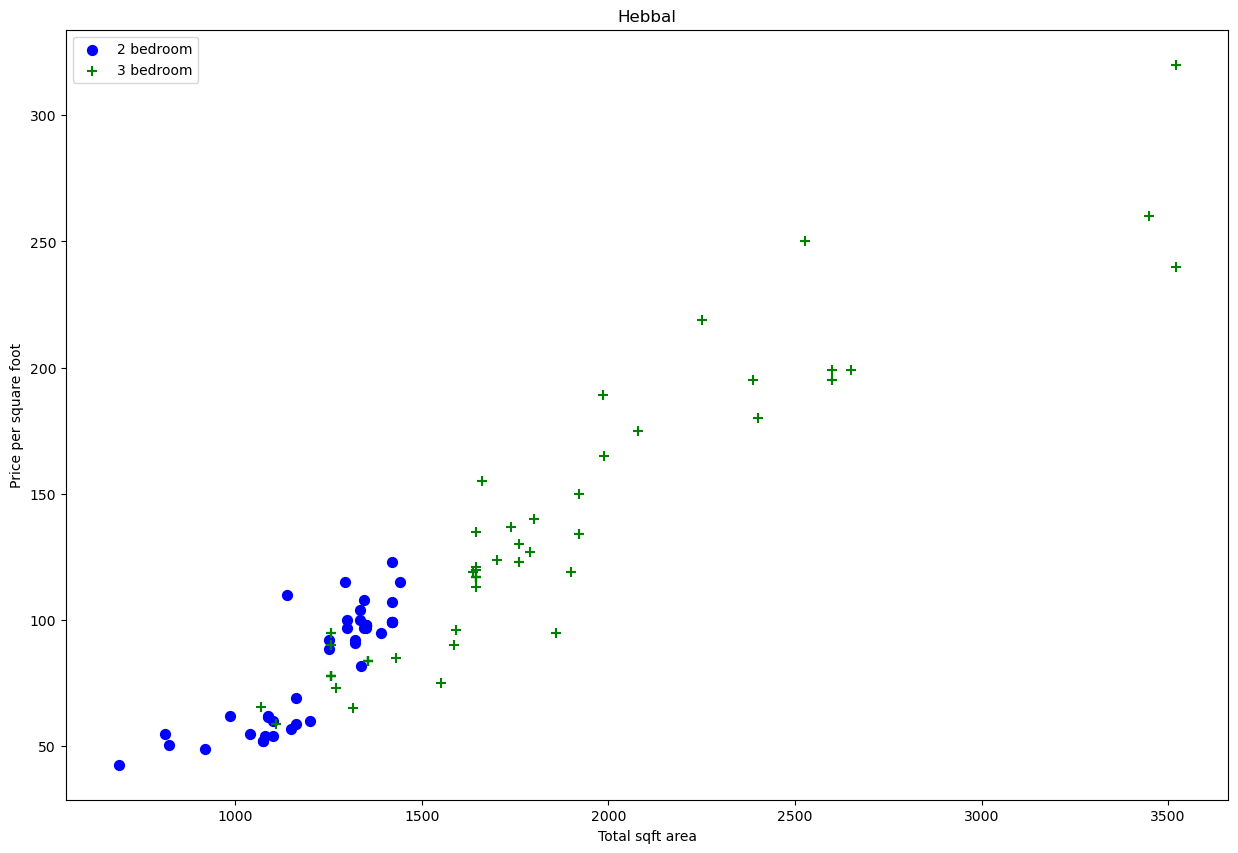

In [188]:
plot_scatter_chart(df3, "Hebbal")

Text(0, 0.5, 'Count')

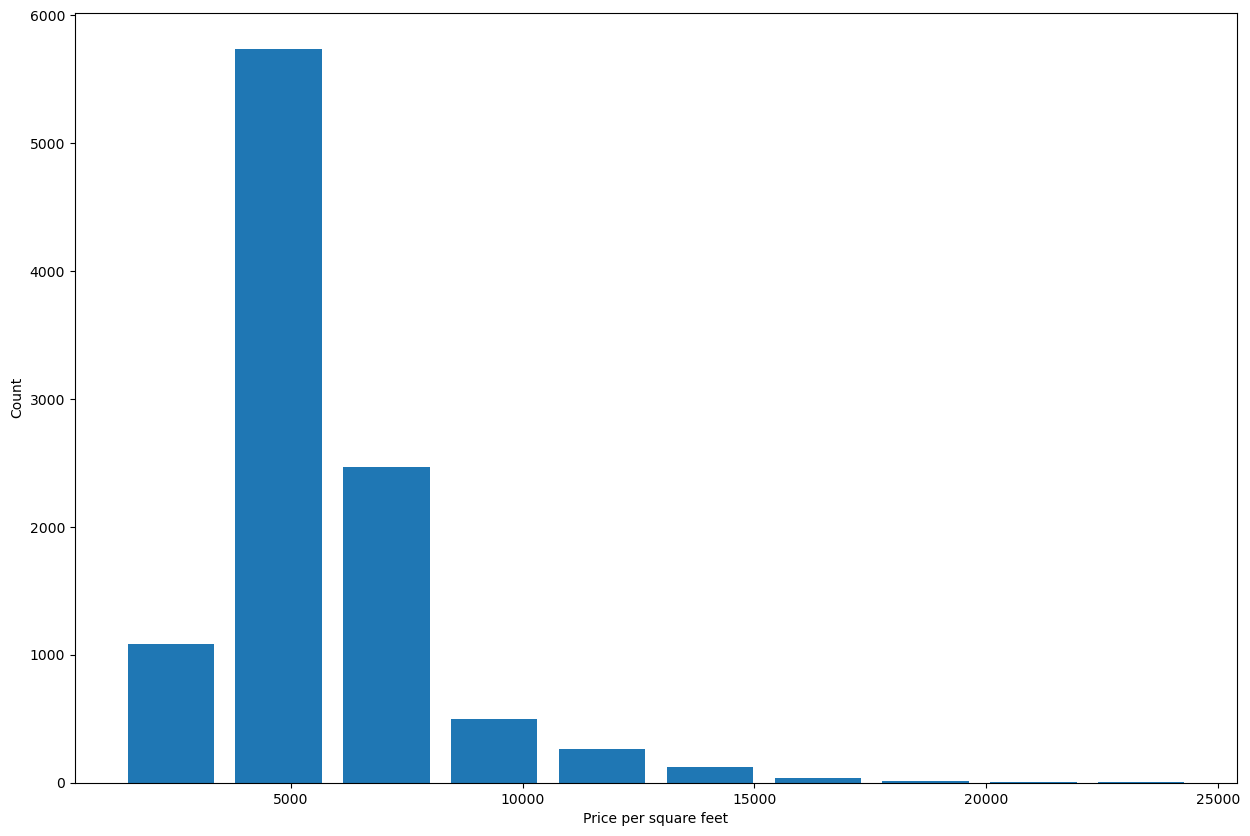

In [189]:
matplotlib.rcParams["figure.figsize"] = (15, 10)
plt.hist(df3.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [190]:
df3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [191]:
df3[df3["bath"]>10]

location  total_sqft  bath  price  Bedrooms  price_per_sqft
5277  Neeladri Nagar      4000.0  12.0  160.0        10     4000.000000
8486           other     12000.0  12.0  525.0        10     4375.000000
8575           other     10000.0  16.0  550.0        16     5500.000000
9308           other      6000.0  12.0  150.0        11     2500.000000
9639           other      5425.0  13.0  275.0        13     5069.124424

Text(0, 0.5, 'count')

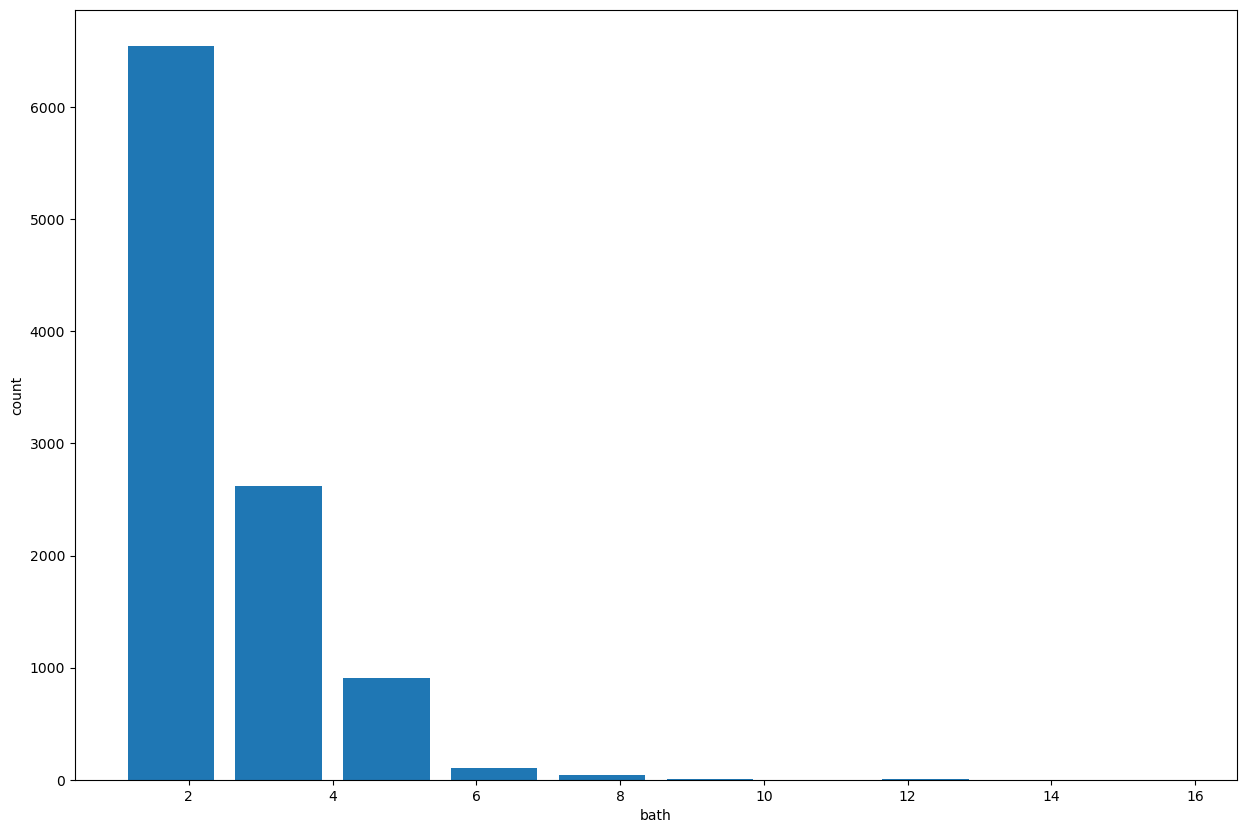

In [192]:
matplotlib.rcParams["figure.figsize"] = (15, 10)
plt.hist(df3.bath, rwidth = 0.8)
plt.xlabel("bath")
plt.ylabel("count")


In [193]:
df3[(df3["bath"])>(df3["Bedrooms"]+2)]

location  total_sqft  bath   price  Bedrooms  price_per_sqft
1626  Chikkabanavar      2460.0   7.0    80.0         4     3252.032520
5238     Nagasandra      7000.0   8.0   450.0         4     6428.571429
6711    Thanisandra      1806.0   6.0   116.0         3     6423.034330
8411          other     11338.0   9.0  1000.0         6     8819.897689

In [194]:
df3 = df3[(df3["bath"])<(df3["Bedrooms"]+2)]
df3.shape

(10147, 6)

Text(0, 0.5, 'count')

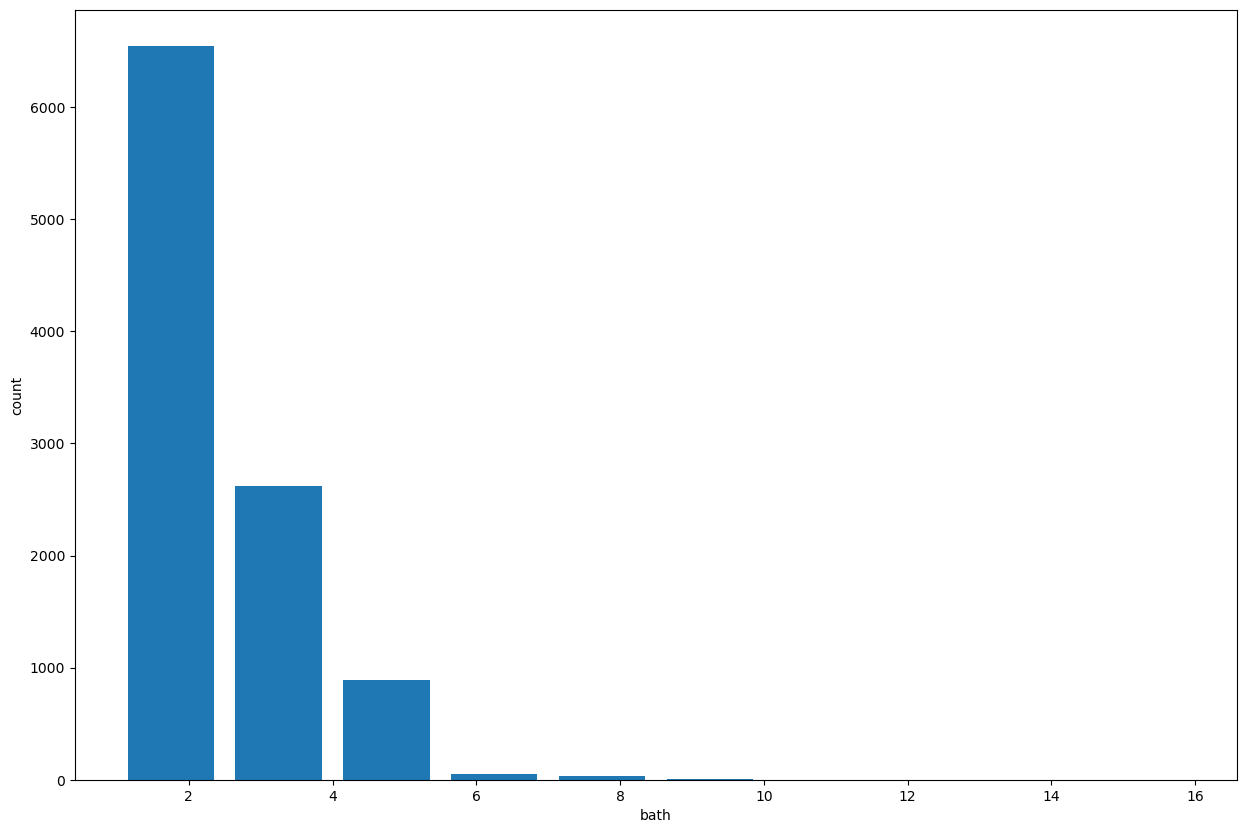

In [195]:
matplotlib.rcParams["figure.figsize"] = (15, 10)
plt.hist(df3["bath"], rwidth = 0.8)
plt.xlabel("bath")
plt.ylabel("count")

In [196]:
df3 = df3.drop(columns = ["price_per_sqft"])
df3

location  total_sqft  bath   price  Bedrooms
0      1st Block Jayanagar      2850.0   4.0  428.00         4
1      1st Block Jayanagar      1630.0   3.0  194.00         3
2      1st Block Jayanagar      1875.0   2.0  235.00         3
3      1st Block Jayanagar      1200.0   2.0  130.00         3
4      1st Block Jayanagar      1235.0   2.0  148.00         2
...                    ...         ...   ...     ...       ...
10236                other      1353.0   2.0  110.00         2
10237                other       812.0   1.0   26.00         1
10238                other      1440.0   2.0   63.93         3
10239                other      1075.0   2.0   48.00         2
10240                other      3600.0   5.0  400.00         4

[10147 rows x 5 columns]

In [197]:
dummies = pd.get_dummies(df3.location)
df3 = pd.concat([df3.drop(columns = ["location"], axis = 1), dummies.drop(columns = ["other"], axis = 1)], axis = 1)
df3.head(4)

total_sqft  bath  price  Bedrooms  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0         4                 True               False   
1      1630.0   3.0  194.0         3                 True               False   
2      1875.0   2.0  235.0         3                 True               False   
3      1200.0   2.0  130.0         3                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   
2               False  ...        False                 False   
3               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  

[4 rows x 245 columns]

In [198]:
df3.shape

(10147, 245)

In [199]:
X = df3.drop("price", axis = 1)
y = df3["price"]

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8208289968654777

In [201]:
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)


array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

def hyper_parameter_tuning_model_selection(X, y):
    model_params = {
        "LinearRegression":{
            "model":LinearRegression(),
            "params":{} },
        "Lasso":{
            "model":Lasso(),
            "params":{}} ,
          "DecisionTreeRegressor":{
            "model":DecisionTreeRegressor(),
            "params":{}   }
    }
    score = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)     
    for model_name, mp in model_params.items():
        try:
            gs = GridSearchCV(mp["model"], mp["params"], cv = 5, return_train_score=False)
            gs.fit(X, y)
            score.append({"model":model_name, "best_parameters":gs.best_params_, "best_scores":gs.best_score_})
        except Exception as e:
            print(f"Error{e} with model{model_name}")
            score.append({"model":model_name, "best_parameters":gs.best_params_, "best_scores":gs.best_score_})
    return pd.DataFrame(score, columns = ["model name", "best params", "best score"])        

hyper_parameter_tuning_model_selection(X, y)


[{'model': 'LinearRegression',
  'best_parameters': {},
  'best_scores': -2.4678568829462092e+16},
 {'model': 'Lasso', 'best_parameters': {}, 'best_scores': 0.6650079062959711},
 {'model': 'DecisionTreeRegressor',
  'best_parameters': {},
  'best_scores': 0.4649843167360045}]

In [208]:
gs.cv_results_

{'mean_fit_time': array([0.04300275, 0.00859818, 0.00830293, 0.00699744, 0.00730152,
        0.00719633, 0.00719848, 0.00669956, 0.00646429, 0.00629387,
        0.03188877, 0.01017394, 0.00978332, 0.00722694, 0.00702991,
        0.00854526, 0.00749931, 0.0068171 , 0.00709949, 0.00699806,
        0.02790141, 0.00749974, 0.00761781, 0.00730047, 0.00742316,
        0.00759954, 0.0073    , 0.00759854, 0.00690184, 0.00659814,
        0.0169004 , 0.00779815, 0.00710092, 0.00719924, 0.00719872,
        0.00709853, 0.00739598, 0.00690217, 0.00719776, 0.00699825,
        0.01877508, 0.00693078, 0.00719609, 0.00729923, 0.00724888,
        0.00719728, 0.00750084, 0.00739708, 0.00750146, 0.0075985 ,
        0.01550093, 0.00939941, 0.00870061, 0.00784345, 0.00582643,
        0.00767894, 0.00759859, 0.00710139, 0.00659695, 0.0061974 ,
        0.01509933, 0.00730014, 0.00779829, 0.00759935, 0.00794477,
        0.00739732, 0.00790005, 0.00759754, 0.00809979, 0.00719757,
        0.00939879, 0.00810137,

In [211]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'alpha': 0.1, 'selection': 'random', 'tol': 0.1},
 0.6725822852538248,
 Lasso(alpha=0.1, selection='random', tol=0.1))